In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

## Information about hosts (servers) used

### choinka (WMiI UMK)

- hardware
  - GPU
    - NVIDIA GeForce RTX 2080 Ti
    - memory: 11019 MiB (11 GiB GDDR6)
    - compute capability: 7.5
    - GPU Architecture: Turing
    - https://www.nvidia.com/en-me/geforce/graphics-cards/rtx-2080-ti/
    - https://www.techpowerup.com/gpu-specs/geforce-rtx-2080-ti.c3305
  - CPU
    - Intel(R) Core(TM) i9-7920X CPU @ 2.90GHz
    - memory: 62 GiB RAM / 64+2 GB
    - cores: 24
    - threads per core: 2

- software
  - NVIDIA driver 470.94
  - CUDA 11.4

## Examine meta parser - parts (no cuDF conversion)

In [ ]:
df = pd.read_csv('benchmark.csv', index_col=1)

In [ ]:
df

,json file,max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],Parsing total [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Total time measured by GPU [ns],Total time measured by CPU [ns]
number of objects,,,,,,,,,,,,,,
100000,sample_100000.json,NaN,STATIC,none,32,4095,5639679,549376,10467230,10347999,119231,345867218,362527618,368156804
200000,sample_200000.json,NaN,STATIC,none,32,2144,10546688,918016,19945471,19828735,116736,694044799,725457092,736890428
300000,sample_300000.json,NaN,STATIC,none,32,3391,15717120,1265535,29089631,28993663,95968,1055995117,1102070800,1118333973
400000,sample_400000.json,NaN,STATIC,none,32,4095,21258047,1765568,38499837,38410270,89567,1401558227,1463085693,1485693012
500000,sample_500000.json,NaN,STATIC,none,32,2976,26564416,2033855,48328702,48228351,100351,1747113647,1824043579,1851647336
600000,sample_600000.json,NaN,STATIC,none,32,3295,31642335,2472032,57495677,57387134,108543,2094846923,2186460205,2219683262
700000,sample_700000.json,NaN,STATIC,none,32,3231,36975486,2869247,67300611,67215011,85600,2445350585,2552499023,2597928379
800000,sample_800000.json,NaN,STATIC,none,32,2047,40077121,3197119,76795580,76699165,96415,2803187500,2923259277,2966808889
900000,sample_900000.json,NaN,STATIC,none,32,3391,47147487,3551455,85760002,85664802,95200,3144182861,3280645263,3330369783


In [ ]:
df.describe()

,max string size,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],Parsing total [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Total time measured by GPU [ns],Total time measured by CPU [ns]
count,0.0,9.0,9.000000,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,9.000000e+00,9.000000e+00,9.000000e+00
mean,NaN,32.0,3185.000000,2.617426e+07,2.069134e+06,4.818697e+07,4.808613e+07,100845.666667,1.748016e+09,1.824450e+09,1.852835e+09
std,NaN,0.0,722.642201,1.405033e+07,1.039594e+06,2.588701e+07,2.589425e+07,11645.554280,9.581910e+08,9.991504e+08,1.014746e+09
min,NaN,32.0,2047.000000,5.639679e+06,5.493760e+05,1.046723e+07,1.034800e+07,85600.000000,3.458672e+08,3.625276e+08,3.681568e+08
25%,NaN,32.0,2976.000000,1.571712e+07,1.265535e+06,2.908963e+07,2.899366e+07,95200.000000,1.055995e+09,1.102071e+09,1.118334e+09
50%,NaN,32.0,3295.000000,2.656442e+07,2.033855e+06,4.832870e+07,4.822835e+07,96415.000000,1.747114e+09,1.824044e+09,1.851647e+09
75%,NaN,32.0,3391.000000,3.697549e+07,2.869247e+06,6.730061e+07,6.721501e+07,108543.000000,2.445351e+09,2.552499e+09,2.597928e+09
max,NaN,32.0,4095.000000,4.714749e+07,3.551455e+06,8.576000e+07,8.566480e+07,119231.000000,3.144183e+09,3.280645e+09,3.330370e+09


In [ ]:
df.columns

Index(['json file', 'max string size', 'string handling', 'assumptions',
       'workgroup size', 'Initialization [ns]',
       'Memory allocation and copying [ns]', 'Finding newlines offsets [ns]',
       'Parsing total [ns]', 'JSON processing [ns]', 'Post kernel hooks [ns]',
       'Copying output [ns]', 'Total time measured by GPU [ns]',
       'Total time measured by CPU [ns]'],
      dtype='object')

In [ ]:
alldf = df[['Initialization [ns]',
       'Memory allocation and copying [ns]', 'Finding newlines offsets [ns]',
       'JSON processing [ns]', 'Post kernel hooks [ns]','Copying output [ns]']]

In [ ]:
subdf = df[['Initialization [ns]',
       'Memory allocation and copying [ns]', 'Finding newlines offsets [ns]',
       'JSON processing [ns]', 'Post kernel hooks [ns]']]

In [ ]:
subdf

,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],JSON processing [ns],Post kernel hooks [ns]
number of objects,,,,,
100000,4095,5639679,549376,10347999,119231
200000,2144,10546688,918016,19828735,116736
300000,3391,15717120,1265535,28993663,95968
400000,4095,21258047,1765568,38410270,89567
500000,2976,26564416,2033855,48228351,100351
600000,3295,31642335,2472032,57387134,108543
700000,3231,36975486,2869247,67215011,85600
800000,2047,40077121,3197119,76699165,96415
900000,3391,47147487,3551455,85664802,95200


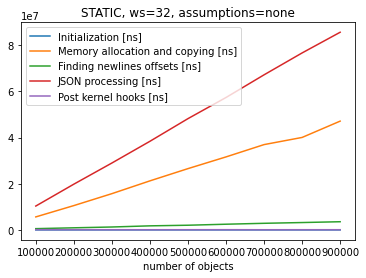

In [ ]:
ax = subdf.plot(title='STATIC, ws=32, assumptions=none')

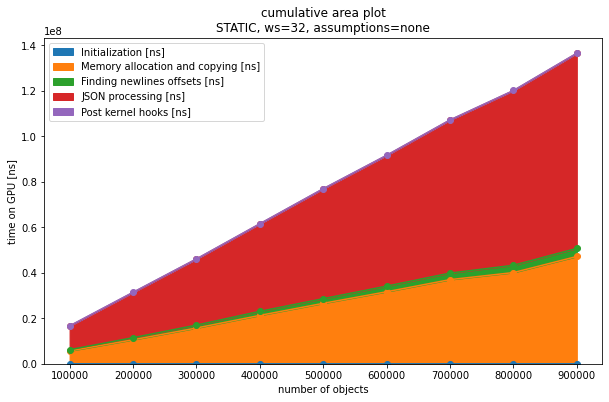

In [ ]:
ax = subdf.plot(
    kind='area', grid=False, style='o-', #style=['.-','o-','x-','s-','+-'],
    title='cumulative area plot\nSTATIC, ws=32, assumptions=none',
    ylabel='time on GPU [ns]',
    figsize=(10,6)
)

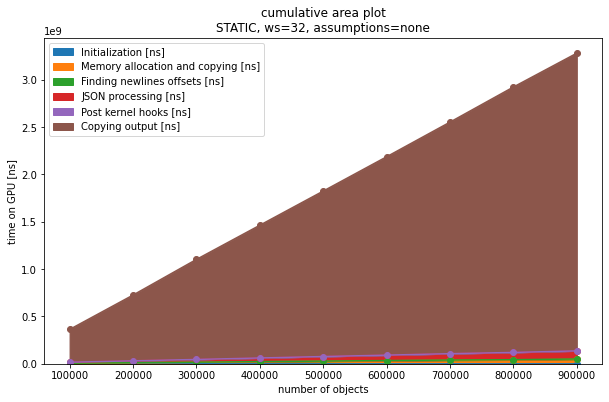

In [ ]:
ax = alldf.plot(
    kind='area', grid=False, style='o-',
    title='cumulative area plot\nSTATIC, ws=32, assumptions=none',
    ylabel='time on GPU [ns]',
    figsize=(10,6)
)

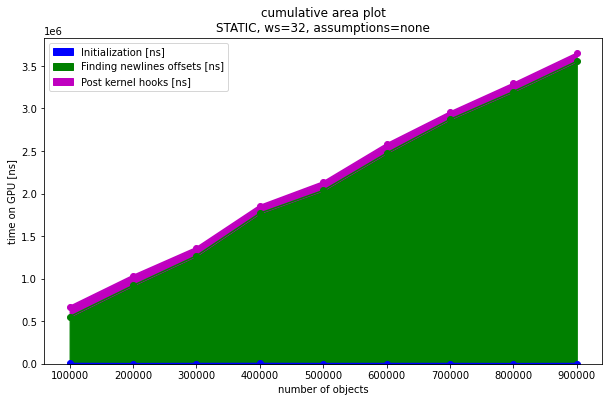

In [ ]:
smalldf = df[['Initialization [ns]',
       'Finding newlines offsets [ns]',
       'Post kernel hooks [ns]']]
ax = smalldf.plot(
    kind='area', grid=False, style='o-', color=['b','g','m'],
    title='cumulative area plot\nSTATIC, ws=32, assumptions=none',
    ylabel='time on GPU [ns]',
    figsize=(10,6)
)

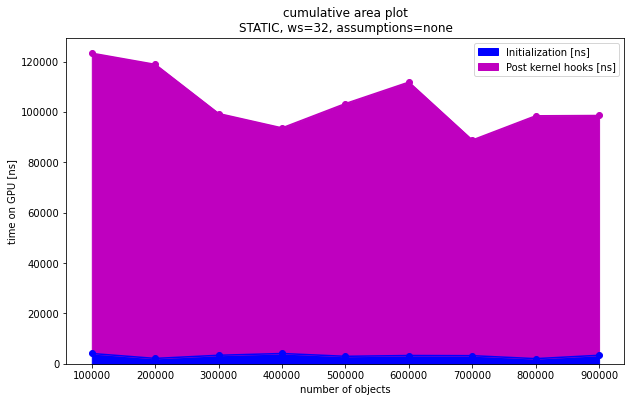

In [ ]:
smallerdf = df[['Initialization [ns]',
       'Post kernel hooks [ns]']]
ax = smallerdf.plot(
    kind='area', grid=False, style='o-', color=['b','m'],
    title='cumulative area plot\nSTATIC, ws=32, assumptions=none',
    ylabel='time on GPU [ns]',
    figsize=(10,6)
)

## Examine meta parser - parts (for generated) - new version

All those examples use synthetic JSONL files generated using [`generate.py`][1] from [mis-wut/json2meta][2] repository, with different number of samples / objects / lines.

Generated JSON file looks like this:
```json
{"date":"2010-01-01 00:00:00","lat":3250,"lon":6719,"is_checked":true,"name":"name169","1_date":"2010-01-01 00:00:00","1_lat":6101,"1_lon":7849,"1_is_checked":true,"1_name":"name648","2_date":"2010-01-01 00:00:00","2_lat":141,"2_lon":7615,"2_is_checked":true,"2_name":"name40","3_date":"2010-01-01 00:00:00","3_lat":5288,"3_lon":6879,"3_is_checked":false,"3_name":"name760"}
{"date":"2011-03-23 10:40:00","lat":22,"lon":8187,"is_checked":false,"name":"name994","1_date":"2011-03-23 10:40:00","1_lat":1106,"1_lon":3562,"1_is_checked":true,"1_name":"name355","2_date":"2011-03-23 10:40:00","2_lat":293,"2_lon":4242,"2_is_checked":true,"2_name":"name735","3_date":"2011-03-23 10:40:00","3_lat":533,"3_lon":4007,"3_is_checked":true,"3_name":"name766"}
```

[1]: https://github.com/mis-wut/json2meta/blob/master/poc/generate.py
[2]: https://github.com/mis-wut/json2meta

The relevant parts of meta parser configuration, copied from `benchmark/examples/sample.data_def.cuh`:

```c++
// DICT
#define STATIC_STRING_SIZE 32
template<template<class, int> class StringFun, class DictOpts>
using DictCreator = JDict < mp_list <
        mp_list<K_L1_date, StringFun<K_L1_date, STATIC_STRING_SIZE>>,
        mp_list<K_L1_lat, JNumber<uint32_t, K_L1_lat>>,
        mp_list<K_L1_lon, JNumber<uint32_t, K_L1_lon>>,
        mp_list<K_L1_is_checked, JBool<uint8_t, K_L1_is_checked>>,
        mp_list<K_L1_name, StringFun<K_L1_name, STATIC_STRING_SIZE>>,
        mp_list<K_L1_1_date, StringFun<K_L1_1_date, STATIC_STRING_SIZE>>,
        mp_list<K_L1_1_lat, JNumber<uint32_t, K_L1_1_lat>>,
        mp_list<K_L1_1_lon, JNumber<uint32_t, K_L1_1_lon>>,
        mp_list<K_L1_1_is_checked, JBool<uint8_t, K_L1_1_is_checked>>,
        mp_list<K_L1_1_name, StringFun<K_L1_1_name, STATIC_STRING_SIZE>>,
        mp_list<K_L1_2_date, StringFun<K_L1_2_date, STATIC_STRING_SIZE>>,
        mp_list<K_L1_2_lat, JNumber<uint32_t, K_L1_2_lat>>,
        mp_list<K_L1_2_lon, JNumber<uint32_t, K_L1_2_lon>>,
        mp_list<K_L1_2_is_checked, JBool<uint8_t, K_L1_2_is_checked>>,
        mp_list<K_L1_2_name, StringFun<K_L1_2_name, STATIC_STRING_SIZE>>,
        mp_list<K_L1_3_date, StringFun<K_L1_3_date, STATIC_STRING_SIZE>>,
        mp_list<K_L1_3_lat, JNumber<uint32_t, K_L1_3_lat>>,
        mp_list<K_L1_3_lon, JNumber<uint32_t, K_L1_3_lon>>,
        mp_list<K_L1_3_is_checked, JBool<uint8_t, K_L1_3_is_checked>>,
        mp_list<K_L1_3_name, StringFun<K_L1_3_name, STATIC_STRING_SIZE>>
>,
        DictOpts
> ;
```

### analysis for 1M and 100k objects

In [ ]:
# read results for ./meta-json-parser-benchmark 
df_meta_gen = pd.read_csv('benchmark_metaparser-co=1_ws=32_static-cudf=21-10-docker_generated.csv', index_col=2).sort_index()
df_meta_gen['NOD2H time measured by GPU [ns]'] = \
  df_meta_gen['TOTAL time measured by GPU [ns]'] - df_meta_gen['Copying output [ns]']
df_meta_gen.head()

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
1000000,sample_1000000.json,376571688,32,STATIC,constant order,32,6591,54270271,3968192,71428291,71339004,89280,3717054199,12703871,3859431640,3933989365,142377441
1000000,sample_1000000.json,376571688,32,STATIC,constant order,32,7776,54704959,3882175,72582466,72507682,74784,3668629638,12507040,3812313964,3875308941,143684326
1000000,sample_1000000.json,376571688,32,STATIC,constant order,32,9119,54193214,3893151,71027038,70946655,80384,3679359375,12257920,3820739990,3880977101,141380615
1000000,sample_1000000.json,376571688,32,STATIC,constant order,32,7776,54099777,3892479,73378623,73304733,73887,3684122314,12285568,3827786621,3888696218,143664307
1000000,sample_1000000.json,376571688,32,STATIC,constant order,32,7040,55128990,3925760,67881088,67788734,92352,3672331542,12457568,3811731933,3872524949,139400391


In [ ]:
column_sel = [
    'Initialization [ns]',
    'Memory allocation and copying [ns]',
    'Finding newlines offsets [ns]',
    'JSON processing [ns]',
    'Converting to cuDF format [ns]'
]
s_meta_median = df_meta_gen[column_sel].median()

s_meta_median

Initialization [ns]                       7727.5
Memory allocation and copying [ns]    54237966.0
Finding newlines offsets [ns]          3871327.5
JSON processing [ns]                  71117599.0
Converting to cuDF format [ns]        12253103.5
dtype: float64

In [ ]:
s_meta_mad = df_meta_gen[column_sel].mad()
s_meta_mad

Initialization [ns]                      433.7600
Memory allocation and copying [ns]    209705.6080
Finding newlines offsets [ns]          19002.5744
JSON processing [ns]                  855195.2296
Converting to cuDF format [ns]        132020.0528
dtype: float64

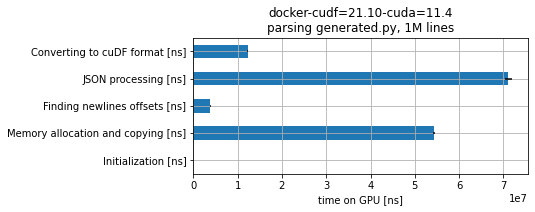

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.set_title(f'docker-cudf=21.10-cuda=11.4\nparsing generated.py, 1M lines')
ax.set(xlabel='time on GPU [ns]')

s_meta_median.plot.barh(ax=ax, xerr=s_meta_mad, grid=True)

plt.show()

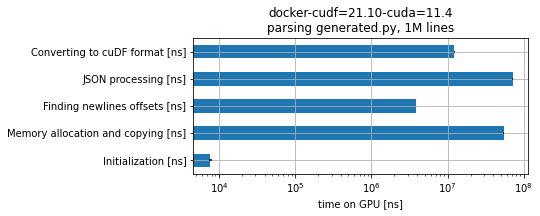

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.set_title(f'docker-cudf=21.10-cuda=11.4\nparsing generated.py, 1M lines')
ax.set(xlabel='time on GPU [ns], log scale')
ax.set_xscale('log')

s_meta_median.plot.barh(ax=ax, xerr=s_meta_mad, grid=True)

plt.show()

In [ ]:
total_time = df_meta_gen['NOD2H time measured by GPU [ns]'].median()
print(f"total_time = {total_time} [ns]")

s_meta_rel = 100.0*s_meta_median/total_time
s_meta_rel

total_time = 141785766.5 [ns]


Initialization [ns]                    0.005450
Memory allocation and copying [ns]    38.253463
Finding newlines offsets [ns]          2.730406
JSON processing [ns]                  50.158490
Converting to cuDF format [ns]         8.641984
dtype: float64

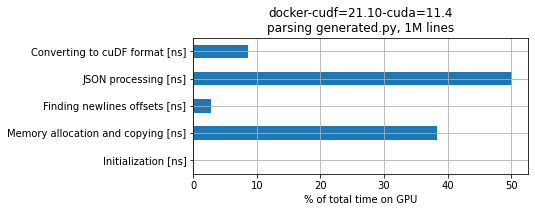

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.set_title(f'docker-cudf=21.10-cuda=11.4\nparsing generated.py, 1M lines')
ax.set(xlabel='% of total time on GPU')

s_meta_rel.plot.barh(ax=ax, grid=True)

plt.show()

In [ ]:
size_100k_bytes = 37657774
size_1M_bytes = 376571688

In [ ]:
# rescale from bytes / nanosecond to MB / second
scale__MB_per_s = 1e9 / (1024*1024)

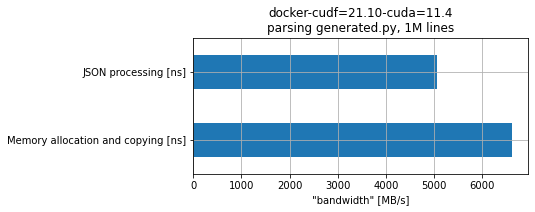

Memory allocation and copying [ns]    6621.316646
JSON processing [ns]                  5049.759162
dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.set_title(f'docker-cudf=21.10-cuda=11.4\nparsing generated.py, 1M lines')
ax.set(xlabel='"bandwidth" [MB/s]')

(scale__MB_per_s*size_1M_bytes / s_meta_median[['Memory allocation and copying [ns]', 'JSON processing [ns]']]).plot.barh(ax=ax, grid=True)

plt.show()

(scale__MB_per_s*size_1M_bytes / s_meta_median[['Memory allocation and copying [ns]', 'JSON processing [ns]']])

In [ ]:
print(f"total time: {df_meta_gen['NOD2H time measured by GPU [ns]'].median()} ns")
print(f"bandwidth:  {(scale__MB_per_s*size_1M_bytes / df_meta_gen['NOD2H time measured by GPU [ns]'].median())} MB/s")

total time: 141785766.5 ns
bandwidth:  2532.8829260964476 MB/s


In [ ]:
# read results for ./meta-json-parser-benchmark 
df_meta_gen_100k = pd.read_csv('benchmark_metaparser-co=1_ws=32_static-cudf=21-10-docker_generated_100000.csv', index_col=2).sort_index()
df_meta_gen_100k['NOD2H time measured by GPU [ns]'] = \
  df_meta_gen_100k['TOTAL time measured by GPU [ns]'] - df_meta_gen_100k['Copying output [ns]']
df_meta_gen_100k.head(2)

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
100000,sample_100000.json,37657774,32,STATIC,constant order,32,8352,6506976,578719,7266975,7168960,98016,373245727,2441632,390048370,396969390,16802643
100000,sample_100000.json,37657774,32,STATIC,constant order,32,8000,6472032,566655,7331200,7226240,104960,366162719,2443520,382984130,389646611,16821411


In [ ]:
s_meta_median_100k = df_meta_gen_100k[column_sel].median()
s_meta_median_100k

Initialization [ns]                      7424.0
Memory allocation and copying [ns]    6477568.0
Finding newlines offsets [ns]          564063.5
JSON processing [ns]                  7165296.0
Converting to cuDF format [ns]        2442879.5
dtype: float64

In [ ]:
total_time_100k = df_meta_gen_100k['NOD2H time measured by GPU [ns]'].median()
print(f"total_time = {total_time_100k} [ns] (100k) vs {total_time} (1M) -> {total_time/total_time_100k}")

s_meta_rel_100k = 100.0*s_meta_median_100k/total_time_100k
s_meta_rel_100k

total_time = 16797806.5 [ns] (100k) vs 141785766.5 (1M) -> 8.440731026399192


Initialization [ns]                    0.044196
Memory allocation and copying [ns]    38.561987
Finding newlines offsets [ns]          3.357959
JSON processing [ns]                  42.656141
Converting to cuDF format [ns]        14.542848
dtype: float64

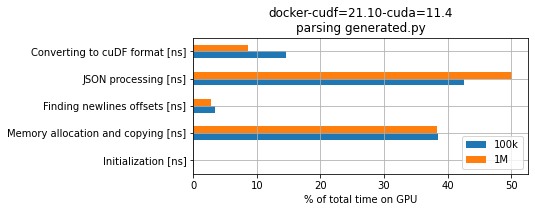

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.set_title(f'docker-cudf=21.10-cuda=11.4\nparsing generated.py')
ax.set(xlabel='% of total time on GPU')

pd.DataFrame({'100k': s_meta_rel_100k, '1M': s_meta_rel}).plot.barh(ax=ax, grid=True)

plt.show()

In [ ]:
s_meta_ratio = (s_meta_median / s_meta_median_100k) / (1000000 / 100000)
s_meta_ratio 

Initialization [ns]                   0.104088
Memory allocation and copying [ns]    0.837320
Finding newlines offsets [ns]         0.686328
JSON processing [ns]                  0.992528
Converting to cuDF format [ns]        0.501584
dtype: float64

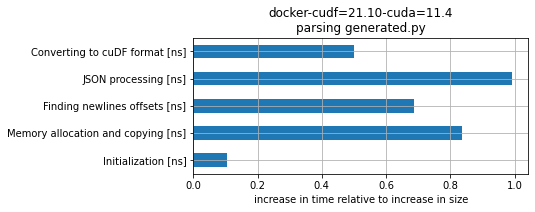

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.set_title(f'docker-cudf=21.10-cuda=11.4\nparsing generated.py')
ax.set(xlabel='increase in time relative to increase in size')

s_meta_ratio.plot.barh(ax=ax, grid=True)

plt.show()

### performance vs number of objects

In [ ]:
df_meta_scan = pd.read_csv('benchmark_metaparser-co=1_ws=32_static-cudf=21-10-docker_generated_scan.csv', index_col=2).sort_index()
df_meta_scan['NOD2H time measured by GPU [ns]'] = \
  df_meta_scan['TOTAL time measured by GPU [ns]'] - df_meta_scan['Copying output [ns]']

df_meta_scan.head(2)

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
10,sample_10.json,3762,32,STATIC,constant order,32,4511,368992,170783,260320,163808,96511,171552,1071071,2047231,2169828,1875679
10,sample_10.json,3762,32,STATIC,constant order,32,4672,373535,163647,262015,164447,97567,173472,1068160,2045504,2146076,1872032


In [ ]:
df_meta_scan_median = df_meta_scan.groupby(df_meta_scan.index).median()
df_meta_scan_median

,file size [bytes],max string size,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,
10,3762.0,32.0,32.0,4608.0,376128.0,164208.0,260272.0,163840.0,96783.0,1.734875e+05,1075600.0,2.057728e+06,2.172853e+06,1882448.5
100,37662.0,32.0,32.0,4479.0,385967.5,164079.0,259791.5,163311.5,96703.0,5.064635e+05,1098415.0,2.435584e+06,2.546494e+06,1921280.0
1000,376535.0,32.0,32.0,4879.5,468303.0,162704.0,261312.0,165391.5,96032.0,3.874079e+06,1147055.0,5.926287e+06,6.100699e+06,2051728.0
10000,3765674.0,32.0,32.0,5535.0,1108575.5,220672.0,867023.0,769248.0,98080.0,3.692446e+07,1329679.0,4.049757e+07,4.112598e+07,3543039.5
100000,37657774.0,32.0,32.0,7296.0,6482655.5,567535.5,7274703.5,7174911.5,99088.0,3.706898e+08,2445007.0,3.874938e+08,3.941804e+08,16794998.5
200000,75315528.0,32.0,32.0,7727.5,11872288.0,926047.0,14410015.0,14298703.0,98864.0,7.377408e+08,4729087.0,7.697072e+08,7.807030e+08,31995331.0
300000,112972487.0,32.0,32.0,7872.0,17355215.5,1292688.0,21448687.0,21348527.5,98928.0,1.105723e+09,6074016.0,1.151857e+09,1.168331e+09,46194214.5
400000,150629477.0,32.0,32.0,7599.5,22572255.5,1720975.5,28642479.5,28569055.0,74159.0,1.472255e+09,7018431.0,1.532229e+09,1.553646e+09,60061828.5
500000,188286524.0,32.0,32.0,7535.5,27953344.0,2029359.0,35825168.0,35722112.0,98303.5,1.840254e+09,7661423.5,1.913963e+09,1.940888e+09,73542297.5


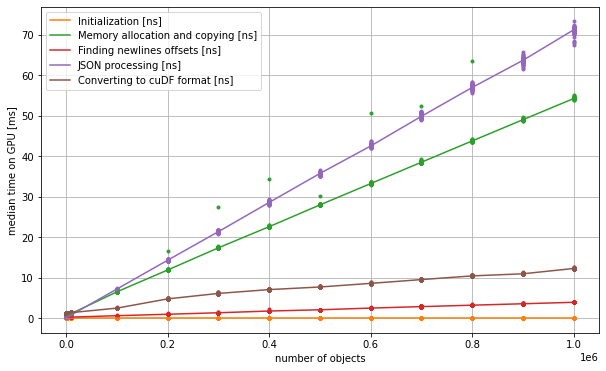

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
#ax.set_title(f'docker-cudf=21.10-cuda=11.4\nparsing generated.py')
ax.set(ylabel='median time on GPU [ms]')

(1e-6*df_meta_scan[column_sel]).plot(ax=ax,style='.',legend=False, color=["C1","C2","C3","C4","C5"])
(1e-6*df_meta_scan_median[column_sel]).plot(ax=ax,grid=True, color=["C1","C2","C3","C4","C5"])

plt.show()

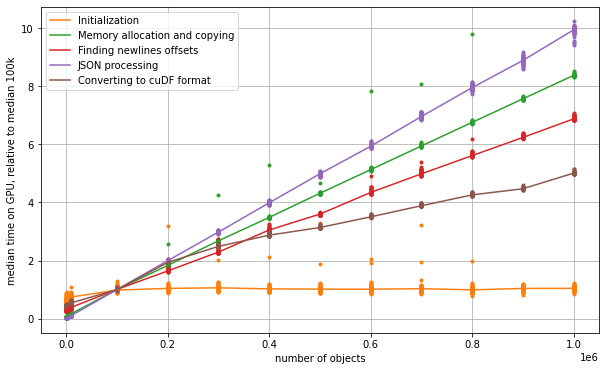

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
#ax.set_title(f'docker-cudf=21.10-cuda=11.4\nparsing generated.py')
ax.set(ylabel='median time on GPU, relative to median 100k')

(df_meta_scan[column_sel]/s_meta_median_100k).plot(ax=ax, style='.', legend=False, color=["C1","C2","C3","C4","C5"])
(df_meta_scan_median[column_sel]/s_meta_median_100k).plot(ax=ax, grid=True, color=["C1","C2","C3","C4","C5"])

handles, labels = ax.get_legend_handles_labels()
#print(f"handles={handles}\nlabels={labels}")

ax.legend(handles=handles[5:],labels=[x[:-5] for x in labels[5:]])

plt.show()

In [ ]:
[x[:-5] for x in column_sel]

['Initialization',
 'Memory allocation and copying',
 'Finding newlines offsets',
 'JSON processing',
 'Converting to cuDF format']

In [ ]:
df_meta_scan_2 = pd.read_csv('benchmark_metaparser-co=1_ws=32_version=1-cudf=21-10-docker_generated_scan.csv', index_col=2).sort_index()
df_meta_scan_2['NOD2H time measured by GPU [ns]'] = \
  df_meta_scan_2['TOTAL time measured by GPU [ns]'] - df_meta_scan_2['Copying output [ns]']

df_meta_scan_2.head(2)

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
10,sample_10.json,3762,32,DYNAMIC V1,constant order,32,23647,457504,179296,345856,167679,178176,229248,385280,1620831,1749733,1391583
10,sample_10.json,3762,32,DYNAMIC V1,constant order,32,33599,472512,172511,342559,166912,175648,233119,348639,1602944,1705469,1369825


In [ ]:
df_meta_scan_median_2 = df_meta_scan_2.groupby(df_meta_scan.index).median()
df_meta_scan_median_2

,file size [bytes],max string size,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,
10,3762.0,32.0,32.0,24351.5,452831.5,174623.0,343343.5,167151.5,176207.5,2.207195e+05,359663.0,1.585792e+06,1.695778e+06,1357664.5
100,37662.0,32.0,32.0,24256.0,451791.5,178127.0,346384.0,165999.5,180480.0,5.800320e+05,352288.0,1.952399e+06,2.066464e+06,1358192.5
1000,376535.0,32.0,32.0,24943.5,526191.5,173727.0,353632.0,168896.0,184815.0,4.304368e+06,354671.5,5.737071e+06,5.910796e+06,1437488.0
10000,3765674.0,32.0,32.0,26831.0,1182511.0,230399.0,1022271.5,796591.5,224447.0,4.081966e+07,562447.5,4.381165e+07,4.442148e+07,3028816.0
100000,37657774.0,32.0,32.0,28623.5,6620831.5,581775.5,7878927.5,7460287.5,414720.0,4.112110e+08,1542752.0,4.280337e+08,4.347866e+08,16653961.5
200000,75315528.0,32.0,32.0,30143.0,12192831.5,949855.0,15485327.0,14852543.0,634223.5,8.189559e+08,2121216.0,8.499799e+08,8.611988e+08,30785400.5
300000,112972487.0,32.0,32.0,30975.0,17904207.5,1298895.5,23088415.5,22221039.5,868623.5,1.230600e+09,2886527.0,1.275849e+09,1.292118e+09,45262695.0
400000,150629477.0,32.0,32.0,31503.0,23160783.5,1726944.0,30875087.5,29771903.5,1096895.5,1.637638e+09,3155999.5,1.697026e+09,1.718154e+09,59000305.0
500000,188286524.0,32.0,32.0,30928.0,28575183.5,2016335.0,38465951.5,37129056.5,1337823.5,2.044639e+09,3520223.5,2.117077e+09,2.143548e+09,72617370.5


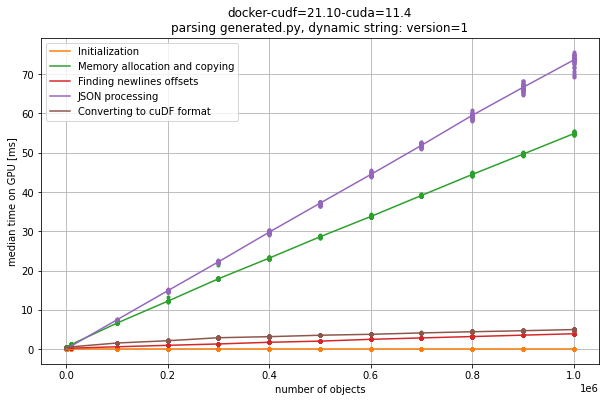

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title(f'docker-cudf=21.10-cuda=11.4\nparsing generated.py, dynamic string: version=1')
ax.set(ylabel='median time on GPU [ms]')

(1e-6*df_meta_scan_2[column_sel]).plot(ax=ax,style='.',legend=False, color=["C1","C2","C3","C4","C5"])
(1e-6*df_meta_scan_median_2[column_sel]).plot(ax=ax,grid=True, color=["C1","C2","C3","C4","C5"])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[5:],labels=[x[:-5] for x in labels[5:]])

plt.show()

In [ ]:
s_meta_median_2_100k = df_meta_scan_median_2[column_sel].loc[100000]
s_meta_median_2_100k

Initialization [ns]                     28623.5
Memory allocation and copying [ns]    6620831.5
Finding newlines offsets [ns]          581775.5
JSON processing [ns]                  7460287.5
Converting to cuDF format [ns]        1542752.0
Name: 100000, dtype: float64

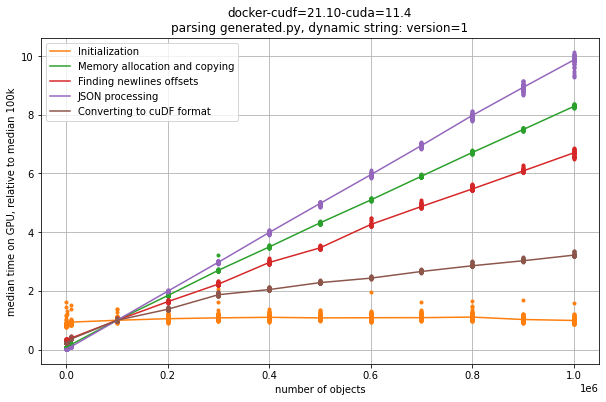

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title(f'docker-cudf=21.10-cuda=11.4\nparsing generated.py, dynamic string: version=1')
ax.set(ylabel='median time on GPU, relative to median 100k')

(df_meta_scan_2[column_sel]/s_meta_median_2_100k).plot(ax=ax, style='.', legend=False, color=["C1","C2","C3","C4","C5"])
(df_meta_scan_median_2[column_sel]/s_meta_median_2_100k).plot(ax=ax, grid=True, color=["C1","C2","C3","C4","C5"])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[5:],labels=[x[:-5] for x in labels[5:]])

plt.show()

## Run `meta-json-parser-benchmark --use-libcudf-parser ...`

All those examples use synthetic JSONL files generated using [`generate.py`][1] from [mis-wut/json2meta][2] repository, with different number of samples / objects / lines.

Generated JSON file looks like this:
```.json
{"date":"2010-01-01 00:00:00","lat":3250,"lon":6719,"is_checked":true,"name":"name169","1_date":"2010-01-01 00:00:00","1_lat":6101,"1_lon":7849,"1_is_checked":true,"1_name":"name648","2_date":"2010-01-01 00:00:00","2_lat":141,"2_lon":7615,"2_is_checked":true,"2_name":"name40","3_date":"2010-01-01 00:00:00","3_lat":5288,"3_lon":6879,"3_is_checked":false,"3_name":"name760"}
{"date":"2011-03-23 10:40:00","lat":22,"lon":8187,"is_checked":false,"name":"name994","1_date":"2011-03-23 10:40:00","1_lat":1106,"1_lon":3562,"1_is_checked":true,"1_name":"name355","2_date":"2011-03-23 10:40:00","2_lat":293,"2_lon":4242,"2_is_checked":true,"2_name":"name735","3_date":"2011-03-23 10:40:00","3_lat":533,"3_lon":4007,"3_is_checked":true,"3_name":"name766"}
```

[1]: https://github.com/mis-wut/json2meta/blob/master/poc/generate.py
[2]: https://github.com/mis-wut/json2meta

### System-wide cuDF (v0.12.0)

For start, use system-wide installation of _libcudf_ library present on 'choinka', installed as `/usr/local/lib/libcudf.so`

This is probably libcudf version 'v0.12.0-14583-gdeee1f62d1'

In [ ]:
df_cudf = pd.read_csv('benchmark_libcudf_cudf=unknown_choinka.csv', index_col=2)

In [ ]:
df_cudf

,json file,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns]
number of objects,,,,,,,
10,sample_10.json,3762,2848,11904,924485412,924500183,924599776
100000,sample_100000.json,37657774,14336,30719,1012709350,1012754455,1395741621
200000,sample_200000.json,75315528,13887,28799,1058279418,1058322143,1799592455
300000,sample_300000.json,112972487,14368,34816,1091771850,1091821044,2194938886
400000,sample_400000.json,150629477,13151,32767,1123995605,1124041625,2578447376
500000,sample_500000.json,188286524,12288,29888,1164108642,1164150756,2979471790
600000,sample_600000.json,225944103,12351,30559,1188685913,1188728759,3362605356
700000,sample_700000.json,263602285,4608,16383,1162776611,1162797607,1199848285
800000,sample_800000.json,301259755,12288,30079,1257976440,1258018798,4205601719


In [ ]:
df_cudf_samples = pd.read_csv('benchmark_libcudf_cudf=unknown_samples=12_choinka.csv', index_col=2).sort_index()
df_cudf_samples['number of objects'] = df_cudf_samples.index
df_cudf_samples[df_cudf_samples['json file'] == 'sample_10.json'].describe()

,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],number of objects
count,12.0,12.000000,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,12.0
mean,3762.0,3204.583333,12298.250000,9.226683e+08,9.226838e+08,9.227850e+08,10.0
std,0.0,1645.525418,3707.463826,5.777907e+06,5.779345e+06,5.784947e+06,0.0
min,3762.0,2047.000000,9600.000000,9.138660e+08,9.138787e+08,9.139800e+08,10.0
25%,3762.0,2463.000000,10855.000000,9.169497e+08,9.169637e+08,9.170587e+08,10.0
50%,3762.0,2607.000000,11456.000000,9.233412e+08,9.233556e+08,9.234502e+08,10.0
75%,3762.0,3143.750000,12023.250000,9.277825e+08,9.278013e+08,9.279181e+08,10.0
max,3762.0,8191.000000,23776.000000,9.304500e+08,9.304622e+08,9.305513e+08,10.0


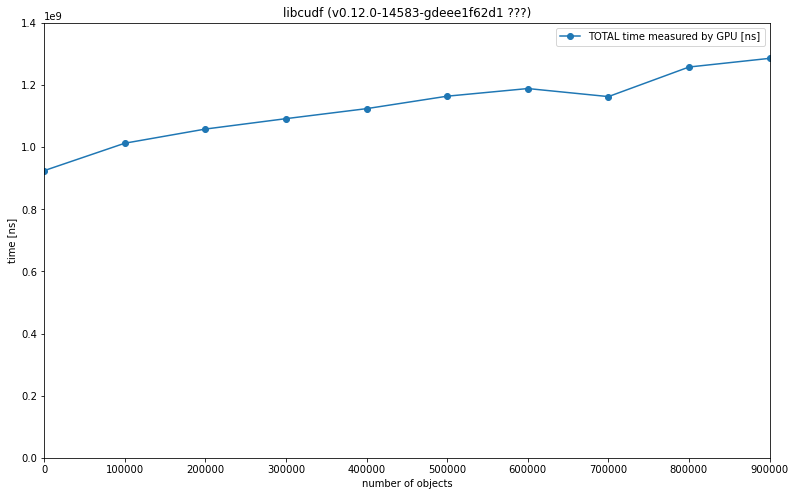

In [ ]:
ax = df_cudf[['TOTAL time measured by GPU [ns]']]\
       .plot(title='libcudf (v0.12.0-14583-gdeee1f62d1 ???)',
            figsize=(13,8), style='o-',
            xlim=(0,900000),
            ylim=(0,1400000000), ylabel='time [ns]')

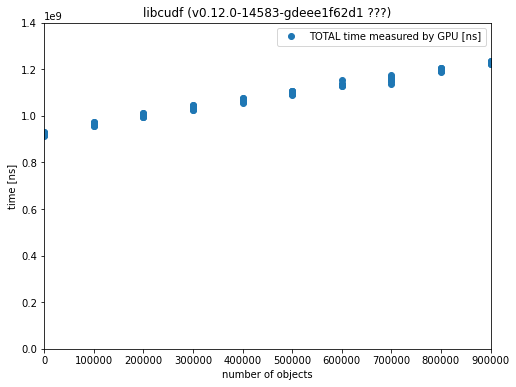

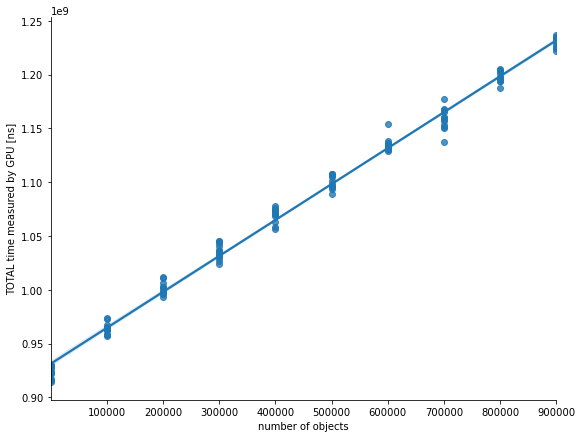

In [ ]:
ax = df_cudf_samples[['TOTAL time measured by GPU [ns]']].plot(
    title='libcudf (v0.12.0-14583-gdeee1f62d1 ???)',
    figsize=(8,6), style='o',
    xlim=(0,900000),
    ylim=(0,1400000000), ylabel='time [ns]'
)
ax = sns.lmplot(
    data=df_cudf_samples,
    x='number of objects',
    y='TOTAL time measured by GPU [ns]',
    robust=True,
    height=6, aspect=8/6,
) 

In [ ]:
s=df_cudf_samples.groupby(level=0)['TOTAL time measured by GPU [ns]'].median()
s

number of objects
10        9.233556e+08
100000    9.638461e+08
200000    1.000231e+09
300000    1.034761e+09
400000    1.070184e+09
500000    1.099718e+09
600000    1.132997e+09
700000    1.159320e+09
800000    1.196674e+09
900000    1.231435e+09
Name: TOTAL time measured by GPU [ns], dtype: float64

In [ ]:
s[10]

923355560.0

In [ ]:
df_cudf.at[10, 'TOTAL time measured by GPU [ns]']

924500183

In [ ]:
df_cudf_mv = df_cudf[['TOTAL time measured by GPU [ns]']] - df_cudf.at[10, 'TOTAL time measured by GPU [ns]']
df_cudf_mv

,TOTAL time measured by GPU [ns]
number of objects,
10,0
100000,88254272
200000,133821960
300000,167320861
400000,199541442
500000,239650573
600000,264228576
700000,238297424
800000,333518615


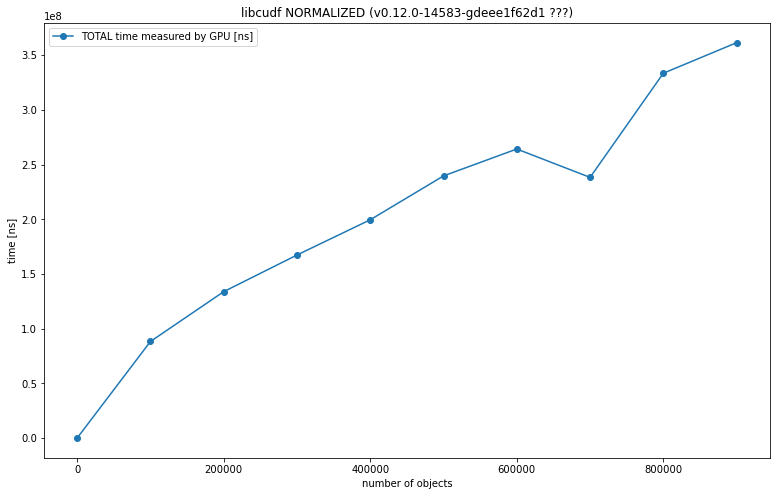

In [ ]:
ax = df_cudf_mv.plot(title='libcudf NORMALIZED (v0.12.0-14583-gdeee1f62d1 ???)',
                      figsize=(13,8), style='o-',
                      ylabel='time [ns]')

In [ ]:
df_cmp = pd.DataFrame()
df_cmp['meta-json-parser (STATIC, ws=32, assumptions=none, !convert)'] = \
   df['Total time measured by GPU [ns]'] - df['Copying output [ns]']
df_cmp['use-libcudf-parser (NORMALIZED, v0.12.0-14583-gdeee1f62d1 ???))'] = \
   df_cudf_mv

In [ ]:
df_cmp = pd.DataFrame()
df_cmp['meta-json-parser (STATIC, ws=32, assumptions=none, !convert)'] = \
   df['Total time measured by GPU [ns]'] - df['Copying output [ns]']
df_cmp['use-libcudf-parser (NORMALIZED, v0.12.0-14583-gdeee1f62d1 ???, median of 12)'] = \
   s - s[10]

In [ ]:
df_cmp

,"meta-json-parser (STATIC, ws=32, assumptions=none, !convert)","use-libcudf-parser (NORMALIZED, v0.12.0-14583-gdeee1f62d1 ???, median of 12)"
number of objects,,
100000,16660400,40490569.5
200000,31412293,76875152.5
300000,46075683,111405914.0
400000,61527466,146828216.5
500000,76929932,176362457.0
600000,91613282,209641571.0
700000,107148438,235964569.0
800000,120071777,273318756.0
900000,136462402,308079071.0


In [ ]:
df_ratio=df_cmp.iloc[:,1]/df_cmp.iloc[:,0]
df_ratio

number of objects
100000    2.430348
200000    2.447295
300000    2.417890
400000    2.386385
500000    2.292508
600000    2.288332
700000    2.202221
800000    2.276295
900000    2.257611
dtype: float64

(0.0, 3.0)

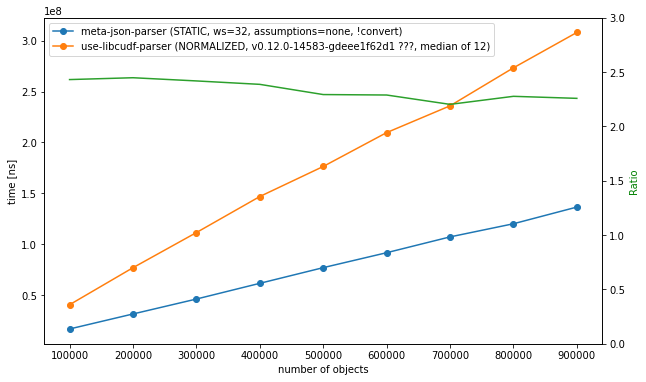

In [ ]:
ax = df_cmp.plot(
    figsize=(10,6), style='o-',
    ylabel='time [ns]',
    #grid=True,
)
df_ratio.plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylabel('Ratio', color='g')
ax.right_ax.set_ylim(bottom=0.0, top=3.0)

### RAPIDS Docker image: CUDA 11.4, cuDF 21.10

RAPIDS Docker image: `rapidsai/rapidsai-core-dev:21.10-cuda11.4-devel-ubuntu20.04-py3.8`  
cgroups turned off

See https://hub.docker.com/r/rapidsai/rapidsai-dev/tags

```.sh
sudo docker run --gpus all --rm -it \
 --device /dev/nvidia0 --device /dev/nvidia-modeset \
 --device /dev/nvidia-uvm --device /dev/nvidia-uvm-tools \
 --device /dev/nvidiactl \
 -p 8888:8888 -p 8787:8787 -p 8786:8786 \
 -v ${HOME}/GPU-IDUB/meta-json-parser:/meta-json-parser \
 -v ${HOME}/GPU-IDUB/data:/data \
 rapidsai/rapidsai-core-dev:21.10-cuda11.4-devel-ubuntu20.04-py3.8
```

In [ ]:
# read results for ./meta-json-parser-benchmark with --use-libcudf-parser
df_cudf = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_multisample_choinka.csv', index_col=2).sort_index()
df_cudf['number of objects'] = df_cudf.index

In [ ]:
df_cudf

,json file,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],number of objects
number of objects,,,,,,,,
10,sample_10.json,3762,2272,14303,3831840,3848416,3942117,10
10,sample_10.json,3762,2240,14080,3907840,3924160,4021684,10
10,sample_10.json,3762,2047,14175,3805183,3821408,3910966,10
10,sample_10.json,3762,3199,14655,3729023,3746880,3868862,10
10,sample_10.json,3762,2495,14112,3743904,3760512,3852246,10
...,...,...,...,...,...,...,...,...
900000,sample_900000.json,338913914,6144,21536,386085052,386112731,434346708,900000
900000,sample_900000.json,338913914,6240,20160,388579315,388605712,437848760,900000
900000,sample_900000.json,338913914,6335,22239,389391754,389420318,438399325,900000


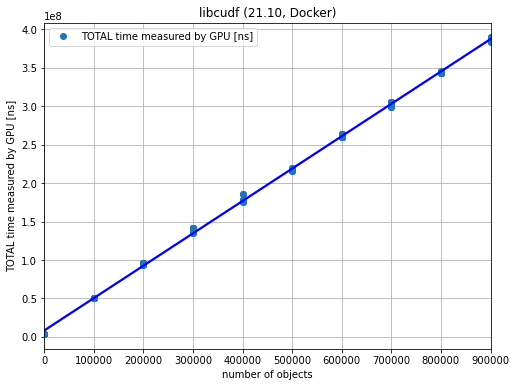

In [ ]:
ax = df_cudf[['TOTAL time measured by GPU [ns]']].plot(
    title='libcudf (21.10, Docker)',
    figsize=(8,6), style='o',
    xlim=(0,900000),
    # ylim=(0,1400000000), 
    ylabel='time [ns]',
    grid=True,
)
ax = sns.regplot(
    ax=ax,
    data=df_cudf,
    x='number of objects',
    y='TOTAL time measured by GPU [ns]',
    #robust=True,
    color='b',
) 

In [ ]:
# read results for ./meta-json-parser-benchmark 
df_meta = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_multisample_choinka.csv', index_col=2).sort_index()
df_meta['number of objects'] = df_meta.index
df_meta['NOD2H time measured by GPU [ns]'] = df_meta['TOTAL time measured by GPU [ns]'] - df_meta['Copying output [ns]']

In [ ]:
df_meta.columns

Index(['json file', 'file size [bytes]', 'max string size', 'string handling',
       'assumptions', 'workgroup size', 'Initialization [ns]',
       'Memory allocation and copying [ns]', 'Finding newlines offsets [ns]',
       'TOTAL Parsing time (JSON+hooks) [ns]', 'JSON processing [ns]',
       'Post kernel hooks [ns]', 'Copying output [ns]',
       'Converting to cuDF format [ns]', 'TOTAL time measured by GPU [ns]',
       'TOTAL time measured by CPU [ns]', 'number of objects',
       'NOD2H time measured by GPU [ns]'],
      dtype='object')

In [ ]:
df_meta

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],number of objects,NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,,
10,sample_10.json,3762,NaN,STATIC,none,32,5599,341791,152032,870624,751232,119392,165631,1248160,2783839,2870168,10,2618208
10,sample_10.json,3762,NaN,STATIC,none,32,4031,424416,171200,858943,745280,113664,167263,1331007,2956864,3052399,10,2789601
10,sample_10.json,3762,NaN,STATIC,none,32,4160,426432,168224,854016,743423,110592,170016,1235136,2857984,2946866,10,2687968
10,sample_10.json,3762,NaN,STATIC,none,32,4480,425695,194848,906592,785632,120959,174559,1306848,3013024,3117893,10,2838465
10,sample_10.json,3762,NaN,STATIC,none,32,4095,445791,174751,860159,751616,108543,171552,1280287,2936640,3032761,10,2765088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800000,sample_800000.json,301259755,NaN,STATIC,none,32,6783,44037952,3212608,71268707,71162750,105952,2627487792,9944000,2755957763,2798275799,800000,128469971
900000,sample_900000.json,338913914,NaN,STATIC,none,32,8191,49387424,3575999,78596092,78479133,116959,2941532226,10542528,3083642333,3131416311,900000,142110107
900000,sample_900000.json,338913914,NaN,STATIC,none,32,6304,49463294,3559423,78274208,78171714,102495,2940141113,10565600,3082010009,3129716678,900000,141868896


In [ ]:
# read results for ./meta-json-parser-benchmark 
df_meta_min = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_sample=12_dynamic_v1_const-order_w32_choinka.csv', index_col=2).sort_index()
df_meta_min['number of objects'] = df_meta_min.index
df_meta_min['NOD2H time measured by GPU [ns]'] = df_meta_min['TOTAL time measured by GPU [ns]'] - df_meta_min['Copying output [ns]']

df_meta_min

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],number of objects,NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,,
10,sample_10.json,3762,32,DYNAMIC V1,constant order,32,21727,434495,166367,337920,165887,172031,214847,80480,1255839,1371848,10,1040992
10,sample_10.json,3762,32,DYNAMIC V1,constant order,32,19424,481279,173695,339648,165887,173759,211968,84031,1310047,1406352,10,1098079
10,sample_10.json,3762,32,DYNAMIC V1,constant order,32,20703,503808,200672,344096,169952,174143,227328,87583,1384191,1497964,10,1156863
10,sample_10.json,3762,32,DYNAMIC V1,constant order,32,15615,518208,176832,347871,167263,180608,217759,84448,1360736,1483775,10,1142977
10,sample_10.json,3762,32,DYNAMIC V1,constant order,32,18432,457248,174112,341280,167935,173344,223839,94655,1309568,1406198,10,1085729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900000,sample_900000.json,338913914,32,DYNAMIC V1,constant order,32,26623,49911582,3639519,69401885,67018753,2383136,3273831787,113087,3396924560,3444977892,900000,123092773
900000,sample_900000.json,338913914,32,DYNAMIC V1,constant order,32,20608,50133502,3570784,70548385,68177986,2370399,3273725585,111808,3398110595,3445970407,900000,124385010
900000,sample_900000.json,338913914,32,DYNAMIC V1,constant order,32,30719,50367198,3739039,69174079,66906944,2267136,3266715820,110592,3390137451,3439549609,900000,123421631


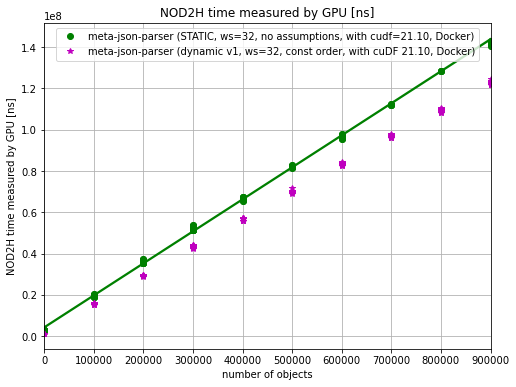

In [ ]:
ax = df_meta[['NOD2H time measured by GPU [ns]']].plot(
    title='NOD2H time measured by GPU [ns]',
    figsize=(8,6), style='o',color='g',
    xlim=(0,900000),
    # ylim=(0,1400000000), 
    ylabel='time [ns]',
    grid=True,
)
ax = df_meta_min[['NOD2H time measured by GPU [ns]']].plot(
    ax=ax,
    style='*',color='m',
    grid=True,
)
ax = sns.regplot(
    ax=ax,
    data=df_meta,
    x='number of objects',
    y='NOD2H time measured by GPU [ns]',
    #robust=True,
    color='g',
)
ax.legend(['meta-json-parser (STATIC, ws=32, no assumptions, with cudf=21.10, Docker)',
           'meta-json-parser (dynamic v1, ws=32, const order, with cuDF 21.10, Docker)'],
          loc='upper center')
plt.show()

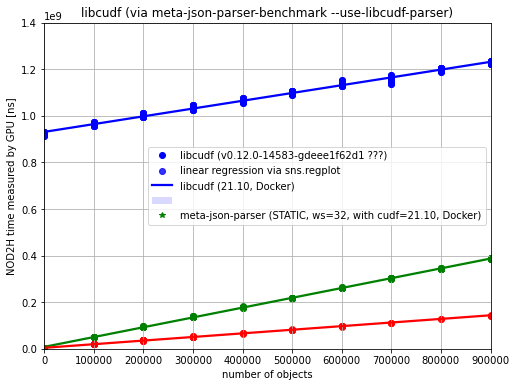

In [ ]:
fig, ax = plt.subplots()
ax1 = df_cudf_samples[['TOTAL time measured by GPU [ns]']].plot(
    ax=ax,
    title='libcudf (via meta-json-parser-benchmark --use-libcudf-parser)',
    #label='libcudf (v0.12.0-14583-gdeee1f62d1 ???)',
    figsize=(8,6), style='o',
    color='b',
    xlim=(0,900000),
    ylim=(0,1400000000),
    ylabel='time [ns]',
    grid=True,
)
ax2 = sns.regplot(
    ax=ax,
    data=df_cudf_samples,
    x='number of objects',
    y='TOTAL time measured by GPU [ns]',
    color='b'
    #robust=True,
    #height=6, aspect=8/6,
) 
ax3 = df_cudf[['TOTAL time measured by GPU [ns]']].plot(
    ax=ax,
    #label='libcudf (21.10, Docker)',
    #figsize=(8,6), 
    style='*', color='g',
    # xlim=(0,900000),
    # ylim=(0,1400000000), 
    # ylabel='time [ns]',
    grid=True,
)
ax4 = sns.regplot(
    ax=ax,
    data=df_cudf,
    x='number of objects',
    y='TOTAL time measured by GPU [ns]',
    #robust=True,
    color='g',
)
sns.regplot(
    ax=ax,
    data=df_meta,
    x='number of objects',
    y='NOD2H time measured by GPU [ns]',
    #robust=True,
    color='r',
)
ax.legend(['libcudf (v0.12.0-14583-gdeee1f62d1 ???)','linear regression via sns.regplot','libcudf (21.10, Docker)',
           '','meta-json-parser (STATIC, ws=32, with cudf=21.10, Docker)'])
plt.savefig('fig.png', transparent=False)
plt.show()

In [ ]:
df_cmp = pd.DataFrame()
df_cmp['meta-json-parser (STATIC, ws=32, assumptions=none, cudf=21.10) median'] = \
   df_meta.groupby(level=0)['NOD2H time measured by GPU [ns]'].median()
df_cmp['meta-json-parser (DYNAMIC V1, ws=32, const order, cudf=21.10) median'] = \
   df_meta_min.groupby(level=0)['NOD2H time measured by GPU [ns]'].median()
df_cmp['benchmark --use-libcudf-parser (Docker, cudf=21.10) median'] = \
   df_cudf.groupby(level=0)['TOTAL time measured by GPU [ns]'].median()

In [ ]:
df_cmp

,"meta-json-parser (STATIC, ws=32, assumptions=none, cudf=21.10) median","meta-json-parser (DYNAMIC V1, ws=32, const order, cudf=21.10) median","benchmark --use-libcudf-parser (Docker, cudf=21.10) median"
number of objects,,,
10,2769089.0,1096863.5,3799232.0
100000,19597625.0,15668090.5,50587646.0
200000,36163116.5,29145019.5,95226974.0
300000,52238922.0,43061218.0,137216583.0
400000,67070434.5,56801940.5,177795837.0
500000,81860718.0,70211486.5,217732543.0
600000,97068908.5,83038818.5,261726196.0
700000,112215576.0,96363648.0,302828369.0
800000,128584839.0,109412841.5,343988342.0


In [ ]:
s_ratio = df_cmp.iloc[:,2] / df_cmp.iloc[:,1]
s_ratio

number of objects
10        3.463724
100000    3.228705
200000    3.267350
300000    3.186547
400000    3.130101
500000    3.101096
600000    3.151854
700000    3.142558
800000    3.143949
900000    3.150983
dtype: float64

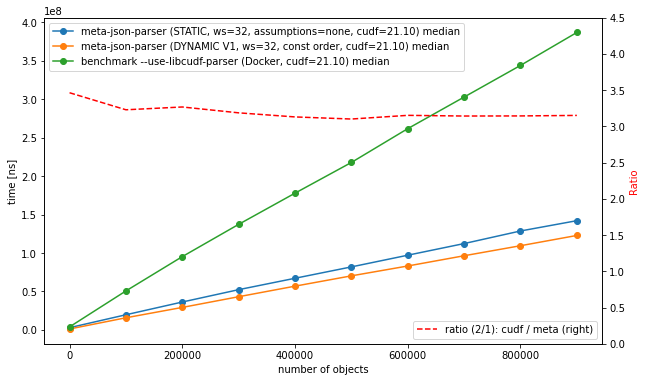

In [ ]:
ax = df_cmp.plot(
    figsize=(10,6), style='o-',
    ylabel='time [ns]',
    #grid=True,
)
s_ratio.plot(ax=ax, secondary_y=True,
             style='--', color='r',
             label='ratio (2/1): cudf / meta')
ax.right_ax.set_ylabel('Ratio', color='r')
ax.right_ax.set_ylim(bottom=0.0, top=4.5)
ax.right_ax.legend(loc='lower right')
plt.savefig('fig.png', transparent=False)
plt.show()

## Grid search - analysis of meta-parser behavior

This section contains analysis of changes in `meta-json-parser-benchmark` performance for different sets of parameters configuring the parser.  The `benchmark_metaparser_cudf=21.10-docker_size=900000_grid_choinka.csv` file that will be used for this analysis was generated using the `run_benchmarks_grid.sh` script a few times (to protect against random timing differences).

All results are for the default largest size (900000) of JSON generated using `poc/generate.py` script from [json2meta](https://github.com/mis-wut/json2meta).

In [ ]:
# read results for ./meta-json-parser-benchmark 
df_grid = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_size=900000_grid_choinka.csv', index_col=2).sort_index()
# this is unnecessary for grid search results, as size is the same for each entry
#df_grid['number of objects'] = df_grid.index
# for STATIC string handling the maximum string size is hardcoded to 32 characters, and there is no --max-string-size runtime option
df_grid['max string size'] = df_grid['max string size'].fillna(32)
df_grid['NOD2H time measured by GPU [ns]'] = df_grid['TOTAL time measured by GPU [ns]'] - df_grid['Copying output [ns]']

df_grid

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
900000,sample_900000.json,338913914,32.0,STATIC,none,32,6304,49057567,3530976,78557182,78440444,116736,2937128662,10297183,3078577880,3126835062,141449218
900000,sample_900000.json,338913914,32.0,DYNAMIC V1,none,32,21312,49442817,3532799,1014925354,86335487,928589904,3266677490,310624,4334910644,4382809679,1068233154
900000,sample_900000.json,338913914,32.0,DYNAMIC V2,none,32,24544,50156383,140039398,88484642,82230049,6254591,3274138183,269918395,3822761474,3870684219,548623291
900000,sample_900000.json,338913914,32.0,DYNAMIC V3,none,32,20735,50958782,3563424,91324508,86498817,4825695,3282231689,304287,3428403320,3476167371,146171631
900000,sample_900000.json,338913914,32.0,STATIC,none,16,8063,49893985,3573760,206344192,206243453,100735,2945968994,10409760,3216198730,3265365977,270229736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900000,sample_900000.json,338913914,32.0,STATIC,constant order,16,7263,49396640,3546144,157855865,157776870,79007,2953618896,10203583,3174628417,3223056821,221009521
900000,sample_900000.json,338913914,32.0,STATIC,constant order,16,7168,49362720,3544480,166859588,166779708,79871,2953339111,10266079,3183379150,3231689556,230040039
900000,sample_900000.json,338913914,32.0,STATIC,constant order,16,7872,49488479,3574016,156843994,156741592,102399,2942251220,10354175,3162519775,3210266154,220268555


In [ ]:
df_grid.columns

Index(['json file', 'file size [bytes]', 'max string size', 'string handling',
       'assumptions', 'workgroup size', 'Initialization [ns]',
       'Memory allocation and copying [ns]', 'Finding newlines offsets [ns]',
       'TOTAL Parsing time (JSON+hooks) [ns]', 'JSON processing [ns]',
       'Post kernel hooks [ns]', 'Copying output [ns]',
       'Converting to cuDF format [ns]', 'TOTAL time measured by GPU [ns]',
       'TOTAL time measured by CPU [ns]', 'NOD2H time measured by GPU [ns]'],
      dtype='object')

Let's check if all possible values of parameters are represented in the results, namely:
- string handling: \['STATIC', 'DYNAMIC V1', 'DYNAMIC V2', 'DYNAMIC V3'\]
- assumptions: \['none', 'constant order'\]
- workgroup size: \[32, 16, 8, 4\]

In [ ]:
print('json file:       ', list(df_grid['json file'].unique()))
print('----------------')
print('max string size: ', list(df_grid['max string size'].unique()))
print('string handling: ', list(df_grid['string handling'].unique()))
print('assumptions:     ', list(df_grid['assumptions'].unique()))
print('workgroup size:  ', list(df_grid['workgroup size'].unique()))

json file:        ['sample_900000.json']
----------------
max string size:  [32.0]
string handling:  ['STATIC', 'DYNAMIC V1', 'DYNAMIC V2', 'DYNAMIC V3']
assumptions:      ['none', 'constant order']
workgroup size:   [32, 16, 8, 4]


Let's check if all possible combinations of values of parameters are present, namely

\['STATIC', 'DYNAMIC V1', 'DYNAMIC V2', 'DYNAMIC V3'\] \* \['none', 'constant order'\] \* \[32, 16, 8, 4\]

Which is 4\*2\*4 = 32

In [ ]:
df_grid_grouped = df_grid.groupby(['string handling', 'max string size', 'assumptions', 'workgroup size'])
print('size of set of all parameters = 4*2*4 =', 4*2*4)
print(4*2*4)
len(set([f"{x}" for x in df_grid_grouped.groups.keys()]))

size of set of all parameters = 4*2*4 = 32
32


32

In [ ]:
df_grid_grouped.count()['NOD2H time measured by GPU [ns]']

string handling  max string size  assumptions     workgroup size
DYNAMIC V1       32.0             constant order  4                 10
                                                  8                  7
                                                  16                13
                                                  32                13
                                  none            4                  7
                                                  8                  7
                                                  16                 9
                                                  32                10
DYNAMIC V2       32.0             constant order  4                 13
                                                  8                  7
                                                  16                13
                                                  32                13
                                  none            4                  7
            

In [ ]:
df_grid_grouped\
  .median()[['NOD2H time measured by GPU [ns]']]\
  .style\
  .highlight_min(axis=0)\
  .highlight_max(axis=0, color='cyan')
#.highlight_max(axis=0, props='color:white; font-weight:bold; background-color:darkblue;')

In [ ]:
df_grid_ws = df_grid_grouped.median().groupby('workgroup size')
df_grid_ws_res = pd.DataFrame(data={
    'mean time': df_grid_ws.mean()['NOD2H time measured by GPU [ns]'],
    'min time': df_grid_ws.min()['NOD2H time measured by GPU [ns]'],
    'max time': df_grid_ws.max()['NOD2H time measured by GPU [ns]'],
    'stddev': df_grid_ws.std()['NOD2H time measured by GPU [ns]'],
})
df_grid_ws_res

,mean time,min time,max time,stddev
workgroup size,,,,
4,2.821826e+08,224339599.0,332987549.0,5.053267e+07
8,2.780265e+08,251457764.0,291770264.0,1.448864e+07
16,2.540135e+08,228168457.0,280820679.0,2.242046e+07
32,1.345490e+08,122717041.0,146220703.0,9.352241e+06


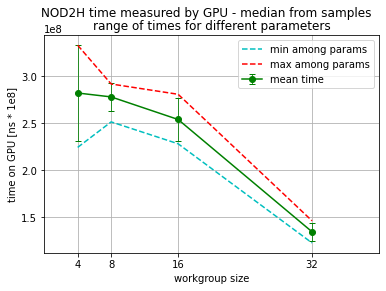

In [ ]:
fig, ax = plt.subplots()
fig.suptitle('NOD2H time measured by GPU - median from samples')
ax.set_title('range of times for different parameters')
ax.errorbar(x=df_grid_ws_res.index, y=df_grid_ws_res['mean time'], yerr=df_grid_ws_res['stddev'],
            linestyle='-', marker='o', elinewidth=0.8,capsize=3, color='g', label='mean time')
ax.plot(df_grid_ws_res.index, df_grid_ws_res['min time'], linestyle='--', color='c', label='min among params')
ax.plot(df_grid_ws_res.index, df_grid_ws_res['max time'], linestyle='--', color='r', label='max among params')
ax.set(xlim=(0,40), xticks=[4,8,16,32], xlabel='workgroup size',
       ylabel='time on GPU [ns * 1e8]')
ax.grid(visible=True)
ax.legend()

plt.savefig('fig.png', transparent=False)
plt.show()

In [ ]:
df_grid_str = df_grid_grouped.median().groupby('string handling')
df_grid_str_res = pd.DataFrame(data={
    'mean time': df_grid_str.mean()['NOD2H time measured by GPU [ns]'],
    'min time': df_grid_str.min()['NOD2H time measured by GPU [ns]'],
    'max time': df_grid_str.max()['NOD2H time measured by GPU [ns]'],
    'stddev': df_grid_str.std()['NOD2H time measured by GPU [ns]'],
})
df_grid_str_res

,mean time,min time,max time,stddev
string handling,,,,
DYNAMIC V1,2.381306e+08,122717041.0,321554443.5,7.139585e+07
DYNAMIC V2,2.335702e+08,128263672.0,331332764.0,6.852625e+07
DYNAMIC V3,2.384789e+08,126163574.0,332987549.0,7.137033e+07
STATIC,2.385920e+08,126944336.0,330011963.0,7.091955e+07


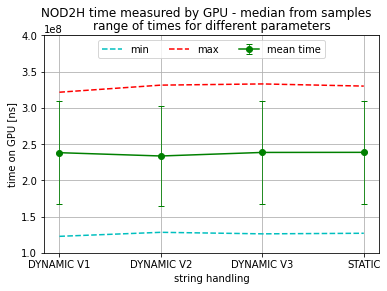

In [ ]:
fig, ax = plt.subplots()
fig.suptitle('NOD2H time measured by GPU - median from samples')
ax.set_title('range of times for different parameters')
ax.errorbar(x=df_grid_str_res.index, y=df_grid_str_res['mean time'], yerr=df_grid_str_res['stddev'],
            linestyle='-', marker='o', elinewidth=0.8,capsize=3, color='g', label='mean time')
ax.plot(df_grid_str_res.index, df_grid_str_res['min time'], linestyle='--', color='c', label='min')
ax.plot(df_grid_str_res.index, df_grid_str_res['max time'], linestyle='--', color='r', label='max')
ax.set(xlabel='string handling',
       ylabel='time on GPU [ns]',ylim=(1e8,4e8))
ax.grid(visible=True)
ax.legend(loc='upper center',ncol=3)

plt.savefig('fig.png', transparent=False)
plt.show()

In [ ]:
df = df_grid_ass = df_grid_grouped.median().groupby('assumptions')
df_grid_ass_res = pd.DataFrame(data={
    'mean time': df.mean()['NOD2H time measured by GPU [ns]'],
    'min time': df.min()['NOD2H time measured by GPU [ns]'],
    'max time': df.max()['NOD2H time measured by GPU [ns]'],
    'stddev':   df.std()['NOD2H time measured by GPU [ns]'],
})
df_grid_ass_res

,mean time,min time,max time,stddev
assumptions,,,,
constant order,2.445056e+08,122717041.0,332987549.0,7.891656e+07
none,2.298802e+08,141437133.5,280820679.0,5.442301e+07


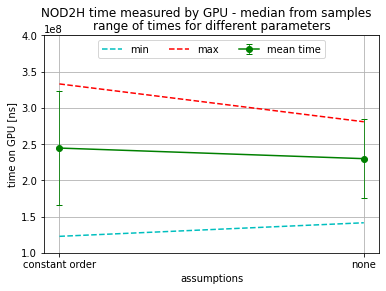

In [ ]:
df = df_grid_ass_res

fig, ax = plt.subplots()
fig.suptitle('NOD2H time measured by GPU - median from samples')
ax.set_title('range of times for different parameters')
ax.errorbar(x=df.index, y=df['mean time'], yerr=df['stddev'],
            linestyle='-', marker='o', elinewidth=0.8,capsize=3, color='g', label='mean time')
ax.plot(df.index, df['min time'], linestyle='--', color='c', label='min')
ax.plot(df.index, df['max time'], linestyle='--', color='r', label='max')
ax.set(xlabel='assumptions',
       ylabel='time on GPU [ns]',ylim=(1e8,4e8))
ax.grid(visible=True)
ax.legend(loc='upper center',ncol=3)

plt.savefig('fig.png', transparent=False)
plt.show()

## Assumptions

In [ ]:
df_meta_none = pd.read_csv('benchmark_metaparser-assumptions=none_ws=32_static-cudf=21-10-docker_generated_1M.csv', index_col=2).sort_index()
df_meta_none['NOD2H time measured by GPU [ns]'] = \
  df_meta_none['TOTAL time measured by GPU [ns]'] - \
  df_meta_none['Copying output [ns]']

df_meta_none.describe()

,file size [bytes],max string size,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
count,25.0,25.0,25.0,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,376571688.0,32.0,32.0,7569.400000,5.442482e+07,3.920605e+06,9.219772e+07,9.211834e+07,79379.880000,3.656999e+09,1.227654e+07,3.819826e+09,3.880724e+09,1.628273e+08
std,0.0,0.0,0.0,2227.137438,2.670494e+05,3.727209e+04,3.569809e+06,3.570066e+06,9647.911533,6.478263e+06,9.712671e+04,7.323190e+06,7.361821e+06,3.601236e+06
min,376571688.0,32.0,32.0,6111.000000,5.396579e+07,3.881824e+06,8.470854e+07,8.460013e+07,71103.000000,3.644239e+09,1.217869e+07,3.804140e+09,3.864528e+09,1.554211e+08
25%,376571688.0,32.0,32.0,6847.000000,5.424538e+07,3.892863e+06,9.008413e+07,9.001302e+07,73023.000000,3.653377e+09,1.220909e+07,3.815860e+09,3.877058e+09,1.606624e+08
50%,376571688.0,32.0,32.0,7135.000000,5.440963e+07,3.904767e+06,9.418646e+07,9.411149e+07,75039.000000,3.655500e+09,1.223392e+07,3.819421e+09,3.880205e+09,1.646104e+08
75%,376571688.0,32.0,32.0,7424.000000,5.452330e+07,3.939424e+06,9.434579e+07,9.427123e+07,80576.000000,3.662361e+09,1.231299e+07,3.824843e+09,3.885857e+09,1.651226e+08
max,376571688.0,32.0,32.0,17952.000000,5.505565e+07,3.997567e+06,9.548221e+07,9.541011e+07,108415.000000,3.668188e+09,1.261283e+07,3.833655e+09,3.894654e+09,1.661797e+08


In [ ]:
df_meta_const = pd.read_csv('benchmark_metaparser-assumptions=const_ws=32_static-cudf=21-10-docker_generated_1M.csv', index_col=2).sort_index()
df_meta_const['NOD2H time measured by GPU [ns]'] = \
  df_meta_const['TOTAL time measured by GPU [ns]'] - \
  df_meta_const['Copying output [ns]']

df_meta_const.describe()

,file size [bytes],max string size,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
count,25.0,25.0,25.0,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,376571688.0,32.0,32.0,8282.280000,5.429160e+07,3.919756e+06,7.194819e+07,7.186689e+07,81296.160000,3.656018e+09,1.227563e+07,3.798462e+09,3.859120e+09,1.424435e+08
std,0.0,0.0,0.0,2687.579061,2.823777e+05,4.240801e+04,1.389659e+06,1.386591e+06,15739.786206,5.686828e+06,8.004246e+04,6.056979e+06,6.169198e+06,1.480887e+06
min,376571688.0,32.0,32.0,6080.000000,5.391875e+07,3.878047e+06,6.916723e+07,6.909232e+07,72383.000000,3.644454e+09,1.215395e+07,3.786176e+09,3.847003e+09,1.397896e+08
25%,376571688.0,32.0,32.0,7199.000000,5.402941e+07,3.883968e+06,7.125072e+07,7.117267e+07,74656.000000,3.652219e+09,1.220618e+07,3.794032e+09,3.854457e+09,1.417000e+08
50%,376571688.0,32.0,32.0,7679.000000,5.423942e+07,3.910943e+06,7.237056e+07,7.229591e+07,75327.000000,3.658391e+09,1.225770e+07,3.798619e+09,3.859367e+09,1.430164e+08
75%,376571688.0,32.0,32.0,8000.000000,5.453011e+07,3.927232e+06,7.295555e+07,7.288294e+07,79456.000000,3.660572e+09,1.233046e+07,3.803896e+09,3.864687e+09,1.435530e+08
max,376571688.0,32.0,32.0,18079.000000,5.479101e+07,4.015039e+06,7.375197e+07,7.366294e+07,148928.000000,3.665200e+09,1.243299e+07,3.807209e+09,3.868088e+09,1.445513e+08


In [ ]:
df_meta_no_skip = pd.read_csv('benchmark_metaparser-assumptions=no_skip_ws=32_static-cudf=21-10-docker_generated_1M.csv', index_col=2).sort_index()
df_meta_no_skip['NOD2H time measured by GPU [ns]'] = \
  df_meta_no_skip['TOTAL time measured by GPU [ns]'] - \
  df_meta_no_skip['Copying output [ns]']

df_meta_no_skip.describe()

,file size [bytes],max string size,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
count,25.0,25.0,25.0,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,376571688.0,32.0,32.0,3405.680000,6.094132e+07,3.789046e+06,8.212991e+07,8.205403e+07,75881.920000,3.654561e+09,1.227865e+07,3.813704e+09,1.533536e+10,1.591423e+08
std,0.0,0.0,0.0,2793.312993,3.296652e+05,2.199144e+05,9.122004e+06,9.120237e+06,11474.988998,5.588051e+06,1.365089e+05,9.789317e+06,3.189164e+07,9.256556e+06
min,376571688.0,32.0,32.0,2047.000000,6.043114e+07,3.084255e+06,7.081280e+07,7.070707e+07,67904.000000,3.646239e+09,1.214093e+07,3.797492e+09,1.528707e+10,1.477727e+08
25%,376571688.0,32.0,32.0,2559.000000,6.059926e+07,3.827807e+06,7.303827e+07,7.296876e+07,69856.000000,3.649148e+09,1.218717e+07,3.804921e+09,1.531490e+10,1.502014e+08
50%,376571688.0,32.0,32.0,3040.000000,6.098006e+07,3.853024e+06,7.879360e+07,7.871754e+07,70784.000000,3.654778e+09,1.224662e+07,3.813288e+09,1.532531e+10,1.556790e+08
75%,376571688.0,32.0,32.0,3072.000000,6.113386e+07,3.861439e+06,9.352531e+07,9.345462e+07,73279.000000,3.658919e+09,1.230426e+07,3.818798e+09,1.537063e+10,1.700073e+08
max,376571688.0,32.0,32.0,16704.000000,6.166528e+07,4.054495e+06,9.477824e+07,9.468368e+07,107840.000000,3.664760e+09,1.261910e+07,3.831964e+09,1.539703e+10,1.728535e+08


In [ ]:
df_meta_skip_skip = pd.read_csv('benchmark_metaparser-assumptions=skip_1-ws=32_static-cudf=21-10-docker_generated-first_fields_1M.csv', index_col=2).sort_index()
df_meta_skip_skip['NOD2H time measured by GPU [ns]'] = \
  df_meta_skip_skip['TOTAL time measured by GPU [ns]'] - \
  df_meta_skip_skip['Copying output [ns]']

df_meta_skip_skip.describe()

,file size [bytes],max string size,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
count,25.0,25.0,25.0,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,376571688.0,32.0,32.0,2492.840000,5.372458e+07,3.211765e+06,4.983666e+07,4.976184e+07,74819.240000,9.160824e+08,2.687381e+06,1.025545e+09,2.120248e+09,1.094629e+08
std,0.0,0.0,0.0,407.602204,4.050418e+05,3.625421e+05,6.200592e+06,6.199911e+06,15316.003059,4.615226e+06,1.214550e+05,8.079680e+06,8.542817e+06,7.030775e+06
min,376571688.0,32.0,32.0,1888.000000,5.321296e+07,2.947360e+06,4.390598e+07,4.383574e+07,67455.000000,9.062070e+08,2.583744e+06,1.011548e+09,2.093838e+09,1.028746e+08
25%,376571688.0,32.0,32.0,2208.000000,5.343209e+07,2.960608e+06,4.616096e+07,4.609104e+07,68063.000000,9.145505e+08,2.611840e+06,1.020854e+09,2.119647e+09,1.050931e+08
50%,376571688.0,32.0,32.0,2495.000000,5.355114e+07,2.977855e+06,4.647802e+07,4.640765e+07,69407.000000,9.161962e+08,2.626399e+06,1.024668e+09,2.121733e+09,1.056043e+08
75%,376571688.0,32.0,32.0,2591.000000,5.385498e+07,3.325759e+06,5.086026e+07,5.078947e+07,70784.000000,9.201822e+08,2.691423e+06,1.031064e+09,2.125371e+09,1.108107e+08
max,376571688.0,32.0,32.0,3839.000000,5.446867e+07,3.864160e+06,6.094960e+07,6.088186e+07,137152.000000,9.237600e+08,2.944704e+06,1.042857e+09,2.134204e+09,1.221458e+08


In [ ]:
df_meta_skip_last = pd.read_csv('benchmark_metaparser-assumptions=skip_1-ws=32_static-cudf=21-10-docker_generated-last_5_fields-1M.csv', index_col=2).sort_index()
df_meta_skip_last['NOD2H time measured by GPU [ns]'] = \
  df_meta_skip_last['TOTAL time measured by GPU [ns]'] - \
  df_meta_skip_last['Copying output [ns]']

df_meta_skip_last.head(5)

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
1000000,sample_1000000.json,376571688,32,STATIC,skipping with default depth=8,32,1792,53647457,2971391,46470336,46403423,66912,905316284,2603615,1011010864,2095996424,105694580
1000000,sample_1000000.json,376571688,32,STATIC,skipping with default depth=8,32,2144,53532608,2972703,46504833,46425632,79199,908172058,2613375,1013797729,2111242592,105625671
1000000,sample_1000000.json,376571688,32,STATIC,skipping with default depth=8,32,2112,54400287,3840895,61012737,60944190,68544,905986694,2908416,1028151123,2112279001,122164429
1000000,sample_1000000.json,376571688,32,STATIC,skipping with default depth=8,32,2304,53707233,3211359,48037471,47969856,67616,913955322,2611968,1021525634,2111228244,107570312
1000000,sample_1000000.json,376571688,32,STATIC,skipping with default depth=8,32,2368,53962207,2964832,46295711,46227073,68640,907901794,2634592,1013761535,2107556086,105859741


In [ ]:
df_cudf = pd.read_csv('benchmark_libcudf-cudf=21.10-docker_generated_1M.csv', index_col=2)
df_cudf.describe()

,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns]
count,25.0,25.000000,25.000000,2.500000e+01,2.500000e+01,2.500000e+01
mean,376571688.0,6500.600000,23621.640000,4.227548e+08,4.227849e+08,4.837494e+08
std,0.0,553.105023,6116.408722,2.380144e+06,2.379878e+06,2.828145e+06
min,376571688.0,5791.000000,18303.000000,4.201219e+08,4.201502e+08,4.805480e+08
25%,376571688.0,6080.000000,20064.000000,4.212078e+08,4.212341e+08,4.816118e+08
50%,376571688.0,6399.000000,21439.000000,4.228066e+08,4.228338e+08,4.838781e+08
75%,376571688.0,6688.000000,25567.000000,4.236425e+08,4.236708e+08,4.846777e+08
max,376571688.0,7968.000000,49215.000000,4.312859e+08,4.313132e+08,4.939012e+08


In [ ]:
print(f"none    : {df_meta_none['NOD2H time measured by GPU [ns]'].median()}")
print(f"no_skip : {df_meta_no_skip['NOD2H time measured by GPU [ns]'].median()}")
print(f"const   : {df_meta_const['NOD2H time measured by GPU [ns]'].median()}")
print("")
print(f"skip_1  : {df_meta_skip_skip['NOD2H time measured by GPU [ns]'].median()}, 1/4 (5/20) first fields parsed")
print(f"skip_1  : {df_meta_skip_last['NOD2H time measured by GPU [ns]'].median()}, 1/4 (5/20) last  fields parsed")
print(f"--------")
print(f"cudf C++: {df_cudf['TOTAL time measured by GPU [ns]'].median()}")

none    : 164610352.0
no_skip : 155678955.0
const   : 143016357.0

skip_1  : 105604309.0, 1/4 (5/20) first fields parsed
skip_1  : 105859741.0, 1/4 (5/20) last  fields parsed
--------
cudf C++: 422833801.0


In [ ]:
print(f"skip_1  :±{1.4826*df_meta_skip_skip['NOD2H time measured by GPU [ns]'].mad():11.1f}, 1/4 (5/20) first fields parsed, 1.4826*MAD")

skip_1  :±  8731724.9, 1/4 (5/20) first fields parsed, 1.4826*MAD


In [ ]:
df_meta_short = pd.read_csv('benchmark_metaparser-assumptions=none-ws=32_static-cudf=21.10-docker_sample-first_5_fields-1M.csv', index_col=2).sort_index()
df_meta_short['NOD2H time measured by GPU [ns]'] = \
  df_meta_short['TOTAL time measured by GPU [ns]'] - \
  df_meta_short['Copying output [ns]']

df_meta_short.head(5)

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
1000000,sample-first_5_fields-1000000.json,88142029,32,STATIC,none,32,7168,13080384,1155040,16392992,16321279,71712,903244323,3192287,937072204,955283609,33827881
1000000,sample-first_5_fields-1000000.json,88142029,32,STATIC,none,32,8639,13129695,1131008,16443424,16367456,75967,912723327,3092128,946528198,961710221,33804871
1000000,sample-first_5_fields-1000000.json,88142029,32,STATIC,none,32,7168,13142623,1125471,16416095,16343807,72287,915938171,3091840,949721374,964397960,33783203
1000000,sample-first_5_fields-1000000.json,88142029,32,STATIC,none,32,6943,13118656,1149440,16395904,16325248,70656,918514770,3088320,952273986,966948691,33759216
1000000,sample-first_5_fields-1000000.json,88142029,32,STATIC,none,32,8031,13153183,1116991,16428800,16356767,72031,920257751,3125152,954089904,969131016,33832153


In [ ]:
df_cudf_short = pd.read_csv('benchmark_libcudf-cudf=21.10-docker_sample-first_5_fields-1M.csv', index_col=2)
df_cudf_short.describe()

,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns]
count,25.0,25.000000,25.000000,2.500000e+01,2.500000e+01,2.500000e+01
mean,88142029.0,6733.680000,21774.800000,9.089949e+07,9.092800e+07,1.057884e+08
std,0.0,3507.347736,1815.753035,6.204493e+05,6.215784e+05,6.388755e+05
min,88142029.0,4288.000000,19071.000000,8.953709e+07,8.956253e+07,1.044939e+08
25%,88142029.0,5791.000000,20576.000000,9.057312e+07,9.060227e+07,1.054759e+08
50%,88142029.0,6080.000000,21183.000000,9.101299e+07,9.103859e+07,1.057770e+08
75%,88142029.0,6591.000000,22304.000000,9.131744e+07,9.134333e+07,1.062957e+08
max,88142029.0,23199.000000,25536.000000,9.182697e+07,9.185513e+07,1.067540e+08


In [ ]:
print(f"none    :  {df_meta_short['NOD2H time measured by GPU [ns]'].median()} (sample-first_5_fields-1000000.json)")
print(f"cudf C++:  {df_cudf_short['TOTAL time measured by GPU [ns]'].median()} (sample-first_5_fields-1000000.json)")

none    :  33788635.0 (sample-first_5_fields-1000000.json)
cudf C++:  91038589.0 (sample-first_5_fields-1000000.json)


## Per type benchmark

### float

```json
{ "generic": 0, "scientific": 0e0, "fixed": 0.0 }
{ "generic": 1, "scientific": 1e0, "fixed": 1.0 }
{ "generic": 1e-3, "scientific": 1e-3, "fixed": 0.001 }
{ "generic": 3.14159265358979323846, "scientific": 7.07106781186547524401e-1, "fixed": 0.707106781186547524401 }
{ "generic": -1e6, "scientific": -1.2345e2, "fixed": -12.2345 }
```

In [ ]:
# read results for ./meta-json-parser-benchmark 
df_float_meta = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_float.csv', index_col=2).sort_index()
df_float_meta['NOD2H time measured by GPU [ns]'] = \
  df_float_meta['TOTAL time measured by GPU [ns]'] - df_float_meta['Copying output [ns]']

In [ ]:
df_float_meta.describe()

,file size [bytes],max string size,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
count,40.0,40.0,40.0,40.000000,4.000000e+01,40.000000,4.000000e+01,4.000000e+01,40.000000,4.000000e+01,40.000000,4.000000e+01,4.000000e+01,4.000000e+01
mean,66600000.0,32.0,32.0,7753.025000,9.861661e+06,875096.350000,3.014723e+07,3.004423e+07,102999.475000,2.028443e+08,534588.250000,2.442707e+08,2.558083e+08,4.142633e+07
std,0.0,0.0,0.0,906.326439,3.657225e+04,15219.813144,2.117408e+05,2.121706e+05,4517.843081,1.719904e+06,20051.850882,1.730977e+06,1.730532e+06,2.198219e+05
min,66600000.0,32.0,32.0,5663.000000,9.789759e+06,841791.000000,3.005318e+07,2.995059e+07,97088.000000,2.002000e+08,498879.000000,2.415287e+08,2.530341e+08,4.126726e+07
25%,66600000.0,32.0,32.0,7271.250000,9.838560e+06,866303.750000,3.006938e+07,2.996723e+07,100375.000000,2.020754e+08,519871.000000,2.434373e+08,2.549364e+08,4.133580e+07
50%,66600000.0,32.0,32.0,7999.500000,9.854384e+06,874367.000000,3.008128e+07,2.997741e+07,102399.000000,2.024328e+08,533744.000000,2.437938e+08,2.553278e+08,4.136425e+07
75%,66600000.0,32.0,32.0,8191.000000,9.881471e+06,884736.000000,3.009743e+07,2.999313e+07,104447.000000,2.030295e+08,545648.000000,2.447174e+08,2.562447e+08,4.141275e+07
max,66600000.0,32.0,32.0,10048.000000,9.967904e+06,908320.000000,3.114083e+07,3.103798e+07,126752.000000,2.085404e+08,582495.000000,2.499320e+08,2.614970e+08,4.244943e+07


In [ ]:
df_cudf = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_float.csv', index_col=2)
df_cudf.describe()

,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns]
count,40.0,40.00000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01
mean,66600000.0,6120.30000,21525.075000,6.206063e+07,6.208827e+07,7.363672e+07
std,0.0,880.85763,2693.396211,2.381866e+05,2.386302e+05,3.404672e+05
min,66600000.0,4095.00000,18271.000000,6.172643e+07,6.175152e+07,7.322273e+07
25%,66600000.0,5623.75000,19359.000000,6.189725e+07,6.192677e+07,7.337109e+07
50%,66600000.0,6144.00000,20671.500000,6.204221e+07,6.206754e+07,7.359853e+07
75%,66600000.0,6567.75000,23703.000000,6.217306e+07,6.219855e+07,7.381700e+07
max,66600000.0,8096.00000,29279.000000,6.289222e+07,6.291866e+07,7.462379e+07


In [ ]:
df_cmp = pd.DataFrame()
df_cmp['meta-json-parser'] = \
   df_float_meta['NOD2H time measured by GPU [ns]']
df_cmp['--use-libcudf-parser'] = \
   df_cudf['TOTAL time measured by GPU [ns]']

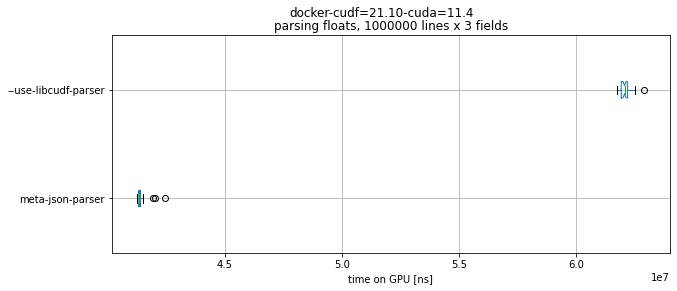

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing floats, 1000000 lines x 3 fields')
ax.set(xlabel='time on GPU [ns]')
df_cmp.boxplot(vert=False, notch=True)

plt.savefig('fig.png', transparent=False)
plt.show()

In [ ]:
s=df_cmp.median()
s[1]/s[0]

1.5005115528505897

In [ ]:
s

meta-json-parser        41364250.0
--use-libcudf-parser    62067535.0
dtype: float64

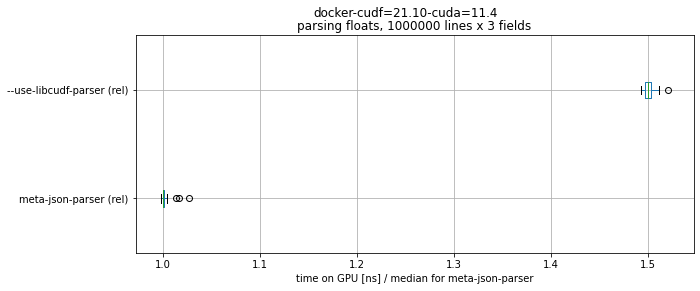

In [ ]:
df_cmp_rel = pd.DataFrame()
df_cmp_rel['meta-json-parser (rel)'] = \
   df_float_meta['NOD2H time measured by GPU [ns]']/s[0]
df_cmp_rel['--use-libcudf-parser (rel)'] = \
   df_cudf['TOTAL time measured by GPU [ns]']/s[0]

fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing floats, 1000000 lines x 3 fields')
ax.set(xlabel='time on GPU [ns] / median for meta-json-parser')
df_cmp_rel.boxplot(vert=False)

plt.savefig('fig.png', transparent=False)
plt.show()

### uint

```json
{ "uint": 0 }
{ "uint": 1 }
{ "uint": 2 }
{ "uint": 16 }
{ "uint": 256 }
{ "uint": 1024 }
{ "uint": 999999 }
{ "uint": 111111 }
{ "uint": 100000 }
```

```c++
// KEYS
using K_L1_uint = mp_string<'u', 'i', 'n', 't'>;

// DICT
template<template<class, int> class StringFun, class DictOpts>
using DictCreator = JDict < mp_list <
    mp_list<K_L1_uint, JNumber<uint32_t, K_L1_uint>>
>,
    DictOpts
> ;
```

In [ ]:
# read results for ./meta-json-parser-benchmark 
df_uint_meta = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_uint.csv', index_col=2).sort_index()
df_uint_meta['NOD2H time measured by GPU [ns]'] = \
  df_uint_meta['TOTAL time measured by GPU [ns]'] - df_uint_meta['Copying output [ns]']

df_uint_meta.describe()

,file size [bytes],max string size,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
count,20.0,20.0,20.0,20.000000,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,20.000000,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,2.000000e+01
mean,16600000.0,32.0,32.0,6754.800000,2.781638e+06,373167.550000,4.628001e+06,4.527548e+06,100452.550000,5.332526e+07,239969.250000,6.135480e+07,6.429996e+07,8.029533e+06
std,0.0,0.0,0.0,798.317547,3.416341e+04,16397.004048,7.206198e+03,6.074906e+03,5056.682369,1.065747e+06,28138.860643,1.102029e+06,1.131023e+06,6.056985e+04
min,16600000.0,32.0,32.0,5632.000000,2.749984e+06,348704.000000,4.613855e+06,4.515840e+06,94912.000000,5.155817e+07,220640.000000,5.954640e+07,6.251728e+07,7.953952e+06
25%,16600000.0,32.0,32.0,6144.000000,2.755624e+06,361775.250000,4.623631e+06,4.523960e+06,97791.750000,5.250629e+07,223943.750000,6.049302e+07,6.341267e+07,7.980270e+06
50%,16600000.0,32.0,32.0,6447.500000,2.774047e+06,369839.500000,4.628448e+06,4.526064e+06,100064.000000,5.292011e+07,230943.500000,6.093336e+07,6.384553e+07,8.022160e+06
75%,16600000.0,32.0,32.0,7464.000000,2.803064e+06,381887.250000,4.632959e+06,4.531992e+06,101440.000000,5.435189e+07,236096.000000,6.240419e+07,6.537502e+07,8.046064e+06
max,16600000.0,32.0,32.0,8128.000000,2.883744e+06,404000.000000,4.640768e+06,4.537663e+06,118784.000000,5.502547e+07,320832.000000,6.323152e+07,6.633542e+07,8.206051e+06


In [ ]:
df_uint_cudf = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_uint.csv', index_col=2)
df_uint_cudf.describe()

,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns]
count,20.0,20.000000,20.000000,2.000000e+01,2.000000e+01,2.000000e+01
mean,16600000.0,5261.900000,19432.950000,1.916137e+07,1.918607e+07,2.212878e+07
std,0.0,767.398401,1379.495158,2.612119e+05,2.622199e+05,3.042249e+05
min,16600000.0,4095.000000,16383.000000,1.893581e+07,1.895661e+07,2.188511e+07
25%,16600000.0,4535.750000,18527.250000,1.902147e+07,1.904671e+07,2.197443e+07
50%,16600000.0,5311.000000,19711.000000,1.908554e+07,1.910917e+07,2.203408e+07
75%,16600000.0,6080.000000,20479.000000,1.912921e+07,1.915549e+07,2.210441e+07
max,16600000.0,6368.000000,21632.000000,1.997203e+07,1.999894e+07,2.309184e+07


In [ ]:
df_uint_cmp = pd.DataFrame()
df_uint_cmp['meta-json-parser'] = \
   df_uint_meta['NOD2H time measured by GPU [ns]']
df_uint_cmp['--use-libcudf-parser'] = \
   df_uint_cudf['TOTAL time measured by GPU [ns]']

df_uint_cmp_median = df_uint_cmp.median()
df_uint_cmp_median

meta-json-parser         8022159.5
--use-libcudf-parser    19109167.5
dtype: float64

In [ ]:
df_uint_cmp_median[1]/df_uint_cmp_median[0]

2.3820478139333927

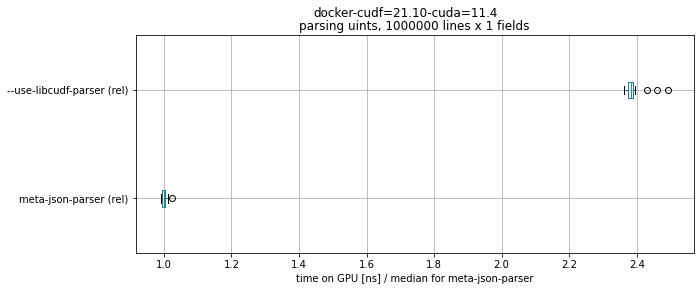

In [ ]:
df_uint_cmp_rel = pd.DataFrame()
df_uint_cmp_rel['meta-json-parser (rel)'] = \
   df_uint_meta['NOD2H time measured by GPU [ns]']/df_uint_cmp_median[0]
df_uint_cmp_rel['--use-libcudf-parser (rel)'] = \
   df_uint_cudf['TOTAL time measured by GPU [ns]']/df_uint_cmp_median[0]

fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing uints, 1000000 lines x 1 fields')
ax.set(xlabel='time on GPU [ns] / median for meta-json-parser')
df_uint_cmp_rel.boxplot(vert=False)

plt.savefig('fig_uint.png', transparent=False)
plt.show()

### strings

Repeated part of JSON Lines file to be parsed (`benchmark/examples/strings.json`):

```json
{"name":"name169","name2":"name8539","long":"123456789012345678901234567890"}
{"name":"name23","name2":"name1083","long":"___________________________"}
{"name":"name3064","name2":"name3847","long":"123456789|123456789|123456789"}
{"name":"name058","name2":"name95647","long":"123456789|xxxxxxxxx|123456789"}
{"name":"name125","name2":"name375","long":"abcderfffffffsde"}
{"name":"name858","name2":"name3754","long":"000000000|000000000#"}
{"name":"name482","name2":"name8688","long":"a'a'a'a'a'a'a'a'a'a'a'a'"}
{"name":"name127","name2":"name2307","long":"ala \"ma\" kota;? kotta'?"}
{"name":"name873","name2":"name77","long":"0123456789abcdef"}
{"name":"name365","name2":"name2145","long":"1234567890987654321234567890"}
```

Meta-definition for parsing (to be saved as `benchmark/data_def.cuh`

```c++
// INCLUDES
#include <meta_json_parser/meta_utility/metastring.h>

// EXAMPLE:
// {"name":"name169","name2":"name8539","long":"123456789012345678901234567890"}

// KEYS
using K_L1_name  = metastring("name");
using K_L1_name2 = metastring("name2");
using K_L1_long  = metastring("long");

// DICT
#define STATIC_STRING_SIZE 32
template<template<class, int> class StringFun, class DictOpts>
using DictCreator = JDict < mp_list <
        mp_list<K_L1_name,  StringFun<K_L1_name, STATIC_STRING_SIZE>>,
		mp_list<K_L1_name2, StringFun<K_L1_name2, STATIC_STRING_SIZE>>,
		mp_list<K_L1_long,  StringFun<K_L1_long, STATIC_STRING_SIZE>>
>,
        DictOpts
> ;
```

```
$ ../benchmark/run_benchmarks.py --workspace-size=32 --const-order=0 --samples=25 \
  --json-dir ../benchmark/examples/ --size=1000000 --pattern='strings_{n}.json' \
  --output-csv "benchmark_static_const=0.csv"
```

In [ ]:
# read results for ./meta-json-parser-benchmark 
df_meta = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_strings-static_w32.csv', index_col=2).sort_index()
df_meta['NOD2H time measured by GPU [ns]'] = \
  df_meta['TOTAL time measured by GPU [ns]'] - df_meta['Copying output [ns]']
df_meta.head()

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
1000000,strings_1000000.json,73200000,32,STATIC,none,32,6144,10969087,933215,10326368,10212127,114239,1150911743,4216671,1177363159,1188276333,26451416
1000000,strings_1000000.json,73200000,32,STATIC,none,32,9503,11110912,927999,10309599,10194911,114688,1150644653,4231359,1177234008,1188086055,26589355
1000000,strings_1000000.json,73200000,32,STATIC,none,32,7935,11020544,917504,10321920,10208671,113247,1146309814,4242303,1172819946,1183722701,26510132
1000000,strings_1000000.json,73200000,32,STATIC,none,32,7104,11005760,940223,10323967,10210816,113151,1143878173,4198463,1170353637,1181225049,26475464
1000000,strings_1000000.json,73200000,32,STATIC,none,32,6655,11010368,933888,10326016,10202688,123328,1144364990,4195040,1170837036,1181584332,26472046


```
$ ../benchmark/run_benchmarks.py --workspace-size=32 --samples=25 --use-libcudf-parser \
  --json-dir ../benchmark/examples/ --size=1000000 --pattern='strings_{n}.json' \
  --output-csv "benchmark_libcudf.csv"
```

In [ ]:
df_cudf = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_strings.csv', index_col=2)
df_cudf.head()

,json file,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns]
number of objects,,,,,,,
1000000,strings_1000000.json,73200000,6207,26272,71616867,71649345,82684470
1000000,strings_1000000.json,73200000,6111,21919,71336540,71364578,82265471
1000000,strings_1000000.json,73200000,7327,18944,71336288,71362556,82291754
1000000,strings_1000000.json,73200000,7296,20576,71358787,71386657,82612327
1000000,strings_1000000.json,73200000,5983,20031,71565376,71591392,82526787


In [ ]:
df_cmp = pd.DataFrame()
df_cmp['meta (static, max_len=32)'] = \
   df_meta['NOD2H time measured by GPU [ns]']
df_cmp['--use-libcudf-parser'] = \
   df_cudf['TOTAL time measured by GPU [ns]']

df_cmp_median = df_cmp.median()
df_cmp_median

meta (static, max_len=32)    26570923.0
--use-libcudf-parser         71528381.0
dtype: float64

In [ ]:
df_cmp_median[1]/df_cmp_median[0]

2.691979537180549

In [ ]:
df_cmp_rel = pd.DataFrame()
df_cmp_rel['meta (static, max_len=32, no assumpt.)'] = \
   df_meta['NOD2H time measured by GPU [ns]']/df_cmp_median[0]
df_cmp_rel['--use-libcudf-parser'] = \
   df_cudf['TOTAL time measured by GPU [ns]']/df_cmp_median[0]

```
$ ../benchmark/run_benchmarks.py --workspace-size=32 --const-order=1 --samples=25 \
  --json-dir ../benchmark/examples/ --size=1000000 --pattern='strings_{n}.json' \
  --output-csv "benchmark_static_const=1.csv"
```

In [ ]:
df_meta = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_strings-static_const-order_w32.csv', index_col=2).sort_index()
df_meta['NOD2H time measured by GPU [ns]'] = \
  df_meta['TOTAL time measured by GPU [ns]'] - df_meta['Copying output [ns]']

df_cmp_rel['meta (static, max_len=32, const order)'] = \
   df_meta['NOD2H time measured by GPU [ns]']/df_cmp_median[0]

df_meta.head()

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
1000000,strings_1000000.json,73200000,32,STATIC,constant order,32,7584,10992287,932063,9957375,9858528,98848,1150532470,4229856,1176651611,1187471764,26119141
1000000,strings_1000000.json,73200000,32,STATIC,constant order,32,6335,11120415,952192,9726304,9629568,96735,1151692626,4190303,1177688232,1188451333,25995606
1000000,strings_1000000.json,73200000,32,STATIC,constant order,32,7360,11021120,919488,10274880,10178624,96256,1149451782,4232895,1175907470,1186672068,26455688
1000000,strings_1000000.json,73200000,32,STATIC,constant order,32,8000,11090175,921599,10170368,10067168,103200,1149119628,4205088,1175514892,1186504087,26395264
1000000,strings_1000000.json,73200000,32,STATIC,constant order,32,8511,11313664,980000,10478560,10377856,100703,1152096923,4353375,1179230957,1190632426,27134034


```
$ ../benchmark/run_benchmarks.py --workspace-size=32 --const-order=1 --samples=25 \
   --json-dir ../benchmark/examples/ --size=1000000 --pattern='strings_{n}.json' \
   --max-string-size=32 --version=2 --output-csv "benchmark_const=1-version=2-max_size=32.csv"
```

In [ ]:
df_meta = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_strings_const-order_version=2_w32.csv', index_col=2).sort_index()
df_meta['NOD2H time measured by GPU [ns]'] = \
  df_meta['TOTAL time measured by GPU [ns]'] - df_meta['Copying output [ns]']

df_cmp_rel['meta (version=2, max_len=32, const order)'] = \
   df_meta['NOD2H time measured by GPU [ns]']/df_cmp_median[0]

df_meta.head()

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
1000000,strings_1000000.json,73200000,32,DYNAMIC V2,constant order,32,16383,11485183,940064,13538847,10943776,2595072,1303153808,1633504,1330767822,1341672060,27614014
1000000,strings_1000000.json,73200000,32,DYNAMIC V2,constant order,32,15391,11467743,922847,13509119,10913632,2595488,1304666870,1614303,1332196289,1342968270,27529419
1000000,strings_1000000.json,73200000,32,DYNAMIC V2,constant order,32,14336,11656991,943808,13548064,10955295,2592767,1298235595,1620064,1326018920,1337428111,27783325
1000000,strings_1000000.json,73200000,32,DYNAMIC V2,constant order,32,16256,11605919,944351,14089887,11495424,2594464,1292327270,1654175,1320637939,1331691838,28310669
1000000,strings_1000000.json,73200000,32,DYNAMIC V2,constant order,32,14336,11460607,937600,13492223,10895744,2596479,1295124633,1632447,1322661865,1333574105,27537232


```
$ ../benchmark/run_benchmarks.py --workspace-size=32 --const-order=1 --samples=25 \
   --json-dir ../benchmark/examples/ --size=1000000 --pattern='strings_{n}.json' \
   --max-string-size=32 --version=3 --output-csv "benchmark_const=1-version=3-max_size=32.csv"
```

In [ ]:
df_meta = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_strings_const-order_version=3_w32.csv', index_col=2).sort_index()
df_meta['NOD2H time measured by GPU [ns]'] = \
  df_meta['TOTAL time measured by GPU [ns]'] - df_meta['Copying output [ns]']

df_cmp_rel['meta (version=3, max_len=32, const order)'] = \
   df_meta['NOD2H time measured by GPU [ns]']/df_cmp_median[0]

df_meta.head()

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
1000000,strings_1000000.json,73200000,32,DYNAMIC V3,constant order,32,14592,11766495,937983,12298239,10245120,2053119,1292590087,1647328,1319254760,1330317311,26664673
1000000,strings_1000000.json,73200000,32,DYNAMIC V3,constant order,32,17535,11740032,935295,12552831,10496640,2056191,1294839477,1635007,1321720092,1332617848,26880615
1000000,strings_1000000.json,73200000,32,DYNAMIC V3,constant order,32,16416,11874943,933759,13043456,10985600,2057856,1297156494,1616960,1324641967,1335495551,27485473
1000000,strings_1000000.json,73200000,32,DYNAMIC V3,constant order,32,16383,11751199,929920,13188223,11132703,2055520,1293412231,1641023,1320938964,1331669726,27526733
1000000,strings_1000000.json,73200000,32,DYNAMIC V3,constant order,32,16287,11736960,936096,13097023,11019488,2077536,1297839111,1644608,1325270019,1336174431,27430908


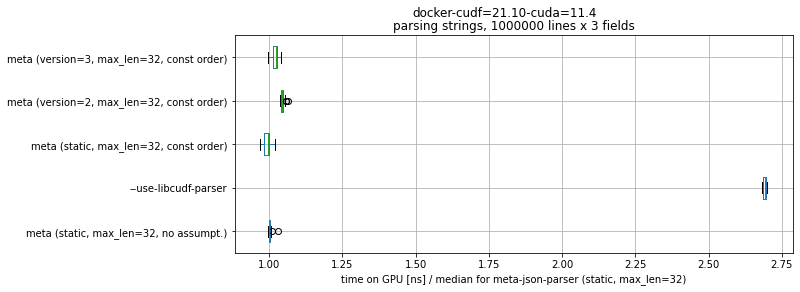

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing strings, 1000000 lines x 3 fields')
ax.set(xlabel='time on GPU [ns] / median for meta-json-parser (static, max_len=32)')
df_cmp_rel.boxplot(vert=False)

plt.savefig('fig_string.png', transparent=False)
plt.show()

### datetime

Repeated part of JSON Lines file to be parsed (`benchmark/examples/datetime.json`):

```.json
{ "date": "2021-03-18 00:16:48" }
{ "date": "2022-03-18 00:16:48" }
{ "date": "1989-11-22 12:34:15" }
{ "date": "2000-01-01 01:02:03" }
{ "date": "1970-01-01 00:00:01" }
```

Meta-definition for parsing (to be saved as `benchmark/data_def.cuh`)

```c++
// INCLUDES
#include <meta_json_parser/action/datetime/jdatetime.cuh>
#include <meta_json_parser/meta_utility/metastring.h>

// EXAMPLE:
// { "date": "2021-03-18 00:16:48" }

// KEYS
using K_L1_date = mp_string<'d', 'a', 't', 'e'>;

// FORMATS
using DatetimeFormat_YYYYMMDD_HHMMSS = metastring("%Y-%m-%d %H:%M:%S");

// DICT
#define STATIC_STRING_SIZE 32
template<template<class, int> class StringFun, class DictOpts>
using DictCreator = JDict < mp_list <
    mp_list<K_L1_date, JDatetime<DatetimeFormat_YYYYMMDD_HHMMSS, int64_t, K_L1_date>>,
>,
    DictOpts
> ;
```

Running micro-benchmarks:

```.sh
$ ../benchmark/run_benchmarks.py \
 --workspace-size=32 --const-order=1 --samples=50 \
 --json-dir=../benchmark/examples/ --size=1000000 --pattern='datetime_1000000.json' \
 --output-csv=benchmark_metaparser_cudf=21.10-docker_datetime.csv
```

In [ ]:
df_meta = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_datetime.csv', index_col=2).sort_index()
df_meta['NOD2H time measured by GPU [ns]'] = \
  df_meta['TOTAL time measured by GPU [ns]'] - df_meta['Copying output [ns]']

df_meta.head()

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
1000000,datetime_1000000.json,35000000,32,STATIC,constant order,32,8000,5374207,581568,6954495,6842304,112191,102975326,308768,116202369,122113267,13227043
1000000,datetime_1000000.json,35000000,32,STATIC,constant order,32,8031,5462175,564704,6965504,6856319,109183,108174560,349887,121524864,127126290,13350304
1000000,datetime_1000000.json,35000000,32,STATIC,constant order,32,6752,5357567,552959,6950784,6852096,98687,101788574,289696,114946334,120563642,13157760
1000000,datetime_1000000.json,35000000,32,STATIC,constant order,32,8191,5394239,545984,6926496,6828351,98144,101426307,287135,114588348,120241917,13162041
1000000,datetime_1000000.json,35000000,32,STATIC,constant order,32,5919,5355967,547360,6936192,6838272,97920,101435836,323935,114605216,120196261,13169380


Running micro-benchmarks:

```.sh
$ ../benchmark/run_benchmarks.py \
   --samples=50 --json-dir=../benchmark/examples/ --size=1000000 --pattern='datetime_1000000.json' \
   --use-libcudf-parser --output-csv=../benchmark/notebooks/benchmark_libcudf_cudf=21.10-docker_datetime.csv
```

In [ ]:
df_cudf = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_datetime.csv', index_col=2)
df_cudf.head()

,json file,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns]
number of objects,,,,,,,
1000000,datetime_1000000.json,35000000,4927,20479,33323009,33348415,38965257
1000000,datetime_1000000.json,35000000,6368,22463,33232894,33261726,38857204
1000000,datetime_1000000.json,35000000,5824,18464,33366752,33391040,38983750
1000000,datetime_1000000.json,35000000,7615,19007,34002944,34029567,40031879
1000000,datetime_1000000.json,35000000,6144,18495,33488414,33513057,39131443


In [ ]:
df_cmp = pd.DataFrame()
df_cmp['meta (datetime, no options)'] = \
   df_meta['NOD2H time measured by GPU [ns]']
df_cmp['--use-libcudf-parser'] = \
   df_cudf['TOTAL time measured by GPU [ns]']

df_cmp_median = df_cmp.median()
df_cmp_median

meta (datetime, no options)    13170212.0
--use-libcudf-parser           33525054.0
dtype: float64

In [ ]:
df_cmp_rel = pd.DataFrame()
df_cmp_rel['meta (datetime, no options)'] = \
   df_meta['NOD2H time measured by GPU [ns]']/df_cmp_median[0]
df_cmp_rel['--use-libcudf-parser'] = \
   df_cudf['TOTAL time measured by GPU [ns]']/df_cmp_median[0]

df_cmp_rel.head()

,"meta (datetime, no options)",--use-libcudf-parser
number of objects,,
1000000,1.004315,2.532109
1000000,1.013674,2.525527
1000000,0.999055,2.535346
1000000,0.999380,2.583828
1000000,0.999937,2.544610


Micro-benchmark, cont.
```.sh
 $ ../benchmark/run_benchmarks.py \
   --workspace-size=32 --const-order=1 \
   --samples=50 --json-dir=../benchmark/examples/ --size=1000000 --pattern='datetime_1000000.json' \
   --output-csv=../benchmark/notebooks/benchmark_metaparser_cudf=21.10-docker_datetime_as_string.csv
```

In [ ]:
df_meta = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_datetime_as_string.csv', index_col=2).sort_index()
df_meta['NOD2H time measured by GPU [ns]'] = \
  df_meta['TOTAL time measured by GPU [ns]'] - df_meta['Copying output [ns]']

df_cmp_rel['meta (STATIC string, max_len=32)'] = \
   df_meta['NOD2H time measured by GPU [ns]']/df_cmp_median[0]

df_cmp_rel.head()

,"meta (datetime, no options)",--use-libcudf-parser,"meta (STATIC string, max_len=32)"
number of objects,,,
1000000,1.004315,2.532109,0.915471
1000000,1.013674,2.525527,0.910222
1000000,0.999055,2.535346,0.910913
1000000,0.999380,2.583828,0.917294
1000000,0.999937,2.544610,0.915515


Micro-benchmark, cont.
```.sh
 $ ../benchmark/run_benchmarks.py \
   --samples=50 --json-dir=../benchmark/examples/ --size=1000000 --pattern='datetime_1000000.json' \
   --use-libcudf-parser --use-dtypes \
   --output-csv=../benchmark/notebooks/benchmark_libcudf_cudf=21.10-docker_datetime_dtypes.csv
```

In [ ]:
df_cudf = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_datetime_dtypes.csv', index_col=2)


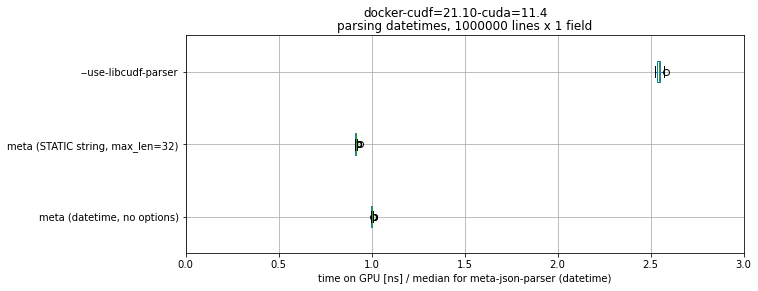

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing datetimes, 1000000 lines x 1 field')
ax.set(xlabel='time on GPU [ns] / median for meta-json-parser (datetime)')
ax.set(xlim=(0,3))
df_cmp_rel.boxplot(column=['meta (datetime, no options)', 'meta (STATIC string, max_len=32)', '--use-libcudf-parser'], vert=False)

#plt.savefig('fig_datetime.png', transparent=False)
plt.show()

### bool

Repeated part of JSON Lines file to be parsed (`benchmark/examples/bool_10.json`):
```json
{"is_checked":true,"1_is_checked":true,"2_is_checked":true}
{"is_checked":false,"1_is_checked":true,"2_is_checked":true}
{"is_checked":true,"1_is_checked":true,"2_is_checked":false}
{"is_checked":true,"1_is_checked":false,"2_is_checked":false}
{"is_checked":true,"1_is_checked":false,"2_is_checked":true}
```

Meta-definition for parsing (to be saved as benchmark/data_def.cuh)
```c++
// KEYS
using K_L1_is_checked   = metastring("is_checked");
using K_L1_1_is_checked = metastring("1_is_checked");
using K_L1_2_is_checked = metastring("2_is_checked");

// DICT
#define STATIC_STRING_SIZE 32
template<template<class, int> class StringFun, class DictOpts>
using DictCreator = JDict < mp_list <
        mp_list<K_L1_is_checked,   JBool<uint8_t, K_L1_is_checked>>,
		mp_list<K_L1_1_is_checked, JBool<uint8_t, K_L1_1_is_checked>>,
		mp_list<K_L1_2_is_checked, JBool<uint8_t, K_L1_2_is_checked>>, 
>,
        DictOpts
> ;

#ifdef HAVE_LIBCUDF
#define HAVE_DTYPES
std::map< std::string, cudf::data_type > dtypes{
    { "is_checked",   cudf::data_type{cudf::type_id::BOOL8} },
    { "1_is_checked", cudf::data_type{cudf::type_id::BOOL8} },
    { "2_is_checked", cudf::data_type{cudf::type_id::BOOL8} }
};
#endif
```

Running micro-benchmarks:
```sh
$ ../benchmark/run_benchmarks.py --workspace-size=32 --const-order=1 \
  --samples=50 --json-dir=../benchmark/examples/ --size=1000000 --pattern='bool_1000000.json' \
  --output-csv=../benchmark/notebooks/benchmark_metaparser_cudf=21.10-docker_bool.csv
```

In [ ]:
df_meta = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_bool.csv', index_col=2).sort_index()
df_meta['NOD2H time measured by GPU [ns]'] = \
  df_meta['TOTAL time measured by GPU [ns]'] - df_meta['Copying output [ns]']

df_meta.head()

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
1000000,bool_1000000.json,61500272,32,STATIC,constant order,32,6560,9017567,888671,9385248,9313728,71520,39463008,303808,59064865,69955257,19601857
1000000,bool_1000000.json,61500272,32,STATIC,constant order,32,8191,9015295,877888,9386207,9316736,69472,39912448,317184,59517215,72102186,19604767
1000000,bool_1000000.json,61500272,32,STATIC,constant order,32,7776,9035967,886623,9361536,9293215,68319,40296607,320032,59908542,70806452,19611935
1000000,bool_1000000.json,61500272,32,STATIC,constant order,32,6879,9113471,904832,9579104,9501279,77823,40660961,333247,60598495,71320281,19937534
1000000,bool_1000000.json,61500272,32,STATIC,constant order,32,8191,9006879,889056,9426367,9355263,71103,43252929,375999,62959423,73724317,19706494


Running micro-benchmarks:
```sh
$ ../benchmark/run_benchmarks.py --workspace-size=32 --const-order=1 \
  --samples=50 --json-dir=../benchmark/examples/ --size=1000000 --pattern='bool_1000000.json' \
  --use-libcudf-parser --output-csv=../benchmark/notebooks/benchmark_libcudf_cudf=21.10-docker_bool.csv
```

In [ ]:
df_cudf = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_bool.csv', index_col=2)
df_cudf.head()

,json file,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns]
number of objects,,,,,,,
1000000,bool_1000000.json,61500272,5855,18368,57557502,57581729,68331021
1000000,bool_1000000.json,61500272,7199,19424,57434112,57460735,68086694
1000000,bool_1000000.json,61500272,5791,18208,57276737,57300735,67959770
1000000,bool_1000000.json,61500272,6368,18432,57749504,57774303,68649012
1000000,bool_1000000.json,61500272,5152,18368,57587455,57610977,68304017


Running micro-benchmarks:
```sh
$ ../benchmark/run_benchmarks.py --workspace-size=32 --const-order=1 \
  --samples=50 --json-dir=../benchmark/examples/ --size=1000000 --pattern='bool_1000000.json' \
  --use-libcudf-parser --use-dtypes --output-csv=../benchmark/notebooks/benchmark_libcudf_cudf=21.10-docker_bool_dtypes.csv
```

In [ ]:
df_cudf_2 = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_bool_dtypes.csv', index_col=2)
df_cudf_2.head()

,json file,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns]
number of objects,,,,,,,
1000000,bool_1000000.json,61500272,6144,38848,52832321,52877311,63704707
1000000,bool_1000000.json,61500272,6240,33376,53204990,53244609,64052296
1000000,bool_1000000.json,61500272,6144,32767,52576160,52615070,63210798
1000000,bool_1000000.json,61500272,6144,30719,52552833,52589694,63172850
1000000,bool_1000000.json,61500272,6111,32800,52489921,52528831,63043083


In [ ]:
df_cmp = pd.DataFrame()
df_cmp['meta (bool)'] = \
   df_meta['NOD2H time measured by GPU [ns]']
df_cmp['--use-libcudf-parser'] = \
   df_cudf['TOTAL time measured by GPU [ns]']
df_cmp['libcudf with dtypes'] = \
   df_cudf_2['TOTAL time measured by GPU [ns]']

df_cmp_median = df_cmp.median()
df_cmp_median

meta (bool)             19587808.0
--use-libcudf-parser    57459710.5
libcudf with dtypes     52730590.5
dtype: float64

In [ ]:
df_cmp_rel = pd.DataFrame()
df_cmp_rel['meta (bool)'] = \
    df_cmp['meta (bool)']/df_cmp_median[0]

df_cmp_rel['--use-libcudf-parser'] = \
    df_cmp['--use-libcudf-parser']/df_cmp_median[0]

df_cmp_rel['libcudf with dtypes'] = \
    df_cmp['libcudf with dtypes']/df_cmp_median[0]

df_cmp_rel.head()

,meta (bool),--use-libcudf-parser,libcudf with dtypes
number of objects,,,
1000000,1.000717,2.939672,2.699501
1000000,1.000866,2.933495,2.718253
1000000,1.001232,2.925327,2.686113
1000000,1.017854,2.949503,2.684818
1000000,1.006059,2.941165,2.681711


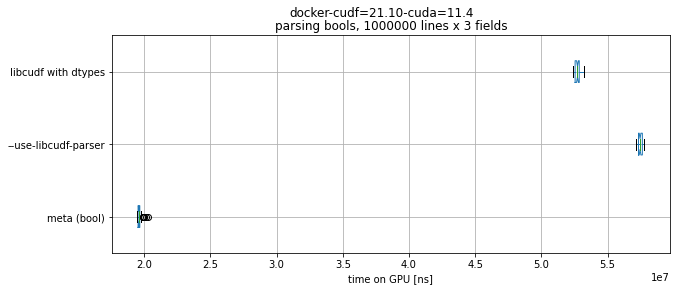

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing bools, 1000000 lines x 3 fields')
ax.set(xlabel='time on GPU [ns]')
df_cmp.boxplot(vert=False, notch=True)

#plt.savefig('fig_bool_time.png', transparent=False)
plt.show()

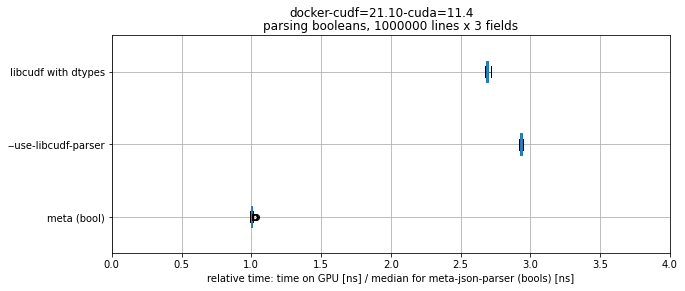

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing booleans, 1000000 lines x 3 fields')
ax.set(xlabel='relative time: time on GPU [ns] / median for meta-json-parser (bools) [ns]')
ax.set(xlim=(0,4))
df_cmp_rel.boxplot(column=['meta (bool)', '--use-libcudf-parser', 'libcudf with dtypes'], vert=False)

#plt.savefig('fig_bool.png', transparent=False)
plt.show()

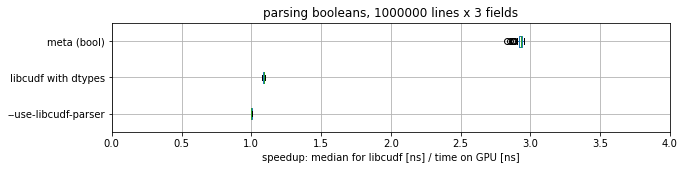

In [ ]:
df_cmp_rel = pd.DataFrame()
df_cmp_rel['meta (bool)'] = \
    df_cmp_median[1]/df_cmp['meta (bool)']

df_cmp_rel['--use-libcudf-parser'] = \
    df_cmp_median[1]/df_cmp['--use-libcudf-parser']

df_cmp_rel['libcudf with dtypes'] = \
    df_cmp_median[1]/df_cmp['libcudf with dtypes']


fig, ax = plt.subplots(figsize=(10,2))
#fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing booleans, 1000000 lines x 3 fields')
ax.set(xlabel='speedup: median for libcudf [ns] / time on GPU [ns]')
ax.set(xlim=(0,4))
df_cmp_rel.boxplot(column=['--use-libcudf-parser', 'libcudf with dtypes', 'meta (bool)'], vert=False)

#plt.savefig('fig_bool.png', transparent=False)
plt.show()

### bool1

In [ ]:
df_meta = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_bool1.csv', index_col=2).sort_index()
df_meta['NOD2H time measured by GPU [ns]'] = \
  df_meta['TOTAL time measured by GPU [ns]'] - df_meta['Copying output [ns]']

df_cudf = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_bool1.csv', index_col=2)

In [ ]:
df_cmp = pd.DataFrame()
df_cmp['meta (bool1)'] = \
   df_meta['NOD2H time measured by GPU [ns]']
df_cmp['--use-libcudf-parser'] = \
   df_cudf['TOTAL time measured by GPU [ns]']

df_cmp_median = df_cmp.median()
df_cmp_median

meta (bool1)             8409728.0
--use-libcudf-parser    21814912.0
dtype: float64

In [ ]:
df_cmp_rel = pd.DataFrame()
df_cmp_rel['meta (bool1)'] = \
    df_cmp_median[1]/df_cmp['meta (bool1)']

df_cmp_rel['--use-libcudf-parser'] = \
    df_cmp_median[1]/df_cmp['--use-libcudf-parser']

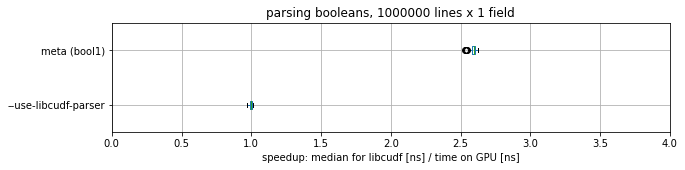

In [ ]:
fig, ax = plt.subplots(figsize=(10,2))
#fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing booleans, 1000000 lines x 1 field')
ax.set(xlabel='speedup: median for libcudf [ns] / time on GPU [ns]')
ax.set(xlim=(0,4))
df_cmp_rel.boxplot(column=['--use-libcudf-parser', 'meta (bool1)'], vert=False)

#plt.savefig('fig_bool.png', transparent=False)
plt.show()

## Versus number of fields

In [ ]:
df_meta1 = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_bool1.csv', index_col=2).sort_index()
df_meta1['NOD2H time measured by GPU [ns]'] = \
  df_meta1['TOTAL time measured by GPU [ns]'] - df_meta1['Copying output [ns]']

df_cudf1 = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_bool1.csv', index_col=2)

In [ ]:
df_meta2 = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_bool2.csv', index_col=2).sort_index()
df_meta2['NOD2H time measured by GPU [ns]'] = \
  df_meta2['TOTAL time measured by GPU [ns]'] - df_meta2['Copying output [ns]']

df_cudf2 = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_bool2.csv', index_col=2)

In [ ]:
df_meta3 = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_bool.csv', index_col=2).sort_index()
df_meta3['NOD2H time measured by GPU [ns]'] = \
  df_meta3['TOTAL time measured by GPU [ns]'] - df_meta3['Copying output [ns]']

df_cudf3 = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_bool.csv', index_col=2)

In [ ]:
df_cmp = pd.DataFrame()
df_cmp['meta (bool1)'] = \
   df_meta1['NOD2H time measured by GPU [ns]']
df_cmp['libcudf (bool1)'] = \
   df_cudf1['TOTAL time measured by GPU [ns]']

df_cmp['meta (bool2)'] = \
   df_meta2['NOD2H time measured by GPU [ns]']
df_cmp['libcudf (bool2)'] = \
   df_cudf2['TOTAL time measured by GPU [ns]']

df_cmp['meta (bool3)'] = \
   df_meta3['NOD2H time measured by GPU [ns]']
df_cmp['libcudf (bool3)'] = \
   df_cudf3['TOTAL time measured by GPU [ns]']

df_cmp_median = df_cmp.median()
df_cmp_median

meta (bool1)        8409728.0
libcudf (bool1)    21814912.0
meta (bool2)       13643713.0
libcudf (bool2)    39444846.5
meta (bool3)       19587808.0
libcudf (bool3)    57459710.5
dtype: float64

Different colors for boxplot: https://matplotlib.org/3.5.0/gallery/statistics/boxplot_color.html

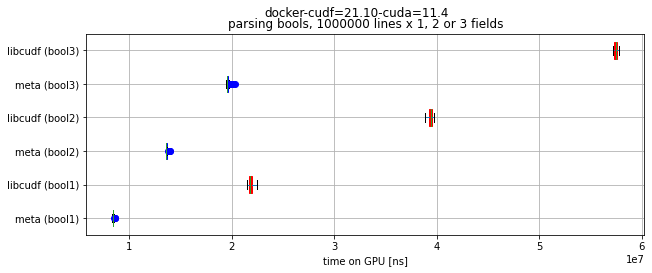

In [ ]:
fig, ax = plt.subplots(figsize=(10,3.7))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing bools, 1000000 lines x 1, 2 or 3 fields')
ax.set(xlabel='time on GPU [ns]')
bplot = df_cmp.boxplot(vert=False, notch=False,
                       sym='b',
                       patch_artist=True, return_type='dict')

# fill with colors
colors = ['blue', 'red'] * 3
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(color)
    patch.set_color(color)

#plt.savefig('fig_bool_time.png', transparent=False)
plt.show()

In [ ]:
df_meta1a = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_bool1a.csv', index_col=2).sort_index()
df_meta1a['NOD2H time measured by GPU [ns]'] = \
  df_meta1a['TOTAL time measured by GPU [ns]'] - df_meta1a['Copying output [ns]']

df_cudf1a = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_bool1a.csv', index_col=2)


df_meta2a = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_bool2a.csv', index_col=2).sort_index()
df_meta2a['NOD2H time measured by GPU [ns]'] = \
  df_meta2a['TOTAL time measured by GPU [ns]'] - df_meta2a['Copying output [ns]']

df_cudf2a = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_bool2a.csv', index_col=2)


df_meta3a = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_bool3a.csv', index_col=2).sort_index()
df_meta3a['NOD2H time measured by GPU [ns]'] = \
  df_meta3a['TOTAL time measured by GPU [ns]'] - df_meta3a['Copying output [ns]']

df_cudf3a = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_bool3a.csv', index_col=2)

In [ ]:
df_cmpa = pd.DataFrame()
df_cmpa['meta (bool1a)'] = \
   df_meta1a['NOD2H time measured by GPU [ns]']
df_cmpa['libcudf (bool1a)'] = \
   df_cudf1a['TOTAL time measured by GPU [ns]']

df_cmpa['meta (bool2a)'] = \
   df_meta2a['NOD2H time measured by GPU [ns]']
df_cmpa['libcudf (bool2a)'] = \
   df_cudf2a['TOTAL time measured by GPU [ns]']

df_cmpa['meta (bool3a)'] = \
   df_meta3a['NOD2H time measured by GPU [ns]']
df_cmpa['libcudf (bool3a)'] = \
   df_cudf3a['TOTAL time measured by GPU [ns]']

df_cmp_mediana = df_cmpa.median()
df_cmp_mediana

meta (bool1a)        6764911.5
libcudf (bool1a)    16051711.5
meta (bool2a)       10806111.5
libcudf (bool2a)    27099999.0
meta (bool3a)       15029007.0
libcudf (bool3a)    38258369.0
dtype: float64

In [ ]:
df_cmp_median

meta (bool1)        8409728.0
libcudf (bool1)    21814912.0
meta (bool2)       13643713.0
libcudf (bool2)    39444846.5
meta (bool3)       19587808.0
libcudf (bool3)    57459710.5
dtype: float64

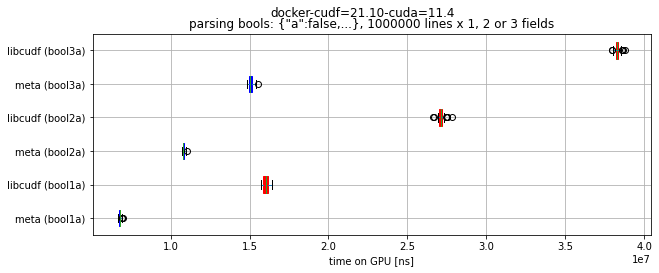

In [ ]:
fig, ax = plt.subplots(figsize=(10,3.7))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing bools: {"a":false,...}, 1000000 lines x 1, 2 or 3 fields')
ax.set(xlabel='time on GPU [ns]')
bplot = df_cmpa.boxplot(vert=False, notch=False,
                       #sym='dark gray',
                       patch_artist=True, return_type='dict')

# fill with colors
colors = ['blue', 'red'] * 3
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(color)
    patch.set_color(color)

#plt.savefig('fig_bool_time.png', transparent=False)
plt.show()

In [ ]:
df_cmpx = pd.concat([df_cmp,df_cmpa],axis=1)
df_cmpx.head()

,meta (bool1),libcudf (bool1),meta (bool2),libcudf (bool2),meta (bool3),libcudf (bool3),meta (bool1a),libcudf (bool1a),meta (bool2a),libcudf (bool2a),meta (bool3a),libcudf (bool3a)
number of objects,,,,,,,,,,,,
1000000,8530592,21814912.0,13737474,39687999,19601857,57581729,6725120,15763808,10806719,27176959,14965759,38296127
1000000,8373537,21893728.0,13638462,39189632,19604767,57460735,6793983,16117055,10815903,27498527,15069603,38193088
1000000,8369535,22098655.0,14028032,39548927,19611935,57300735,6737472,16175615,10861406,27494943,15371841,38145664
1000000,8417983,21780479.0,13642176,39229534,19937534,57774303,6743681,16177375,10767679,27175104,15123870,38234111
1000000,8445055,21586656.0,13649599,39538814,19706494,57610977,6805727,16155872,10725153,27100767,15041374,38272926


In [ ]:
from matplotlib.lines import Line2D

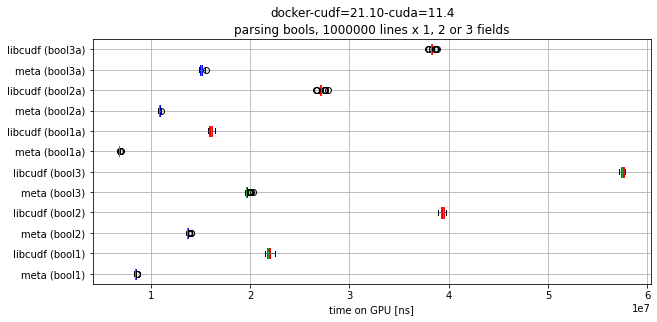

In [ ]:
fig, ax = plt.subplots(figsize=(10,4.5))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing bools, 1000000 lines x 1, 2 or 3 fields')
ax.set(xlabel='time on GPU [ns]')
bplot = df_cmpx.boxplot(vert=False, notch=False,
                       #sym='dark gray',
                       patch_artist=True, return_type='dict')

# fill with colors
colors = ['blue', 'red'] * 6
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(color)
    patch.set_color(color)

#plt.savefig('fig_bool_time.png', transparent=False)
plt.show()

**IDEA**: maybe meta-parser does not count the field name size, and that's the reason for the diffrence in scaling?

Size in bytes computed with `wc -c`

In [ ]:
bool1_size = 17747968
bool2_size = 41000051
bool3_size = 61500272

In [ ]:
bool1a_size = 11499728
bool2a_size = 21000051
bool3a_size = 30500272

In [ ]:
# convertig from bytes / nanosecond to gigabytes / second
scale=1e9/(1024*1024*1024)
scale

0.9313225746154785

In [ ]:
df_cmpa_b = pd.DataFrame()
df_cmpa_b['meta (bool1a)'] = \
   scale*bool1a_size/df_meta1a['NOD2H time measured by GPU [ns]']
df_cmpa_b['libcudf (bool1a)'] = \
   scale*bool1a_size/df_cudf1a['TOTAL time measured by GPU [ns]']

df_cmpa_b['meta (bool2a)'] = \
   scale*bool2a_size/df_meta2a['NOD2H time measured by GPU [ns]']
df_cmpa_b['libcudf (bool2a)'] = \
   scale*bool2a_size/df_cudf2a['TOTAL time measured by GPU [ns]']

df_cmpa_b['meta (bool3a)'] = \
   scale*bool3a_size/df_meta3a['NOD2H time measured by GPU [ns]']
df_cmpa_b['libcudf (bool3a)'] = \
   scale*bool3a_size/df_cudf3a['TOTAL time measured by GPU [ns]']

In [ ]:
df_cmpa_b.head()

,meta (bool1a),libcudf (bool1a),meta (bool2a),libcudf (bool2a),meta (bool3a),libcudf (bool3a)
number of objects,,,,,,
1000000,1.592530,0.679402,1.809783,0.719647,1.898039,0.741735
1000000,1.576388,0.664511,1.808247,0.711232,1.884960,0.743736
1000000,1.589611,0.662105,1.800671,0.711324,1.847898,0.744661
1000000,1.588147,0.662033,1.816345,0.719696,1.878196,0.742938
1000000,1.573668,0.662914,1.823547,0.721670,1.888497,0.742185


In [ ]:
df_cmp_b = pd.DataFrame()
df_cmp_b['meta (bool1)'] = \
   scale*bool1_size/df_meta1['NOD2H time measured by GPU [ns]']
df_cmp_b['libcudf (bool1)'] = \
   scale*bool1_size/df_cudf1['TOTAL time measured by GPU [ns]']

df_cmp_b['meta (bool2a)'] = \
   scale*bool2_size/df_meta2['NOD2H time measured by GPU [ns]']
df_cmp_b['libcudf (bool2)'] = \
   scale*bool2_size/df_cudf2['TOTAL time measured by GPU [ns]']

df_cmp_b['meta (bool3)'] = \
   scale*bool3_size/df_meta3['NOD2H time measured by GPU [ns]']
df_cmp_b['libcudf (bool3a)'] = \
   scale*bool3_size/df_cudf3['TOTAL time measured by GPU [ns]']

In [ ]:
df_cmp_b.head()

,meta (bool1),libcudf (bool1),meta (bool2a),libcudf (bool2),meta (bool3),libcudf (bool3a)
number of objects,,,,,,
1000000,1.937624,0.757697,2.779570,0.962111,2.921998,0.994701
1000000,1.973967,0.754969,2.799749,0.974346,2.921565,0.996795
1000000,1.974911,0.747968,2.721998,0.965495,2.920497,0.999579
1000000,1.963544,0.758894,2.798987,0.973355,2.872802,0.991385
1000000,1.957250,0.765708,2.797465,0.965741,2.906483,0.994196


In [ ]:
print('meta (bool1):')
print('- df_meta1 ', df_meta1['NOD2H time measured by GPU [ns]'].median())
print('- df_meta1a', df_meta1a['NOD2H time measured by GPU [ns]'].median())
print('- bool1_size ', bool1_size)
print('- bool1a_size', bool1a_size)

meta (bool1):
- df_meta1  8409728.0
- df_meta1a 6764911.5
- bool1_size  17747968
- bool1a_size 11499728


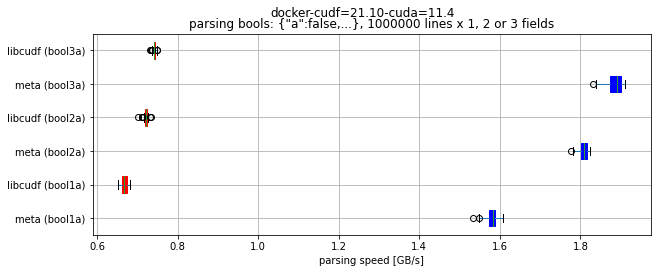

In [ ]:
fig, ax = plt.subplots(figsize=(10,3.7))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing bools: {"a":false,...}, 1000000 lines x 1, 2 or 3 fields')
ax.set(xlabel='parsing speed [GB/s]')
bplot = df_cmpa_b.boxplot(vert=False, notch=False,
                       #sym='dark gray',
                       patch_artist=True, return_type='dict')

# fill with colors
colors = ['blue', 'red'] * 3
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(color)
    patch.set_color(color)

#plt.savefig('fig_bool_time.png', transparent=False)
plt.show()

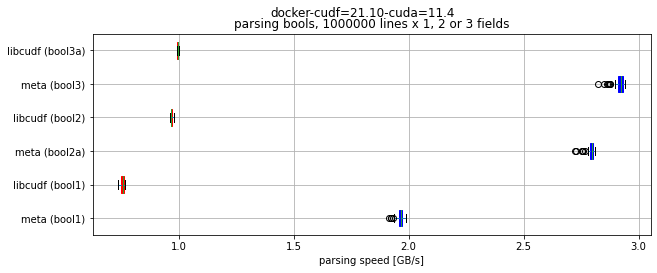

In [ ]:
fig, ax = plt.subplots(figsize=(10,3.7))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing bools, 1000000 lines x 1, 2 or 3 fields')
ax.set(xlabel='parsing speed [GB/s]')
bplot = df_cmp_b.boxplot(vert=False, notch=False,
                       #sym='dark gray',
                       patch_artist=True, return_type='dict')

# fill with colors
colors = ['blue', 'red'] * 3
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor(color)
    patch.set_color(color)

#plt.savefig('fig_bool_time.png', transparent=False)
plt.show()

Size taken by field names (not values) = number of objects * size taken by field names (not values) in a single object

In [ ]:
bool1_nonval_chars = 1
bool2_nonval_chars = 1
bool3_nonval_chars = 1

In [ ]:
bool_lines = 1000000

In [ ]:
bool1_reduced_size = bool1_size - bool_lines*bool1_nonval_chars
bool1_reduced_size = bool2_size - bool_lines*bool2_nonval_chars
bool1_reduced_size = bool3_size - bool_lines*bool3_nonval_chars

## Per type benchmark, take 2 (minimal version)

In [ ]:
df_meta1a = {}
df_cudf1a = {}

In [ ]:
df_cmp1a = {}

In [ ]:
median1a = {}

In [ ]:
# converting from bytes / nanosecond to gigabytes / second
scale=1e9/(1024*1024*1024)
scale

0.9313225746154785

In [ ]:
from IPython.display import display

def df_for_str(typename, df_meta1a=df_meta1a, df_cmp1a=df_cmp1a, median1a=median1a):
    print(f"typename={typename}")
    
    df_meta1a[typename] = pd.read_csv(f'benchmark_metaparser-co=1_cudf=21.10-docker_{typename}.csv', index_col=2).sort_index()
    df_meta1a[typename]['NOD2H time measured by GPU [ns]'] = \
        df_meta1a[typename]['TOTAL time measured by GPU [ns]'] - df_meta1a[typename]['Copying output [ns]']
    
    if 'string1a' not in df_cmp1a:
        df_cmp1a['string1a'] = pd.DataFrame()
    df_cmp1a['string1a'][f'meta ({typename})'] = \
       df_meta1a[typename]['NOD2H time measured by GPU [ns]']
    
    if 'string1a (speedup)' not in df_cmp1a:
        df_cmp1a['string1a (speedup)'] = pd.DataFrame()
    df_cmp1a['string1a (speedup)'][f'meta ({typename})'] = \
        median1a['string1a']/df_cmp1a['string1a'][f'meta ({typename})']
    
    # TODO...
    

def df_for_type(datatype, df_meta1a=df_meta1a, df_cmp1a=df_cmp1a):
    typename = datatype + '1a'
    TYPENAME = datatype.upper() + '1a'
    #print(f"typename={typename}\nTYPENAME={TYPENAME}")
    
    df_meta1a[typename] = pd.read_csv(f'benchmark_metaparser-co=1_cudf=21.10-docker_{typename}.csv', index_col=2).sort_index()
    df_meta1a[typename]['NOD2H time measured by GPU [ns]'] = \
        df_meta1a[typename]['TOTAL time measured by GPU [ns]'] - df_meta1a[typename]['Copying output [ns]']

    df_cudf1a[typename] = pd.read_csv(f'benchmark_libcudf_cudf=21.10-docker_{typename}.csv', index_col=2)
    df_cudf1a[TYPENAME] = pd.read_csv(f'benchmark_libcudf_cudf=21.10-docker_{typename}_dtypes.csv', index_col=2)
    
    #display(df_meta1a[typename].head())
    #display(df_cudf1a[typename].head())
    
    df_cmp1a[typename] = pd.DataFrame()

    df_cmp1a[typename]['file size [bytes]'] = df_meta1a[typename]['file size [bytes]']
    df_cmp1a[typename][f'meta ({typename})'] = \
       df_meta1a[typename]['NOD2H time measured by GPU [ns]']
    df_cmp1a[typename][f'libcudf ({typename})'] = \
       df_cudf1a[typename]['TOTAL time measured by GPU [ns]']
    df_cmp1a[typename][f'libcudf ({TYPENAME})'] = \
       df_cudf1a[TYPENAME]['TOTAL time measured by GPU [ns]']

    #display(df_cmp1a[typename].describe().T)
    
    median1a[typename] = df_cmp1a[typename].median()[f'libcudf ({typename})']
    #display(df_cmp1a[typename].median())
    #print(f"median for libcudf's {typename} is {median1a[typename]}")
    
    df_cmp1a[f'{typename} (speedup)'] = pd.DataFrame()

    df_cmp1a[f'{typename} (speedup)'][f'meta ({typename})'] = \
        median1a[typename]/df_cmp1a[typename][f'meta ({typename})']
    df_cmp1a[f'{typename} (speedup)'][f'libcudf ({typename})'] = \
        median1a[typename]/df_cmp1a[typename][f'libcudf ({typename})']
    df_cmp1a[f'{typename} (speedup)'][f'libcudf ({TYPENAME})'] = \
        median1a[typename]/df_cmp1a[typename][f'libcudf ({TYPENAME})']
    
    #display(df_cmp1a[f'{typename} (speedup)'].head())
    
    df_cmp1a[f'{typename} (bandwidth)'] = pd.DataFrame()

    # converting from bytes / nanosecond to gigabytes / second
    scale=1e9/(1024*1024*1024)
    
    df_cmp1a[f'{typename} (bandwidth)'][f'meta ({typename})'] = \
        scale*df_cmp1a[typename]['file size [bytes]']/df_cmp1a[typename][f'meta ({typename})']
    df_cmp1a[f'{typename} (bandwidth)'][f'libcudf ({typename})'] = \
        scale*df_cmp1a[typename]['file size [bytes]']/df_cmp1a[typename][f'libcudf ({typename})']
    df_cmp1a[f'{typename} (bandwidth)'][f'libcudf ({TYPENAME})'] = \
        scale*df_cmp1a[typename]['file size [bytes]']/df_cmp1a[typename][f'libcudf ({TYPENAME})']

    #display(df_cmp1a[f'{typename} (bandwidth)'].head())
    print(sorted(df_cmp1a.keys()))

In [ ]:
def draw_for_type(datatype, df_meta1a=df_meta1a, df_cmp1a=df_cmp1a, median1a=median1a):
    typename = datatype + '1a'
    TYPENAME = datatype.upper() + '1a'
    
    figsize=(10,2.9)
    
    fig, ax = plt.subplots(figsize=figsize)
    #fig.suptitle('docker-cudf=21.10-cuda=11.4')
    ax.set_title(f'docker-cudf=21.10-cuda=11.4\nparsing {typename}, 1000000 lines x 1 field')
    ax.set(xlabel='time on GPU [ns]')
    #ax.set(xlim=(0,4))
    #df_cmp1a[typename][[f'meta ({typename})',f'libcudf ({typename})',f'libcudf ({TYPENAME})']].boxplot(vert=False)
    df_cmp1a[typename].drop('file size [bytes]', axis=1).boxplot(vert=False)
    plt.show()
    
    fig, ax = plt.subplots(figsize=figsize)
    #fig.suptitle('docker-cudf=21.10-cuda=11.4')
    ax.set_title(f'parsing {typename}, 1000000 lines x 1 field')
    ax.set(xlabel='speedup: median for libcudf [ns] / time on GPU [ns]')
    ax.set(xlim=(0,4))
    df_cmp1a[f'{typename} (speedup)'][
        sorted(df_cmp1a[f'{typename} (speedup)'].columns, key=str.lower)
    ].boxplot(vert=False)
    plt.show()
    
    fig, ax = plt.subplots(figsize=figsize)
    #fig.suptitle('docker-cudf=21.10-cuda=11.4')
    ax.set_title(f'parsing {typename}, 1000000 lines x 1 field')
    ax.set(xlabel='parsing speed [GB/s]')
    ax.set(xlim=(0.5,1.9))
    df_cmp1a[f'{typename} (bandwidth)'][
        sorted(df_cmp1a[f'{typename} (bandwidth)'].columns, key=str.lower)
    ].boxplot(vert=False)
    plt.show()

### string1a

In [ ]:
df_for_type('string', df_meta1a, df_cmp1a)

['string1a', 'string1a (bandwidth)', 'string1a (speedup)']


In [ ]:
df_meta1a['nullable_string1a'] = pd.read_csv(f'benchmark_metaparser-co=1_cudf=21.10-docker_nullable_string1a.csv', index_col=2).sort_index()
df_meta1a['nullable_string1a']['NOD2H time measured by GPU [ns]'] = \
    df_meta1a['nullable_string1a']['TOTAL time measured by GPU [ns]'] - df_meta1a['nullable_string1a']['Copying output [ns]']

df_meta1a['nullable_string1a'].head()

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
1000000,nullable_string1a_1000000.jsonl,16889783,32,STATIC,constant order,32,6624,2915168,363999,4631519,4532288,99232,405001037,1219552,414137878,417146523,9136841
1000000,nullable_string1a_1000000.jsonl,16889783,32,STATIC,constant order,32,7391,2945631,378751,4637216,4537183,100032,408298156,1186624,417453765,420993004,9155609
1000000,nullable_string1a_1000000.jsonl,16889783,32,STATIC,constant order,32,6655,2936000,368735,4660223,4540959,119263,409371643,1183743,418527008,421533850,9155365
1000000,nullable_string1a_1000000.jsonl,16889783,32,STATIC,constant order,32,6271,2883392,381632,4659008,4541952,117055,400746582,1199231,409876129,412863564,9129547
1000000,nullable_string1a_1000000.jsonl,16889783,32,STATIC,constant order,32,6111,2914911,373344,4629600,4531839,97759,403614837,1191743,412730560,415660588,9115723


In [ ]:
median1a['string1a']

20952863.0

In [ ]:
df_cmp1a['string1a'].drop(columns=['meta (nullable str1a)'], inplace=True, errors='ignore')
df_cmp1a['string1a'].insert(loc=2, column='meta (nullable str1a)', value = \
   df_meta1a['nullable_string1a']['NOD2H time measured by GPU [ns]'])

df_cmp1a[f'string1a (speedup)'][f'meta (nullable str1a)'] = \
    median1a['string1a']/df_cmp1a['string1a'][f'meta (nullable str1a)']

df_cmp1a[f'string1a (bandwidth)'][f'meta (nullable str1a)'] = \
    scale*df_cmp1a['string1a']['file size [bytes]']/df_cmp1a['string1a'][f'meta (nullable str1a)']

display(df_cmp1a[f'string1a (speedup)'].head(2))

,meta (string1a),libcudf (string1a),libcudf (STRING1a),meta (nullable str1a)
number of objects,,,,
1000000,2.361487,1.000354,1.054143,2.293228
1000000,2.348257,0.998053,1.072410,2.288528


In [ ]:
sorted(list(df_cmp1a[f'string1a (speedup)'].columns), key=str.lower)

['libcudf (string1a)',
 'libcudf (STRING1a)',
 'meta (nullable str1a)',
 'meta (string1a)']

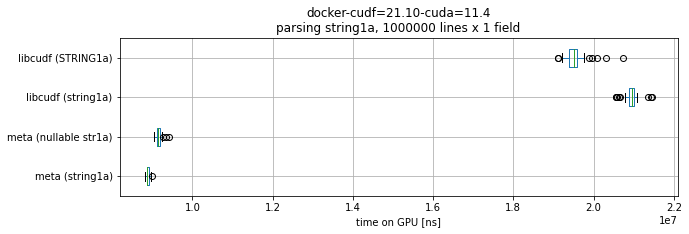

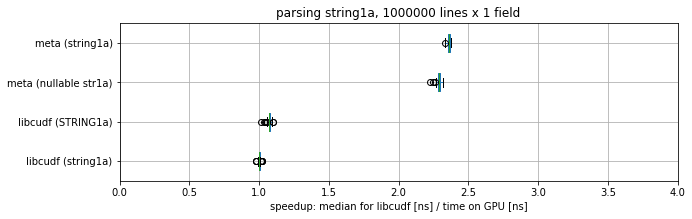

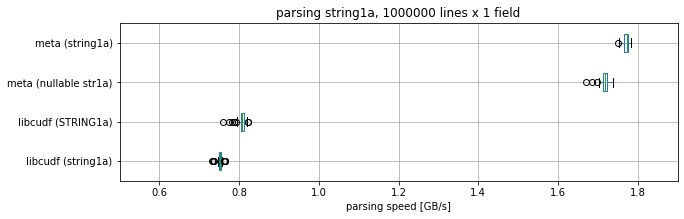

In [ ]:
draw_for_type('string')

### string1, different algorithms, maximum size=32, 64,...

In [ ]:
df_for_str('string1a-static_16')
df_for_str('string1a-static_32')
df_for_str('string1a-static_64')
df_for_str('string1a-static_128')
df_for_str('string1a-static_256')
df_for_str('string1a-static_512')
df_for_str('string1a-static_1024')
df_for_str('string1a-static_2048')

typename=string1a-static_16
typename=string1a-static_32
typename=string1a-static_64
typename=string1a-static_128
typename=string1a-static_256
typename=string1a-static_512
typename=string1a-static_1024
typename=string1a-static_2048


In [ ]:
df_cmp1a[f'string1a (speedup)'].head(2)

,meta (string1a),libcudf (string1a),libcudf (STRING1a),meta (nullable str1a),meta (string1a-static_16),meta (string1a-static_32),meta (string1a-static_64),meta (string1a-static_128),meta (string1a-static_256),meta (string1a-static_512),meta (string1a-static_1024),meta (string1a-static_2048)
number of objects,,,,,,,,,,,,
1000000,2.361487,1.000354,1.054143,2.293228,2.393820,2.356373,2.282494,2.066678,1.887214,1.618384,1.239356,0.909449
1000000,2.348257,0.998053,1.072410,2.288528,2.405052,2.354264,2.278858,2.044815,1.949192,1.676295,1.348569,0.990569


In [ ]:
df_cmp1a[f'string1a (speedup)'].median()

meta (string1a)                2.360331
libcudf (string1a)             1.000000
libcudf (STRING1a)             1.074005
meta (nullable str1a)          2.289237
meta (string1a-static_16)      2.389766
meta (string1a-static_32)      2.354393
meta (string1a-static_64)      2.272612
meta (string1a-static_128)     2.057488
meta (string1a-static_256)     1.899305
meta (string1a-static_512)     1.620799
meta (string1a-static_1024)    1.329928
meta (string1a-static_2048)    0.986153
dtype: float64

In [ ]:
df_cmp1a[f'string1a (speedup)'].mad()

meta (string1a)                0.008753
libcudf (string1a)             0.005313
libcudf (STRING1a)             0.009523
meta (nullable str1a)          0.010473
meta (string1a-static_16)      0.011991
meta (string1a-static_32)      0.016939
meta (string1a-static_64)      0.012363
meta (string1a-static_128)     0.016053
meta (string1a-static_256)     0.039677
meta (string1a-static_512)     0.031188
meta (string1a-static_1024)    0.024327
meta (string1a-static_2048)    0.009920
dtype: float64

In [ ]:
df_for_str('string1a-version=3_16')
df_for_str('string1a-version=3_32')
df_for_str('string1a-version=3_64')
df_for_str('string1a-version=3_128')
df_for_str('string1a-version=3_256')
df_for_str('string1a-version=3_512')
df_for_str('string1a-version=3_1024')
df_for_str('string1a-version=3_2048')

typename=string1a-version=3_16
typename=string1a-version=3_32
typename=string1a-version=3_64
typename=string1a-version=3_128
typename=string1a-version=3_256
typename=string1a-version=3_512
typename=string1a-version=3_1024
typename=string1a-version=3_2048


In [ ]:
df_for_str('string1a-version=2_16')
df_for_str('string1a-version=2_32')
df_for_str('string1a-version=2_64')
df_for_str('string1a-version=2_128')
df_for_str('string1a-version=2_256')
df_for_str('string1a-version=2_512')
df_for_str('string1a-version=2_1024')
df_for_str('string1a-version=2_2048')

typename=string1a-version=2_16
typename=string1a-version=2_32
typename=string1a-version=2_64
typename=string1a-version=2_128
typename=string1a-version=2_256
typename=string1a-version=2_512
typename=string1a-version=2_1024
typename=string1a-version=2_2048


In [ ]:
df_for_str('string1a-version=1_16')
df_for_str('string1a-version=1_32')
df_for_str('string1a-version=1_64')
df_for_str('string1a-version=1_128')
df_for_str('string1a-version=1_256')
df_for_str('string1a-version=1_512')
df_for_str('string1a-version=1_1024')
df_for_str('string1a-version=1_2048')

typename=string1a-version=1_16
typename=string1a-version=1_32
typename=string1a-version=1_64
typename=string1a-version=1_128
typename=string1a-version=1_256
typename=string1a-version=1_512
typename=string1a-version=1_1024
typename=string1a-version=1_2048


In [ ]:
pd.DataFrame({'median': df_cmp1a[f'string1a (speedup)'].median(), 'mad': df_cmp1a[f'string1a (speedup)'].mad()})

,median,mad
meta (string1a),2.360331,0.008753
libcudf (string1a),1.000000,0.005313
libcudf (STRING1a),1.074005,0.009523
meta (nullable str1a),2.289237,0.010473
meta (string1a-static_16),2.389766,0.011991
meta (string1a-static_32),2.354393,0.016939
meta (string1a-static_64),2.272612,0.012363
meta (string1a-static_128),2.057488,0.016053
meta (string1a-static_256),1.899305,0.039677
meta (string1a-static_512),1.620799,0.031188


In [ ]:
df_meta1a['string1a'].head(2)

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
1000000,string1a_1000000.jsonl,16889712,32,STATIC,constant order,32,6816,2941247,371711,4353504,4253183,100319,405247680,1199455,414120422,417135096,8872742
1000000,string1a_1000000.jsonl,16889712,32,STATIC,constant order,32,6655,2939039,379999,4361408,4257279,104128,404796722,1235615,413719451,417263244,8922729


In [ ]:
df_cudf1a['string1a'].head(2)

,json file,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns]
number of objects,,,,,,,
1000000,string1a_1000000.jsonl,16889712,6240,17567,20921632,20945440,23755321
1000000,string1a_1000000.jsonl,16889712,6080,18624,20969024,20993728,23866918


In [ ]:
res = {'median': [], 'mad': []}
sizes = (16, 32, 64, 128, 256, 512, 1024, 2048)
for max_size in sizes:
    typename=f'string1a-static_{max_size}'
    print(f'max_size={max_size}, typename={typename}')
    res['median'].append(df_meta1a[typename]['NOD2H time measured by GPU [ns]'].median())
    res['mad']   .append(df_meta1a[typename]['NOD2H time measured by GPU [ns]'].mad())

res['libcudf'] = [df_cudf1a['string1a']['TOTAL time measured by GPU [ns]'].median()] * len(sizes)
    
df_maxsizes_static = pd.DataFrame(index=sizes,data=res)
df_maxsizes_static.index.name = 'max-string-size'
df_maxsizes_static

max_size=16, typename=string1a-static_16
max_size=32, typename=string1a-static_32
max_size=64, typename=string1a-static_64
max_size=128, typename=string1a-static_128
max_size=256, typename=string1a-static_256
max_size=512, typename=string1a-static_512
max_size=1024, typename=string1a-static_1024
max_size=2048, typename=string1a-static_2048


,median,mad,libcudf
max-string-size,,,
16,8767746.0,44154.5264,20952863.0
32,8899474.5,65099.3656,20952863.0
64,9219727.0,50920.2208,20952863.0
128,10183715.5,80895.6656,20952863.0
256,11031860.5,232355.4208,20952863.0
512,12927490.5,251180.9200,20952863.0
1024,15754883.0,298273.4400,20952863.0
2048,21247070.0,216943.7720,20952863.0


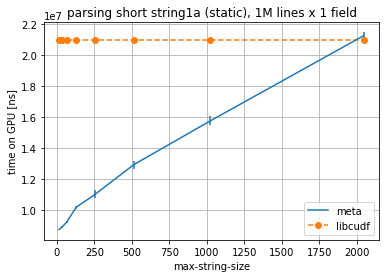

In [ ]:
df_maxsizes_static.rename({'median': 'meta'}, axis='columns', inplace=True)
ax=df_maxsizes_static.plot(y='meta',yerr='mad',style="o-",ylabel='time on GPU [ns]',title='parsing short string1a (static), 1M lines x 1 field',grid=True)
ax=df_maxsizes_static.plot(ax=ax,y='libcudf',style='o--',grid=True)
#ax.set_xticks(sizes)

### datetime1a

In [ ]:
df_for_type('datetime')

['datetime1a', 'datetime1a (bandwidth)', 'datetime1a (speedup)', 'string1a', 'string1a (bandwidth)', 'string1a (speedup)']


In [ ]:
name='datetime_as_string1a'
df_meta1a[name] = pd.read_csv(f'benchmark_metaparser-co=1_cudf=21.10-docker_{name}.csv', index_col=2).sort_index()
df_meta1a[name]['NOD2H time measured by GPU [ns]'] = \
    df_meta1a[name]['TOTAL time measured by GPU [ns]'] - df_meta1a[name]['Copying output [ns]']

#df_meta1a[name].head()

In [ ]:
typename='datetime1a'
median1a[typename]

28643440.0

In [ ]:
typename='datetime1a'
name='datetime_as_string1a'
colname='meta (date1a->str)'
df_cmp1a[typename].drop(columns=[colname], inplace=True, errors='ignore')
df_cmp1a[typename].insert(loc=2, column=colname, value = \
   df_meta1a[name]['NOD2H time measured by GPU [ns]'])

df_cmp1a[f'{typename} (speedup)'][colname] = \
    median1a[typename]/df_cmp1a[typename][colname]

df_cmp1a[f'{typename} (bandwidth)'][colname] = \
    scale*df_cmp1a[typename]['file size [bytes]']/df_cmp1a[typename][colname]

display(df_cmp1a[f'{typename} (speedup)'].head(2))

,meta (datetime1a),libcudf (datetime1a),libcudf (DATETIME1a),meta (date1a->str)
number of objects,,,,
1000000,2.383249,0.983200,1.130158,2.646199
1000000,2.396784,0.997359,1.142687,2.597356


In [ ]:
df_cmp1a['datetime1a'].drop(columns=['meta (date->str)'], inplace=True, errors='ignore')

In [ ]:
sorted(list(df_cmp1a['datetime1a (speedup)'].columns), key=str.lower)

['libcudf (datetime1a)',
 'libcudf (DATETIME1a)',
 'meta (date1a->str)',
 'meta (datetime1a)']

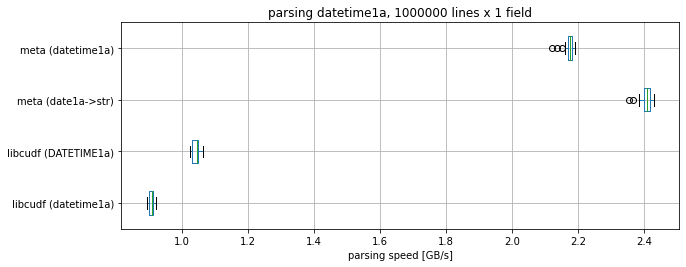

In [ ]:
typename='datetime1a'
figsize=(10,3.8)
fig, ax = plt.subplots(figsize=figsize)
#fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title(f'parsing {typename}, 1000000 lines x 1 field')
ax.set(xlabel='parsing speed [GB/s]')
#ax.set(xlim=(0.5,1.9))
df_cmp1a[f'{typename} (bandwidth)'][
    sorted(df_cmp1a[f'{typename} (bandwidth)'].columns, key=str.lower)
].boxplot(vert=False)
plt.show()

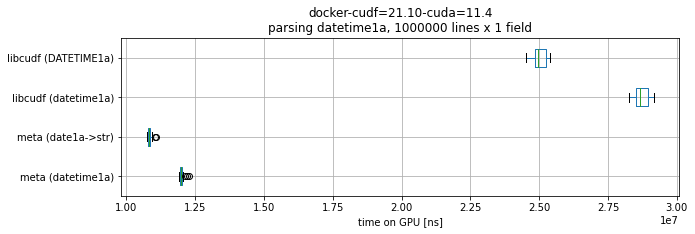

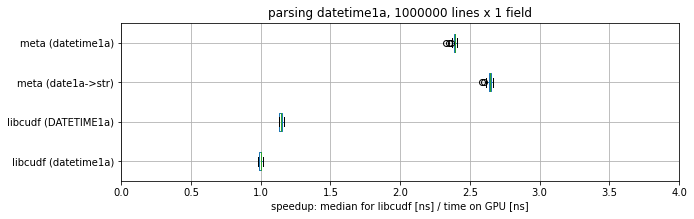

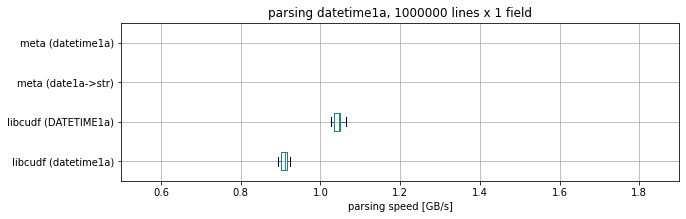

In [ ]:
draw_for_type('datetime')

### float1a

In [ ]:
df_meta1a['float1a'] = pd.read_csv('benchmark_metaparser-co=1_cudf=21.10-docker_float1a.csv', index_col=2).sort_index()
df_meta1a['float1a']['NOD2H time measured by GPU [ns]'] = \
  df_meta1a['float1a']['TOTAL time measured by GPU [ns]'] - df_meta1a['float1a']['Copying output [ns]']

df_cudf1a['float1a'] = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_float1a.csv', index_col=2)
df_cudf1a['FLOAT1a'] = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_float1a_dtypes.csv', index_col=2)

In [ ]:
df_meta1a['fixed1a'] = pd.read_csv('benchmark_metaparser-co=1_cudf=21.10-docker_fixed1a.csv', index_col=2).sort_index()
df_meta1a['fixed1a']['NOD2H time measured by GPU [ns]'] = \
  df_meta1a['fixed1a']['TOTAL time measured by GPU [ns]'] - df_meta1a['fixed1a']['Copying output [ns]']

In [ ]:
df_meta1a['float1a'].head()

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
1000000,float1a_1000000.jsonl,13778136,32,STATIC,constant order,32,6688,2381983,333568,5300704,5199711,100992,50905662,222399,59151008,61515393,8245346
1000000,float1a_1000000.jsonl,13778136,32,STATIC,constant order,32,5888,2353631,312992,5290175,5194784,95392,51747615,219231,59929534,62651937,8181919
1000000,float1a_1000000.jsonl,13778136,32,STATIC,constant order,32,6047,2359967,385408,5310336,5211071,99264,51203361,214975,59480094,61816729,8276733
1000000,float1a_1000000.jsonl,13778136,32,STATIC,constant order,32,6432,2427072,370687,5296800,5188032,108768,52986335,267199,61354526,63722534,8368191
1000000,float1a_1000000.jsonl,13778136,32,STATIC,constant order,32,7007,2406847,323327,5298783,5202464,96320,51247520,215616,59499103,61746150,8251583


In [ ]:
df_cudf1a['float1a'].head()

,json file,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns]
number of objects,,,,,,,
1000000,float1a_1000000.jsonl,13778136,5727,19967,18043071,18068767,20438766
1000000,float1a_1000000.jsonl,13778136,4927,16640,17492191,17513759,19758434
1000000,float1a_1000000.jsonl,13778136,3967,20320,17834751,17859039,20081461
1000000,float1a_1000000.jsonl,13778136,5535,17920,17457920,17481376,19696504
1000000,float1a_1000000.jsonl,13778136,5247,27327,17538080,17570655,19852834


In [ ]:
df_cmp1a['float1a'] = pd.DataFrame()

df_cmp1a['float1a']['file size [bytes]'] = df_meta1a['float1a']['file size [bytes]']
df_cmp1a['float1a']['meta (float1a)'] = \
   df_meta1a['float1a']['NOD2H time measured by GPU [ns]']
df_cmp1a['float1a']['meta (fixed1a)'] = \
   df_meta1a['fixed1a']['NOD2H time measured by GPU [ns]']
df_cmp1a['float1a']['libcudf (float1a)'] = \
   df_cudf1a['float1a']['TOTAL time measured by GPU [ns]']
df_cmp1a['float1a']['libcudf (FLOAT1a)'] = \
   df_cudf1a['FLOAT1a']['TOTAL time measured by GPU [ns]']

In [ ]:
df_cmp1a['float1a'].head()

,file size [bytes],meta (float1a),meta (fixed1a),libcudf (float1a),libcudf (FLOAT1a)
number of objects,,,,,
1000000,13778136,8245346,8420864,18068767,15942432.0
1000000,13778136,8181919,8381054,17513759,16311519.0
1000000,13778136,8276733,8281567,17859039,16042432.0
1000000,13778136,8368191,8330528,17481376,16087135.0
1000000,13778136,8251583,8375489,17570655,16061088.0


In [ ]:
median1a['float1a'] = df_cmp1a['float1a'].median()['libcudf (float1a)']
median1a['float1a']

17609856.0

In [ ]:
df_cmp1a['float1a (speedup)'] = pd.DataFrame()

df_cmp1a['float1a (speedup)']['meta (float1a)'] = \
    median1a['float1a']/df_cmp1a['float1a']['meta (float1a)']
df_cmp1a['float1a (speedup)']['meta (fixed1a)'] = \
    median1a['float1a']/df_cmp1a['float1a']['meta (fixed1a)']
df_cmp1a['float1a (speedup)']['libcudf (float1a)'] = \
    median1a['float1a']/df_cmp1a['float1a']['libcudf (float1a)']
df_cmp1a['float1a (speedup)']['libcudf (FLOAT1a)'] = \
    median1a['float1a']/df_cmp1a['float1a']['libcudf (FLOAT1a)']

In [ ]:
df_cmp1a['float1a (speedup)'].head()

,meta (float1a),meta (fixed1a),libcudf (float1a),libcudf (FLOAT1a)
number of objects,,,,
1000000,2.135733,2.091217,0.974602,1.104590
1000000,2.152289,2.101151,1.005487,1.079596
1000000,2.127634,2.126392,0.986047,1.097705
1000000,2.104380,2.113894,1.007350,1.094655
1000000,2.134119,2.102547,1.002231,1.096430


In [ ]:
df_cmp1a['float1a (bandwidth)'] = pd.DataFrame()

df_cmp1a['float1a (bandwidth)']['meta (float1a)'] = \
    scale*df_cmp1a['float1a']['file size [bytes]']/df_cmp1a['float1a']['meta (float1a)']
df_cmp1a['float1a (bandwidth)']['meta (fixed1a)'] = \
    scale*df_cmp1a['float1a']['file size [bytes]']/df_cmp1a['float1a']['meta (fixed1a)']
df_cmp1a['float1a (bandwidth)']['libcudf (float1a)'] = \
    scale*df_cmp1a['float1a']['file size [bytes]']/df_cmp1a['float1a']['libcudf (float1a)']
df_cmp1a['float1a (bandwidth)']['libcudf (FLOAT1a)'] = \
    scale*df_cmp1a['float1a']['file size [bytes]']/df_cmp1a['float1a']['libcudf (FLOAT1a)']

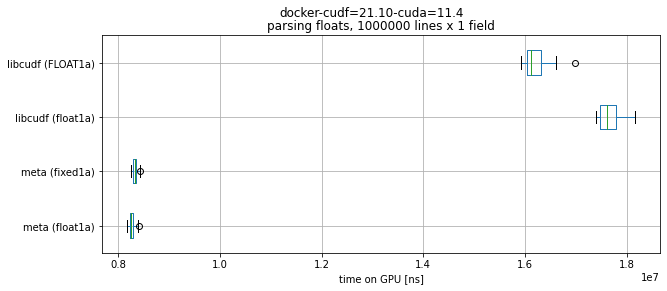

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing floats, 1000000 lines x 1 field')
ax.set(xlabel='time on GPU [ns]')
#ax.set(xlim=(0,4))
df_cmp1a['float1a'][['meta (float1a)','meta (fixed1a)','libcudf (float1a)','libcudf (FLOAT1a)']].boxplot(vert=False)

plt.show()

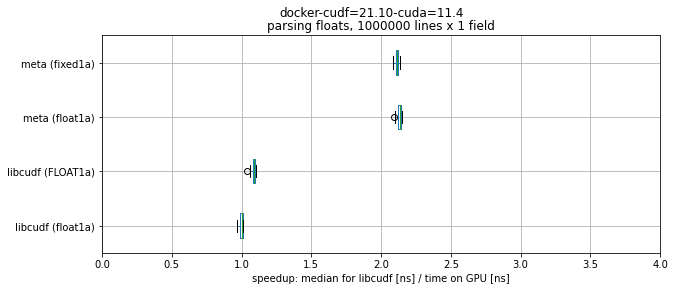

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing floats, 1000000 lines x 1 field')
ax.set(xlabel='speedup: median for libcudf [ns] / time on GPU [ns]')
ax.set(xlim=(0,4))
df_cmp1a['float1a (speedup)'][['libcudf (float1a)','libcudf (FLOAT1a)','meta (float1a)','meta (fixed1a)']].boxplot(vert=False)

#plt.savefig('fig_bool.png', transparent=False)
plt.show()

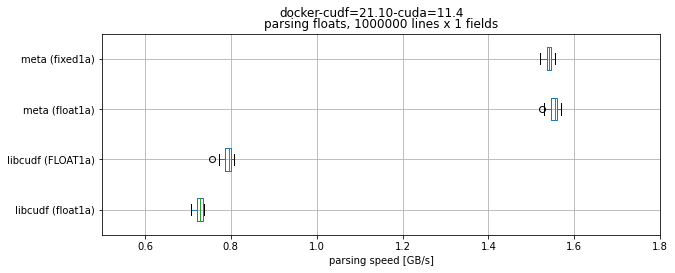

In [ ]:
fig, ax = plt.subplots(figsize=(10,3.7))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title('parsing floats, 1000000 lines x 1 fields')
ax.set(xlabel='parsing speed [GB/s]')
ax.set(xlim=(0.5,1.8))
df_cmp1a['float1a (bandwidth)'][['libcudf (float1a)','libcudf (FLOAT1a)','meta (float1a)','meta (fixed1a)']].boxplot(vert=False, notch=False)

#plt.savefig('fig_bool_time.png', transparent=False)
plt.show()

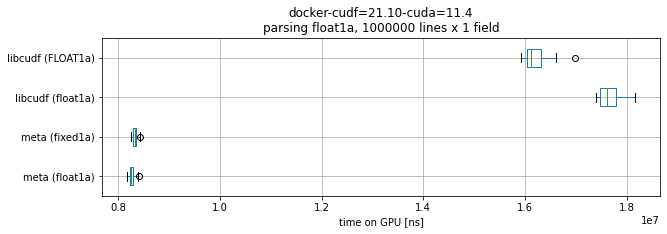

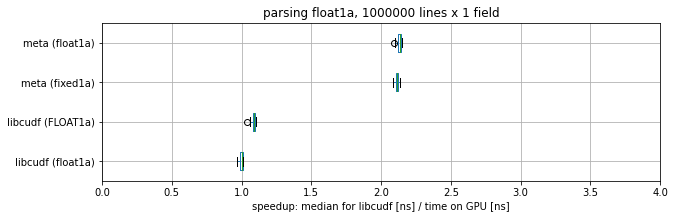

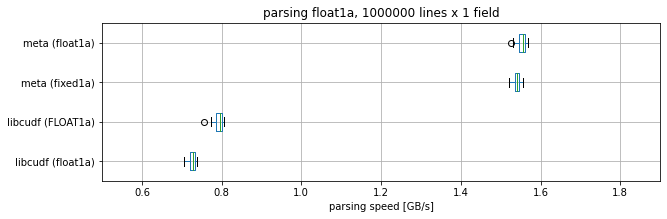

In [ ]:
draw_for_type('float')

### integer1a

In [ ]:
typename='integer1a'
TYPENAME='INTEGER1a'

In [ ]:
df_meta1a[typename] = pd.read_csv(f'benchmark_metaparser-co=1_cudf=21.10-docker_{typename}.csv', index_col=2).sort_index()
df_meta1a[typename]['NOD2H time measured by GPU [ns]'] = \
  df_meta1a[typename]['TOTAL time measured by GPU [ns]'] - df_meta1a[typename]['Copying output [ns]']

df_cudf1a[typename] = pd.read_csv(f'benchmark_libcudf_cudf=21.10-docker_{typename}.csv', index_col=2)
df_cudf1a[TYPENAME] = pd.read_csv(f'benchmark_libcudf_cudf=21.10-docker_{typename}_dtypes.csv', index_col=2)

In [ ]:
df_cmp1a[typename] = pd.DataFrame()

df_cmp1a[typename]['file size [bytes]'] = df_meta1a[typename]['file size [bytes]']
df_cmp1a[typename][f'meta ({typename})'] = \
   df_meta1a[typename]['NOD2H time measured by GPU [ns]']
df_cmp1a[typename][f'libcudf ({typename})'] = \
   df_cudf1a[typename]['TOTAL time measured by GPU [ns]']
df_cmp1a[typename][f'libcudf ({TYPENAME})'] = \
   df_cudf1a[TYPENAME]['TOTAL time measured by GPU [ns]']

df_cmp1a[typename].head()

,file size [bytes],meta (integer1a),libcudf (integer1a),libcudf (INTEGER1a)
number of objects,,,,
1000000,10876788,7132290,15738688.0,14255807
1000000,10876788,6939327,15776384.0,14362624
1000000,10876788,6960930,15760959.0,14025600
1000000,10876788,6931007,15441791.0,14975104
1000000,10876788,6972897,15386495.0,14300992


In [ ]:
median1a[typename] = df_cmp1a[typename].median()[f'libcudf ({typename})']
median1a[typename]

15751903.0

In [ ]:
df_cmp1a[f'{typename} (speedup)'] = pd.DataFrame()

df_cmp1a[f'{typename} (speedup)'][f'meta ({typename})'] = \
    median1a[typename]/df_cmp1a[typename][f'meta ({typename})']
df_cmp1a[f'{typename} (speedup)'][f'libcudf ({typename})'] = \
    median1a[typename]/df_cmp1a[typename][f'libcudf ({typename})']
df_cmp1a[f'{typename} (speedup)'][f'libcudf ({TYPENAME})'] = \
    median1a[typename]/df_cmp1a[typename][f'libcudf ({TYPENAME})']

In [ ]:
df_cmp1a[f'{typename} (bandwidth)'] = pd.DataFrame()

df_cmp1a[f'{typename} (bandwidth)'][f'meta ({typename})'] = \
    scale*df_cmp1a[typename]['file size [bytes]']/df_cmp1a[typename][f'meta ({typename})']
df_cmp1a[f'{typename} (bandwidth)'][f'libcudf ({typename})'] = \
    scale*df_cmp1a[typename]['file size [bytes]']/df_cmp1a[typename][f'libcudf ({typename})']
df_cmp1a[f'{typename} (bandwidth)'][f'libcudf ({TYPENAME})'] = \
    scale*df_cmp1a[typename]['file size [bytes]']/df_cmp1a[typename][f'libcudf ({TYPENAME})']

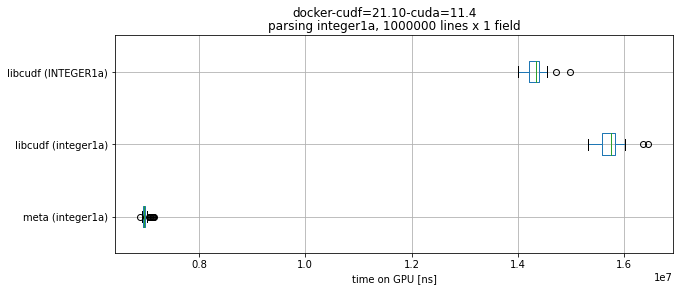

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title(f'parsing {typename}, 1000000 lines x 1 field')
ax.set(xlabel='time on GPU [ns]')
#ax.set(xlim=(0,4))
df_cmp1a[typename][[f'meta ({typename})',f'libcudf ({typename})',f'libcudf ({TYPENAME})']].boxplot(vert=False)

plt.show()

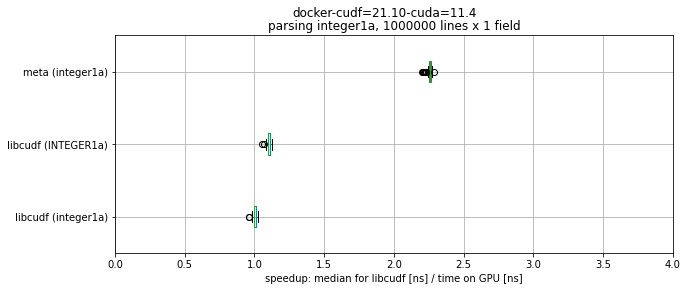

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title(f'parsing {typename}, 1000000 lines x 1 field')
ax.set(xlabel='speedup: median for libcudf [ns] / time on GPU [ns]')
ax.set(xlim=(0,4))
df_cmp1a[f'{typename} (speedup)'][[f'libcudf ({typename})',f'libcudf ({TYPENAME})',f'meta ({typename})']].boxplot(vert=False)

plt.show()

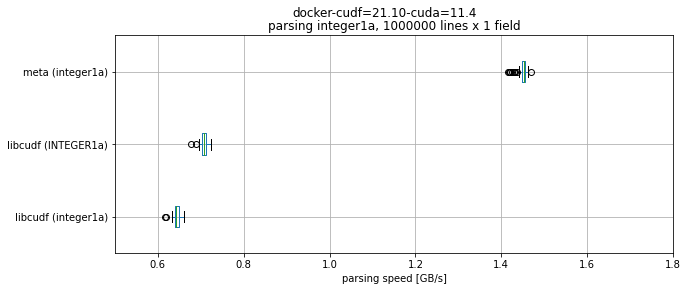

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title(f'parsing {typename}, 1000000 lines x 1 field')
ax.set(xlabel='parsing speed [GB/s]')
ax.set(xlim=(0.5,1.8))
df_cmp1a[f'{typename} (bandwidth)'][[f'libcudf ({typename})',f'libcudf ({TYPENAME})',f'meta ({typename})']].boxplot(vert=False)

plt.show()

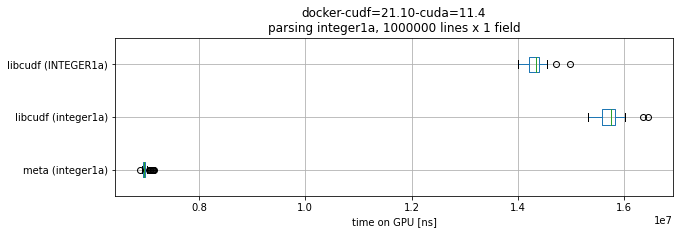

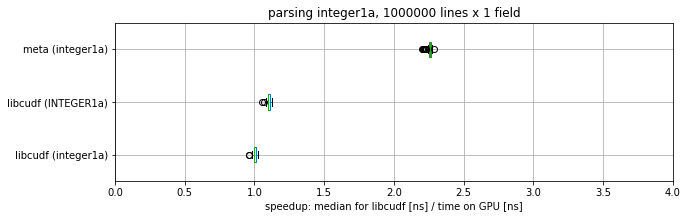

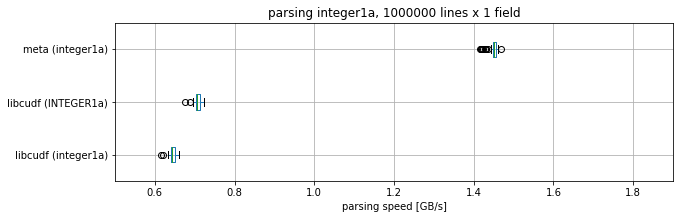

In [ ]:
draw_for_type('integer')

### bool1a

In [ ]:
typename='bool1a'
TYPENAME='BOOL1a'

In [ ]:
df_meta1a[typename] = pd.read_csv(f'benchmark_metaparser_cudf=21.10-docker_{typename}.csv', index_col=2).sort_index()
df_meta1a[typename]['NOD2H time measured by GPU [ns]'] = \
  df_meta1a[typename]['TOTAL time measured by GPU [ns]'] - df_meta1a[typename]['Copying output [ns]']

df_cudf1a[typename] = pd.read_csv(f'benchmark_libcudf_cudf=21.10-docker_{typename}.csv', index_col=2)
df_cudf1a[TYPENAME] = pd.read_csv(f'benchmark_libcudf_cudf=21.10-docker_{typename}_dtypes.csv', index_col=2)

In [ ]:
df_cmp1a[typename] = pd.DataFrame()

df_cmp1a[typename]['file size [bytes]'] = df_meta1a[typename]['file size [bytes]']
df_cmp1a[typename][f'meta ({typename})'] = \
   df_meta1a[typename]['NOD2H time measured by GPU [ns]']
df_cmp1a[typename][f'libcudf ({typename})'] = \
   df_cudf1a[typename]['TOTAL time measured by GPU [ns]']
df_cmp1a[typename][f'libcudf ({TYPENAME})'] = \
   df_cudf1a[TYPENAME]['TOTAL time measured by GPU [ns]']

df_cmp1a[typename].head()

,file size [bytes],meta (bool1a),libcudf (bool1a),libcudf (BOOL1a)
number of objects,,,,
1000000,11499728,6725120,15763808,14367296.0
1000000,11499728,6793983,16117055,14594495.0
1000000,11499728,6737472,16175615,14597248.0
1000000,11499728,6743681,16177375,14574048.0
1000000,11499728,6805727,16155872,14261280.0


In [ ]:
median1a[typename] = df_cmp1a[typename].median()[f'libcudf ({typename})']
pd.DataFrame(median1a, index=['libcudf median1a'])

,string1a,datetime1a,float1a,integer1a,bool1a
libcudf median1a,20952863.0,28643440.0,17609856.0,15751903.0,16051711.5


In [ ]:
df_cmp1a[f'{typename} (speedup)'] = pd.DataFrame()

df_cmp1a[f'{typename} (speedup)'][f'meta ({typename})'] = \
    median1a[typename]/df_cmp1a[typename][f'meta ({typename})']
df_cmp1a[f'{typename} (speedup)'][f'libcudf ({typename})'] = \
    median1a[typename]/df_cmp1a[typename][f'libcudf ({typename})']
df_cmp1a[f'{typename} (speedup)'][f'libcudf ({TYPENAME})'] = \
    median1a[typename]/df_cmp1a[typename][f'libcudf ({TYPENAME})']

df_cmp1a[f'{typename} (speedup)'].head()

,meta (bool1a),libcudf (bool1a),libcudf (BOOL1a)
number of objects,,,
1000000,2.386829,1.018264,1.117240
1000000,2.362636,0.995946,1.099847
1000000,2.382453,0.992340,1.099640
1000000,2.380260,0.992232,1.101390
1000000,2.358559,0.993553,1.125545


In [ ]:
df_cmp1a[f'{typename} (bandwidth)'] = pd.DataFrame()

df_cmp1a[f'{typename} (bandwidth)'][f'meta ({typename})'] = \
    scale*df_cmp1a[typename]['file size [bytes]']/df_cmp1a[typename][f'meta ({typename})']
df_cmp1a[f'{typename} (bandwidth)'][f'libcudf ({typename})'] = \
    scale*df_cmp1a[typename]['file size [bytes]']/df_cmp1a[typename][f'libcudf ({typename})']
df_cmp1a[f'{typename} (bandwidth)'][f'libcudf ({TYPENAME})'] = \
    scale*df_cmp1a[typename]['file size [bytes]']/df_cmp1a[typename][f'libcudf ({TYPENAME})']

df_cmp1a[f'{typename} (bandwidth)'].head()

,meta (bool1a),libcudf (bool1a),libcudf (BOOL1a)
number of objects,,,
1000000,1.592530,0.679402,0.745440
1000000,1.576388,0.664511,0.733835
1000000,1.589611,0.662105,0.733697
1000000,1.588147,0.662033,0.734865
1000000,1.573668,0.662914,0.750981


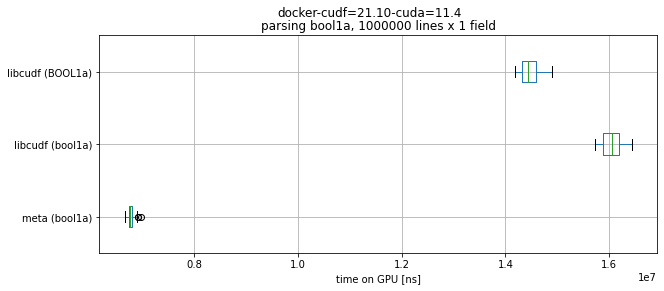

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title(f'parsing {typename}, 1000000 lines x 1 field')
ax.set(xlabel='time on GPU [ns]')
#ax.set(xlim=(0,4))
df_cmp1a[typename][[f'meta ({typename})',f'libcudf ({typename})',f'libcudf ({TYPENAME})']].boxplot(vert=False)

plt.show()

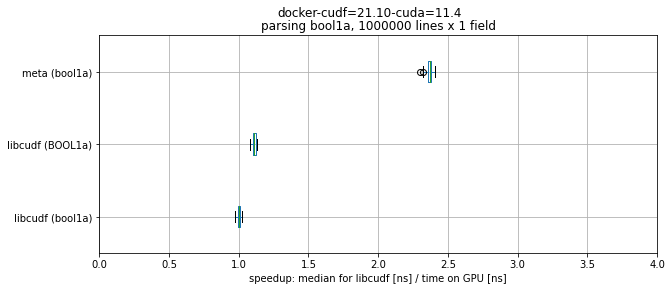

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title(f'parsing {typename}, 1000000 lines x 1 field')
ax.set(xlabel='speedup: median for libcudf [ns] / time on GPU [ns]')
ax.set(xlim=(0,4))
df_cmp1a[f'{typename} (speedup)'][[f'libcudf ({typename})',f'libcudf ({TYPENAME})',f'meta ({typename})']].boxplot(vert=False)

plt.show()

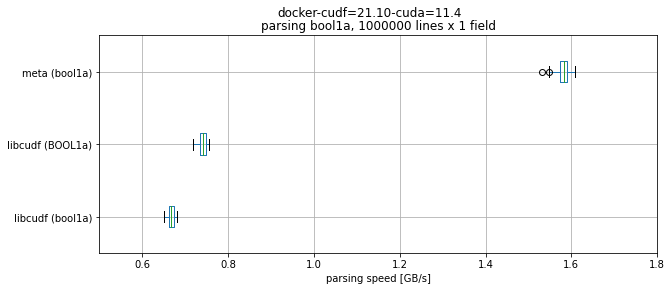

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title(f'parsing {typename}, 1000000 lines x 1 field')
ax.set(xlabel='parsing speed [GB/s]')
ax.set(xlim=(0.5,1.8))
df_cmp1a[f'{typename} (bandwidth)'][[f'libcudf ({typename})',f'libcudf ({TYPENAME})',f'meta ({typename})']].boxplot(vert=False)

plt.show()

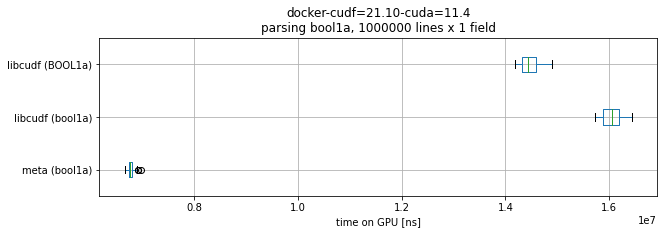

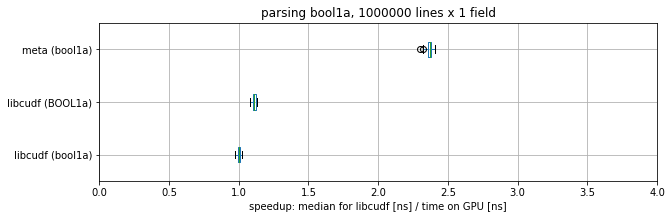

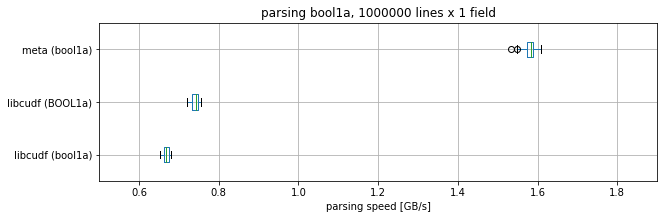

In [ ]:
draw_for_type('bool')

### nested_pos

File generated with the help of `poc/generate_nested_pos.py` from the `json2meta` repository:
```sh
python ../../../json2meta/poc/generate_nested_pos.py
```

Example of JSONL file:
```json
{"pos":{"lat":-8.667,"lon":-174.078}}
{"pos":{"lat":18.746,"lon":-93.769}}
{"pos":{"lat":50.656,"lon":83.923}}
{"pos":{"lat":57.868,"lon":99.461}}
{"pos":{"lat":-63.803,"lon":167.922}}
```

Relevant fragment of `data_def.cuh` file (available as `benchmark/examples/nested_pos.data_def.cuh`:
```c++
// KEYS
using K_L1_pos  = metastring("pos");
using K_L2_lat  = metastring("lat");
using K_L2_lon  = metastring("lon"); 

// DICT
#define STATIC_STRING_SIZE 32
template<template<class, int> class StringFun, class DictOpts>
using DictCreator = JDict < mp_list <
        mp_list<K_L1_pos,
            JDict < mp_list <
                mp_list<K_L2_lat, JRealNumber<float, K_L2_lat>>,
                mp_list<K_L2_lon, JRealNumber<float, K_L2_lon>>
            >, DictOpts >
        >
>,
        DictOpts
> ;
```

The `benchmark_metaparser-cudf=21.10_docker-nested_pos-1M.csv` file generated using:
```sh
build$ ../benchmark/run_benchmarks.py --assumptions=none --workspace-size=32 --samples=25 \
   --json-dir=../../data/json/nested/ --pattern="nested_{n}.jsonl" --size=1000000 \
   --output-csv='benchmark_metaparser-cudf=21.10_docker-nested_pos-1M.csv'
```

In [ ]:
typename='nested_pos'

In [ ]:
df_meta1a['nested_pos'] = pd.read_csv('benchmark_metaparser-cudf=21.10_docker-nested_pos-1M.csv', index_col=2).sort_index()
df_meta1a['nested_pos']['NOD2H time measured by GPU [ns]'] = \
  df_meta1a['nested_pos']['TOTAL time measured by GPU [ns]'] - \
  df_meta1a['nested_pos']['Copying output [ns]']

In [ ]:
df_meta1a['nested_pos'].head(3)

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
1000000,nested_1000000.jsonl,36994977,32,STATIC,none,32,8608,5714144,572863,11993503,11893728,99775,101457633,360448,120107200,126389848,18649567
1000000,nested_1000000.jsonl,36994977,32,STATIC,none,32,7263,5671584,609152,12005727,11905599,100128,102189315,356512,120839553,127151944,18650238
1000000,nested_1000000.jsonl,36994977,32,STATIC,none,32,7519,5762335,590431,12251520,12148127,103391,104366722,377920,123356445,129810855,18989723


In [ ]:
df_cmp1a[typename] = pd.DataFrame()

df_cmp1a[typename]['file size [bytes]'] = df_meta1a[typename]['file size [bytes]']
df_cmp1a[typename][f'meta ({typename})'] = \
   df_meta1a[typename]['NOD2H time measured by GPU [ns]']

In [ ]:
df_cmp1a[typename].head(3)

,file size [bytes],meta (nested_pos)
number of objects,,
1000000,36994977,18649567
1000000,36994977,18650238
1000000,36994977,18989723


In [ ]:
df_cmp1a[f'{typename} (bandwidth)'] = pd.DataFrame()

df_cmp1a[f'{typename} (bandwidth)'][f'meta ({typename})'] = \
    scale*df_cmp1a[typename]['file size [bytes]']/df_cmp1a[typename][f'meta ({typename})']

df_cmp1a[f'{typename} (bandwidth)'].head(3)

,meta (nested_pos)
number of objects,
1000000,1.847456
1000000,1.847390
1000000,1.814363


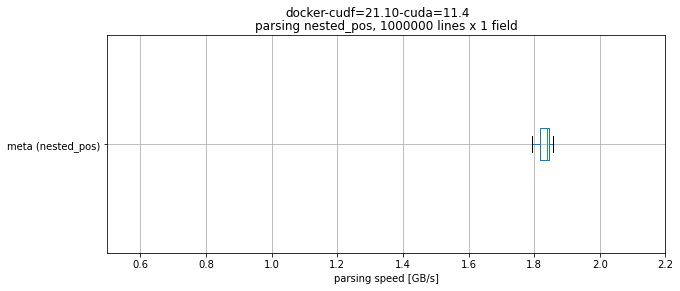

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title(f'parsing {typename}, 1000000 lines x 1 field')
ax.set(xlabel='parsing speed [GB/s]')
ax.set(xlim=(0.5,2.2))
df_cmp1a[f'{typename} (bandwidth)'][[f'meta ({typename})']].boxplot(vert=False)

plt.show()

In [ ]:
df_cmp1a[f'{typename} (bandwidth)'].describe()

,meta (nested_pos)
count,50.000000
mean,1.831548
std,0.017266
min,1.792312
25%,1.817004
50%,1.838186
75%,1.845084
max,1.858285


In [ ]:
df_cmp1a[f'bool1a (bandwidth)'].describe()

,meta (bool1a),libcudf (bool1a),libcudf (BOOL1a)
count,50.000000,50.000000,49.000000
mean,1.577946,0.667981,0.740570
std,0.015010,0.007768,0.009150
min,1.532663,0.651707,0.719375
25%,1.572559,0.661973,0.733697
50%,1.583163,0.667217,0.741715
75%,1.589056,0.674725,0.748156
max,1.607345,0.680832,0.754988


In [ ]:
df_all_x = pd.DataFrame()

for typename in ('bool1a','integer1a','float1a','string1a','datetime1a','nested_pos'):
    print(f'processing {typename}')
    df_all_x[f'meta ({typename})'] = df_cmp1a[f'{typename} (bandwidth)'][f'meta ({typename})']

processing bool1a
processing integer1a
processing float1a
processing string1a
processing datetime1a
processing nested_pos


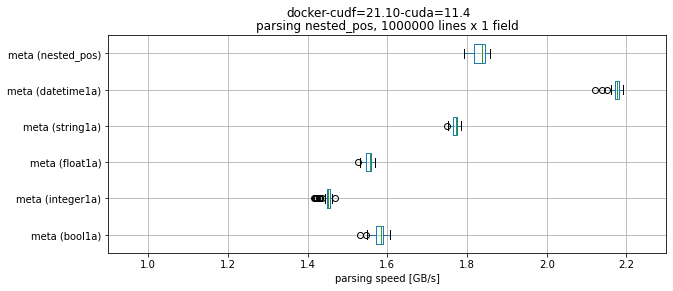

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('docker-cudf=21.10-cuda=11.4')
ax.set_title(f'parsing {typename}, 1000000 lines x 1 field')
ax.set(xlabel='parsing speed [GB/s]')
ax.set(xlim=(0.9,2.3))
df_all_x.boxplot(vert=False)

plt.show()

### Comparison

In [ ]:
df_all1a = pd.DataFrame()

for typename in ('bool1a','integer1a','float1a','string1a','datetime1a'):
    print(f'processing {typename}')
    df_all1a[f'meta ({typename})'] = df_cmp1a[f'{typename} (speedup)'][f'meta ({typename})']
    
print('processing fixed1 manually')
df_all1a['meta (fixed1a)'] = df_cmp1a[f'float1a (speedup)'][f'meta (fixed1a)']

processing bool1a
processing integer1a
processing float1a
processing string1a
processing datetime1a
processing fixed1 manually


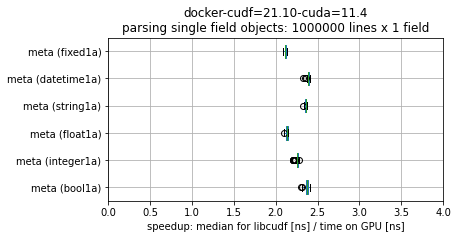

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))

ax.set_title('docker-cudf=21.10-cuda=11.4\nparsing single field objects: 1000000 lines x 1 field')
ax.set(xlabel='speedup: median for libcudf [ns] / time on GPU [ns]')
ax.set(xlim=(0,4))
df_all1a.boxplot(vert=False)

plt.show()

In [ ]:
df_allcudf1a = pd.DataFrame()

for typename in ('bool1a','integer1a','float1a','string1a','datetime1a'):
    TYPENAME = typename[:-2].upper()+'1a'
    print(f'processing {typename} -> libcudf ({TYPENAME})')
    df_allcudf1a[f'libcudf ({TYPENAME})'] = df_cmp1a[f'{typename} (speedup)'][f'libcudf ({TYPENAME})']

processing bool1a -> libcudf (BOOL1a)
processing integer1a -> libcudf (INTEGER1a)
processing float1a -> libcudf (FLOAT1a)
processing string1a -> libcudf (STRING1a)
processing datetime1a -> libcudf (DATETIME1a)


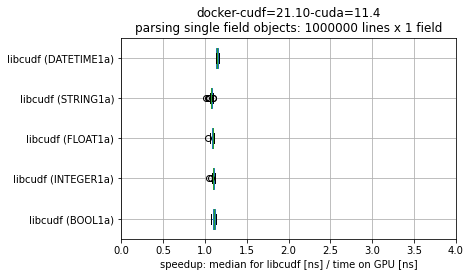

In [ ]:
fig, ax = plt.subplots(figsize=(6,3.7))

ax.set_title('docker-cudf=21.10-cuda=11.4\nparsing single field objects: 1000000 lines x 1 field')
ax.set(xlabel='speedup: median for libcudf [ns] / time on GPU [ns]')
ax.set(xlim=(0,4))
df_allcudf1a.boxplot(vert=False)

plt.show()

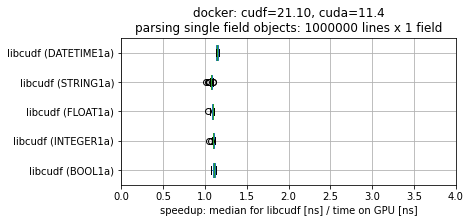

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.7))

ax.set_title('docker: cudf=21.10, cuda=11.4\nparsing single field objects: 1000000 lines x 1 field')
ax.set(xlabel='speedup: median for libcudf [ns] / time on GPU [ns]')
ax.set(xlim=(0,4))
df_allcudf1a.boxplot(vert=False)

plt.show()

## Nested depth

File generated with the help of `poc/generate_nested_pos.py` from the `json2meta` repository:
```sh
python ../../../json2meta/poc/generate_nested_pos.py
```

Example of JSONL file (`nested-depth=5_1000000.jsonl`):
```json
{"l1":{"l2":{"l3":{"l4":{"l5":800}}}}}
{"l1":{"l2":{"l3":{"l4":{"l5":172}}}}}
{"l1":{"l2":{"l3":{"l4":{"l5":537}}}}}
{"l1":{"l2":{"l3":{"l4":{"l5":910}}}}}
{"l1":{"l2":{"l3":{"l4":{"l5":698}}}}}
```

Fragment of the `nested-fakedepth=5_1000000.jsonl` file:
```json
{"l1_____l2_____l3_____l4_____l5":800}
{"l1_____l2_____l3_____l4_____l5":172}
{"l1_____l2_____l3_____l4_____l5":537}
{"l1_____l2_____l3_____l4_____l5":910}
{"l1_____l2_____l3_____l4_____l5":698}
```

### depth=1..5, fakedepth

In [ ]:
df_depth = {}

In [ ]:
for depth in range(1, 5+1):
    print(f'depth={depth}')
    key=f'nested_depth={depth}'
    df_depth[key] = pd.read_csv(f'benchmark_metaparser-cudf=21.10_docker-nested-depth={depth}-1M.csv', index_col=2).sort_index()
    df_depth[key]['NOD2H time measured by GPU [ns]'] = \
      df_depth[key]['TOTAL time measured by GPU [ns]'] - \
      df_depth[key]['Copying output [ns]']
    df_depth[key]['depth']=depth

depth=1
depth=2
depth=3
depth=4
depth=5


In [ ]:
df_depth['nested_depth=5'].head(3)

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns],depth
number of objects,,,,,,,,,,,,,,,,,,
1000000,nested-depth=5_1000000.jsonl,39000000,32,STATIC,none,32,6688,5895232,592992,16353439,16252639,100800,51736190,246048,74830589,80600514,23094399,5
1000000,nested-depth=5_1000000.jsonl,39000000,32,STATIC,none,32,7776,5848671,591072,16985311,16881023,104287,51417087,235872,75085792,80946837,23668705,5
1000000,nested-depth=5_1000000.jsonl,39000000,32,STATIC,none,32,6207,5856863,628639,15823007,15715359,107648,52035457,247584,74597763,80366524,22562306,5


In [ ]:
df_depth['depth=1..5']=pd.concat([
    df_depth[f'nested_depth={depth}'] for depth in range(1, 5+1)
])

df_depth['depth=1..5'].describe()

,file size [bytes],max string size,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns],depth
count,2.500000e+02,250.0,250.0,250.000000,2.500000e+02,250.000000,2.500000e+02,2.500000e+02,250.000000,2.500000e+02,250.000000,2.500000e+02,2.500000e+02,2.500000e+02,250.000000
mean,2.500000e+07,32.0,32.0,6972.236000,3.969542e+06,458491.396000,1.047401e+07,1.037372e+07,100292.604000,5.266768e+07,243218.876000,6.781992e+07,7.169576e+07,1.515224e+07,3.000000
std,9.919354e+06,0.0,0.0,1691.655446,1.382703e+06,106637.976046,4.156678e+06,4.156130e+06,4431.096894,1.157117e+06,23979.480039,5.703110e+06,7.137849e+06,5.647056e+06,1.417051
min,1.100000e+07,32.0,32.0,4832.000000,1.947167e+06,275424.000000,4.974463e+06,4.877952e+06,93759.000000,5.129277e+07,202079.000000,5.894819e+07,6.073567e+07,7.425983e+06,1.000000
25%,1.800000e+07,32.0,32.0,6304.000000,2.981056e+06,377439.250000,7.109352e+06,7.009688e+06,97639.000000,5.185937e+07,229871.750000,6.242711e+07,6.520159e+07,1.071589e+07,2.000000
50%,2.500000e+07,32.0,32.0,6895.500000,3.968576e+06,464528.000000,1.011747e+07,1.001862e+07,99248.000000,5.234979e+07,239407.500000,6.732128e+07,7.115175e+07,1.483398e+07,3.000000
75%,3.200000e+07,32.0,32.0,7327.000000,4.956704e+06,535487.750000,1.407064e+07,1.397099e+07,101719.000000,5.303719e+07,247175.750000,7.323504e+07,7.831923e+07,1.983680e+07,4.000000
max,3.900000e+07,32.0,32.0,23360.000000,6.084832e+06,657184.000000,1.747936e+07,1.737293e+07,125119.000000,5.752432e+07,338079.000000,7.896515e+07,8.488308e+07,2.429750e+07,5.000000


In [ ]:
key='nested_depth=1-fakedepth=5'
df_depth[key] = pd.read_csv('benchmark_metaparser-cudf=21.10_docker-nested-depth=1-fakedepth=5-1M.csv', index_col=2).sort_index()
df_depth[key]['NOD2H time measured by GPU [ns]'] = \
  df_depth[key]['TOTAL time measured by GPU [ns]'] - \
  df_depth[key]['Copying output [ns]']
df_depth[key]['depth']=1

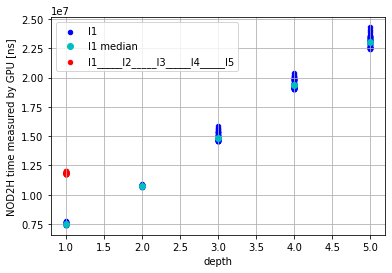

In [ ]:
ycol='NOD2H time measured by GPU [ns]'
ax=df_depth['depth=1..5'].plot.scatter(x='depth',y=ycol,c='b')
ax=df_depth['depth=1..5'][['depth',ycol]].groupby('depth').median().plot(ax=ax,style='co')
ax=df_depth['nested_depth=1-fakedepth=5'].plot.scatter(ax=ax,x='depth',y=ycol,c='r',
                                                       grid=True)

#handles, labels = ax.get_legend_handles_labels()
#print(f"handles={handles}\nlabels={labels}")

ax.legend(['l1','l1 median','l1_____l2_____l3_____l4_____l5'])

plt.show()

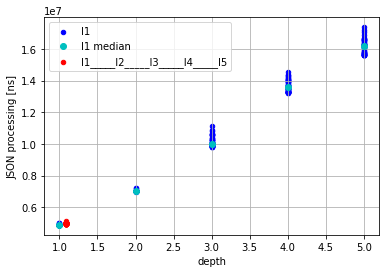

In [ ]:
df_depth['nested_depth=1-fakedepth=5']['depth']=1.08

ycol='JSON processing [ns]'
ax=df_depth['depth=1..5'].plot.scatter(x='depth',y=ycol,c='b')
ax=df_depth['depth=1..5'][['depth',ycol]].groupby('depth').median().plot(ax=ax,style='co')
ax=df_depth['nested_depth=1-fakedepth=5'].plot.scatter(ax=ax,x='depth',y=ycol,c='r',
                                                       grid=True)

#handles, labels = ax.get_legend_handles_labels()
#print(f"handles={handles}\nlabels={labels}")

ax.legend(['l1','l1 median','l1_____l2_____l3_____l4_____l5'])

plt.show()

df_depth['nested_depth=1-fakedepth=5']['depth']=1

<AxesSubplot:title={'center':'NOD2H time measured by GPU [ns]'}, xlabel='depth'>

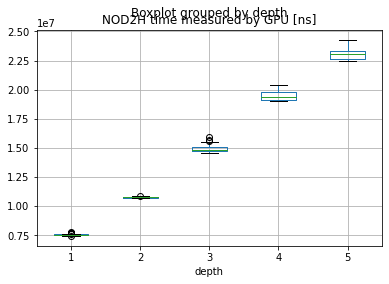

In [ ]:
df_depth['depth=1..5'].boxplot(vert=True,by='depth',column='NOD2H time measured by GPU [ns]')

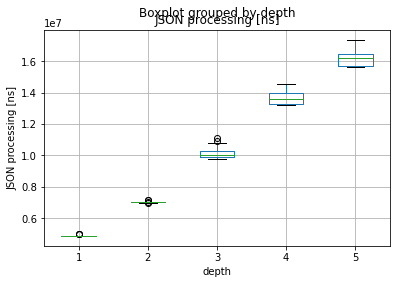

In [ ]:
ax=df_depth['depth=1..5'].boxplot(vert=True,by='depth',column='JSON processing [ns]')
ax.set_ylabel('JSON processing [ns]')

plt.show()

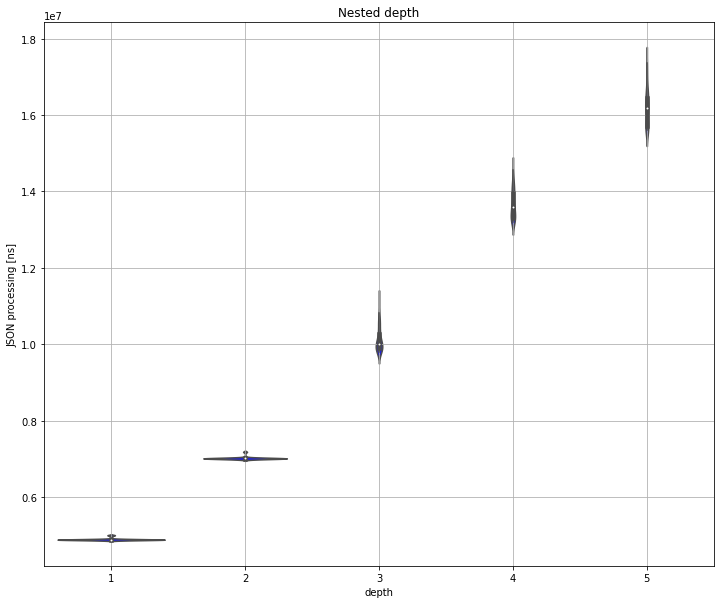

In [ ]:
ycol='JSON processing [ns]'

fig, ax = plt.subplots(figsize=(12,10))

sns.violinplot(x='depth', y=ycol, data=df_depth['depth=1..5'], ax=ax, color='b')
ax.set_title('Nested depth')

ax.grid(True)
#ax.set_xlabel('Scenario')
#ax.set_ylabel('LMP ($/MWh)')

plt.show()

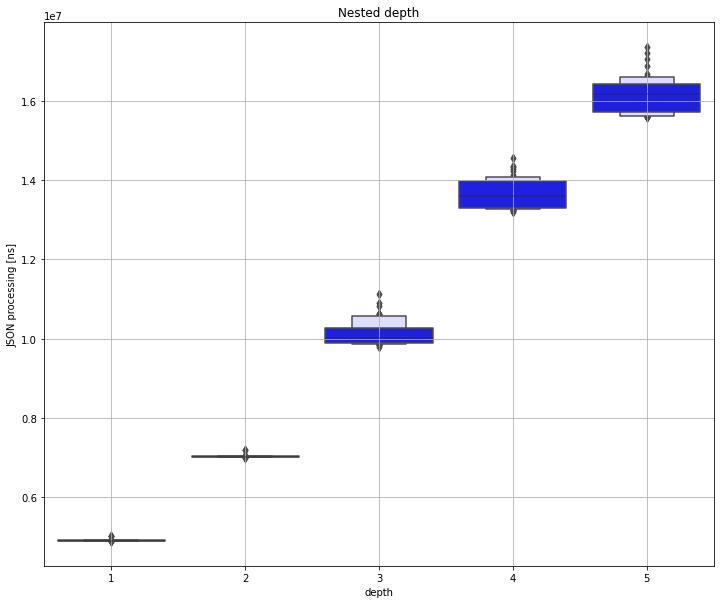

In [ ]:
ycol='JSON processing [ns]'

fig, ax = plt.subplots(figsize=(12,10))

sns.boxenplot(x='depth', y=ycol, data=df_depth['depth=1..5'], ax=ax, color='b')
ax.set_title('Nested depth')

ax.grid(True)
#ax.set_xlabel('Scenario')
#ax.set_ylabel('LMP ($/MWh)')

plt.show()

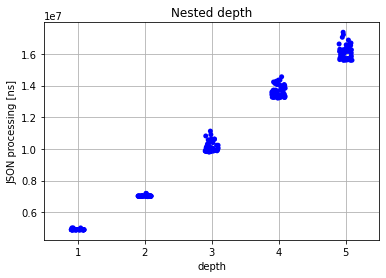

In [ ]:
ycol='JSON processing [ns]'

fig, ax = plt.subplots()

sns.stripplot(x='depth', y=ycol, data=df_depth['depth=1..5'], ax=ax, color='b', jitter=True)
ax.set_title('Nested depth')

ax.grid(True)
#ax.set_xlabel('Scenario')
#ax.set_ylabel('LMP ($/MWh)')

plt.show()